In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/Astro/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Finally, HIRES files

In [6]:
spec_fits_hires = fits.open(rootdir + 'HIRES/PG1522+101_HIRES.fits')
lsf_fits_hires = fits.open(rootdir + 'HIRES/PG1522_HIRES_wavcal2023_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [7]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis, spec_fits_hires]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis, lsf_fits_hires]

In [8]:
z_sys = 1.27767214 #1.27767328 #1.2776732

In [9]:
#np.round(1.27767328-(1+1.27767328)*0.15/3e+5, 8)

# HI

## HI 1215 (STIS)

In [10]:
hi_1215_stis = ion_transition('HI', 1215, 'H', z_sys, 'STIS')

In [11]:
hi_1215_stis.grab_ion_transition_info()

In [12]:
hi_1215_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-280,-55]])

In [13]:
hi_1215_stis.cont_norm_flux(v_abs_range=[-55,120], degree=1)

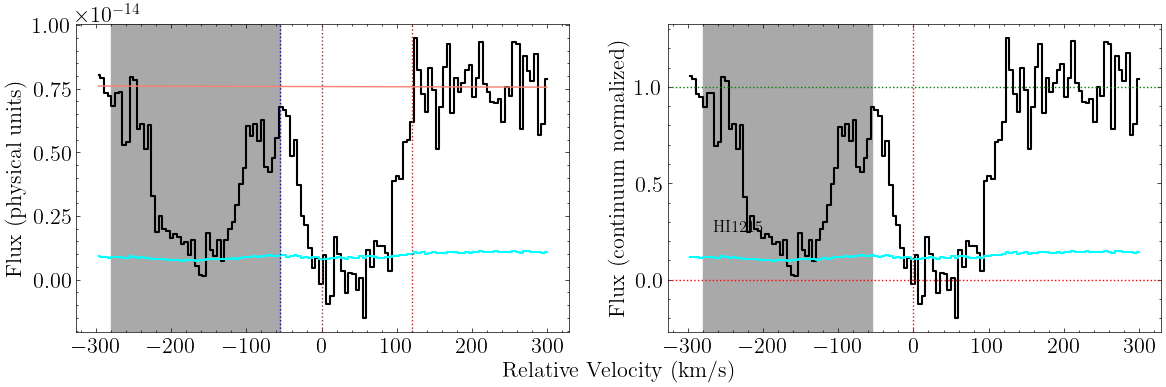

In [14]:
fig, axes = hi_1215_stis.plot_ion_transition_spec_cont()

In [15]:
hi_1215_stis.get_EW_total(-55,120)

Integration window: [-55, 120]
EW, 1sig: 516, 14
EW-3sig: 40.815


In [16]:
hi_1215_stis.grab_ion_transition_lsf(lsf_fits_list)

In [17]:
hi_1215_stis.init_ion_transition(init_values = np.array([
    [14.3, 25, 0],
    [14.3, 25, 40],
    [14.3, 25, 70]]), 
                             lsf_convolve = True)

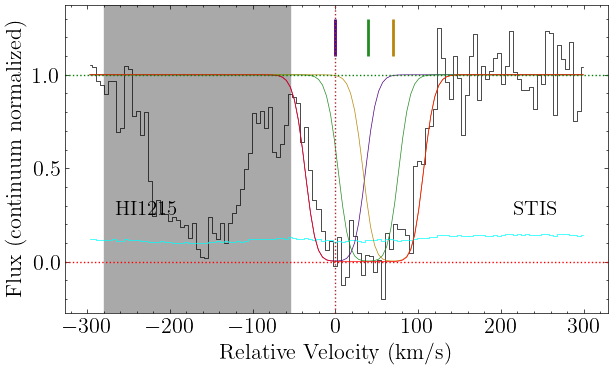

In [18]:
fig, ax = hi_1215_stis.plot_ion_transition_init_fit(legend=False)

In [19]:
hi_1215_stis.fit_ion_transition(fix_params_list = ['it1c1_dv_c', 'it1c2_dv_c'])

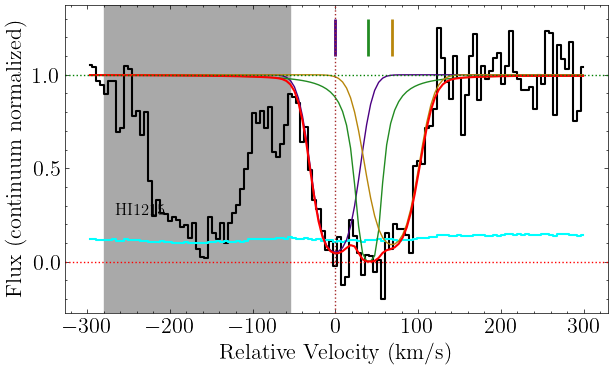

In [20]:
fig, ax = hi_1215_stis.plot_ion_transition_best_fit(legend=False)

## HI 1025 (STIS)

In [21]:
hi_1025_stis = ion_transition('HI', 1025, 'H', z_sys, 'STIS')

In [22]:
hi_1025_stis.grab_ion_transition_info()

In [23]:
hi_1025_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-280,-70], [95,150]])

In [24]:
hi_1025_stis.cont_norm_flux(v_abs_range=[-70,95], degree=1)

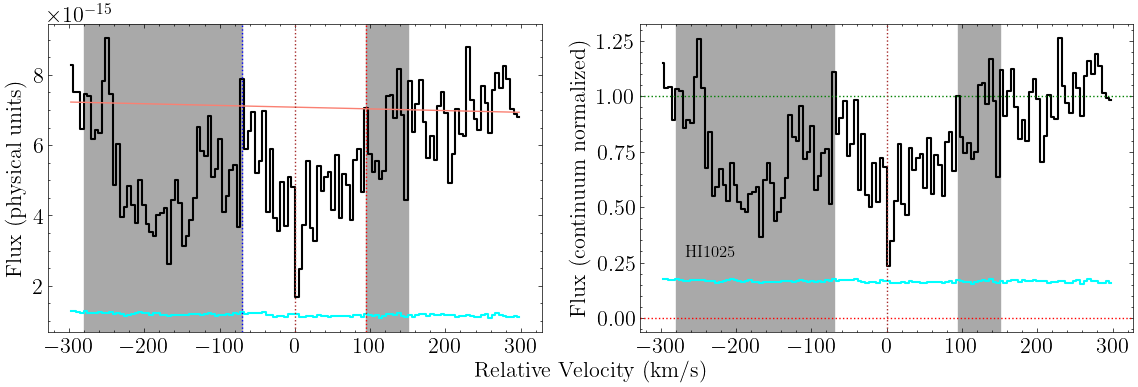

In [25]:
fig, axes = hi_1025_stis.plot_ion_transition_spec_cont()

In [26]:
hi_1025_stis.get_EW_total(-70,95)

Integration window: [-70, 95]
EW, 1sig: 178, 16
EW-3sig: 46.638


In [27]:
hi_1025_stis.grab_ion_transition_lsf(lsf_fits_list)

In [28]:
hi_1025_stis.init_ion_transition(init_values = hi_1215_stis.best_values, lsf_convolve = True)

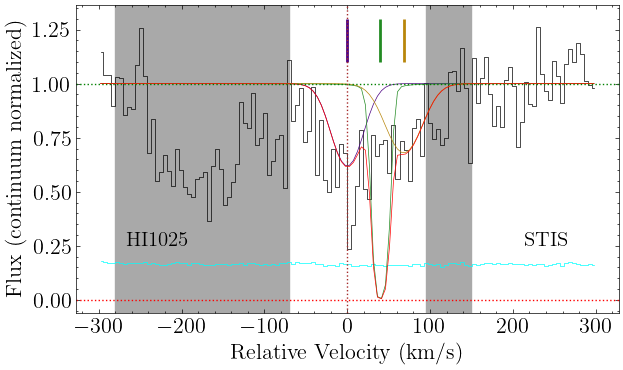

In [29]:
fig, ax = hi_1025_stis.plot_ion_transition_init_fit(legend=False)

In [30]:
hi_1025_stis.fit_ion_transition(fix_params_list = ['it1c1_dv_c', 'it1c2_dv_c'])

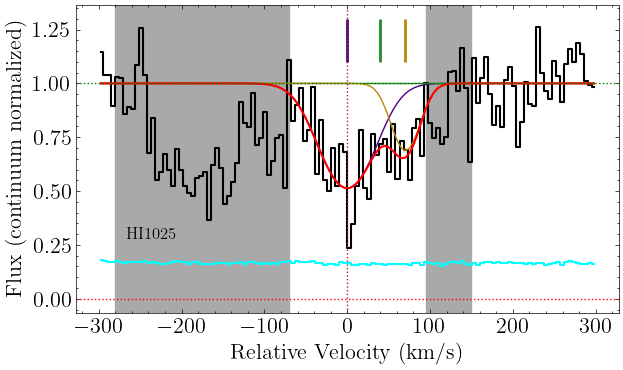

In [31]:
fig, ax = hi_1025_stis.plot_ion_transition_best_fit(legend=False)

## HI 949 (STIS)

In [32]:
hi_949_stis = ion_transition('HI', 949, 'H', z_sys, 'STIS')

In [33]:
hi_949_stis.grab_ion_transition_info()

In [34]:
hi_949_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-130], [80,250]])

In [35]:
hi_949_stis.cont_norm_flux(v_abs_range=[-130,80], degree=1)

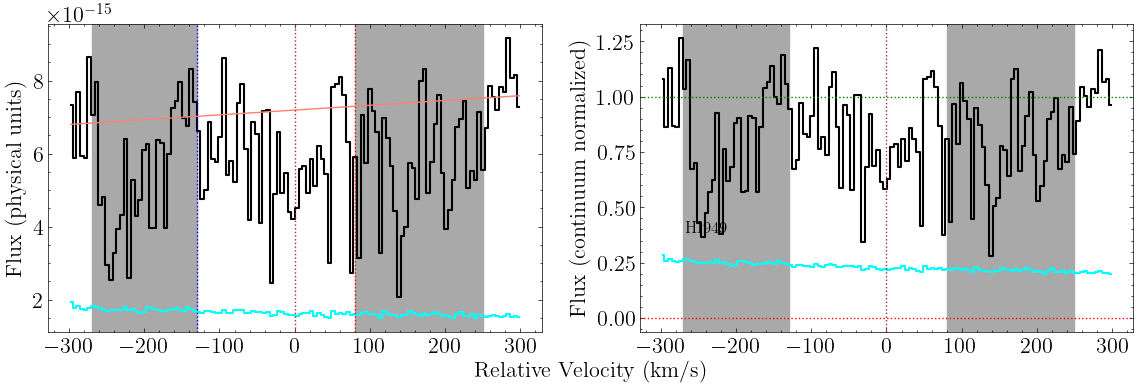

In [36]:
fig, axes = hi_949_stis.plot_ion_transition_spec_cont()

In [37]:
hi_949_stis.get_EW_total(-130,80)

Integration window: [-130, 80]
EW, 1sig: 115, 23
EW-3sig: 68.409


In [38]:
hi_949_stis.grab_ion_transition_lsf(lsf_fits_list)

In [39]:
hi_949_stis.init_ion_transition(init_values = hi_1215_stis.best_values,
                             lsf_convolve = True)

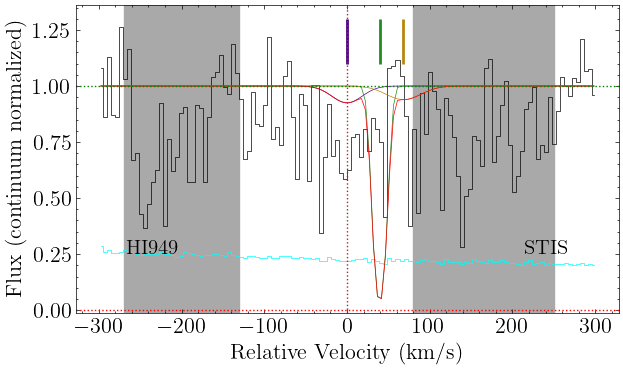

In [40]:
fig, ax = hi_949_stis.plot_ion_transition_init_fit(legend=False)

In [41]:
hi_949_stis.fit_ion_transition(fix_params_list = ['it1c1_dv_c', 'it1c2_dv_c'])

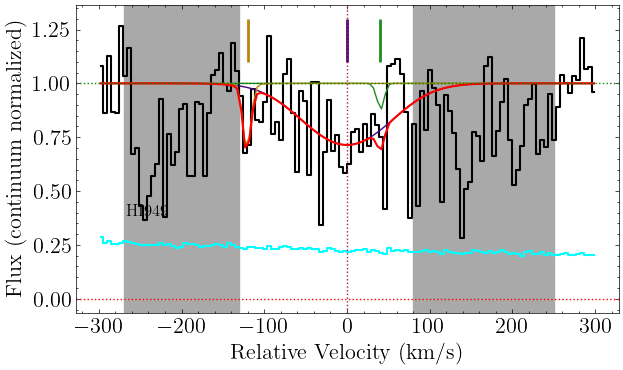

In [42]:
fig, ax = hi_949_stis.plot_ion_transition_best_fit(legend=False)

## HI ion

In [43]:
hi = ion(z_sys, 'HI', [hi_1215_stis, hi_1025_stis])

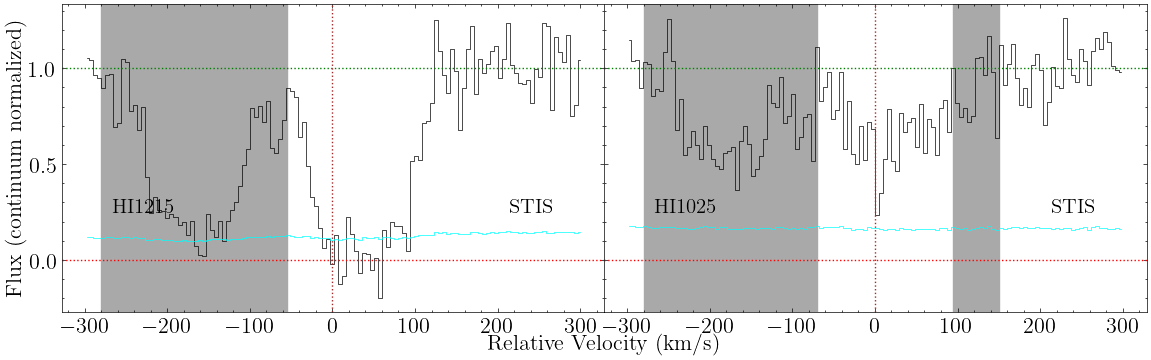

In [44]:
fig, axes = hi.plot_ion()

In [45]:
hi.init_ion([[[14.3, 25, 0], [14.2, 25, 40], [13.7, 30, 80]],
             [[14.3, 25, 0], [14.2, 25, 40], [13.7, 30, 80]]])

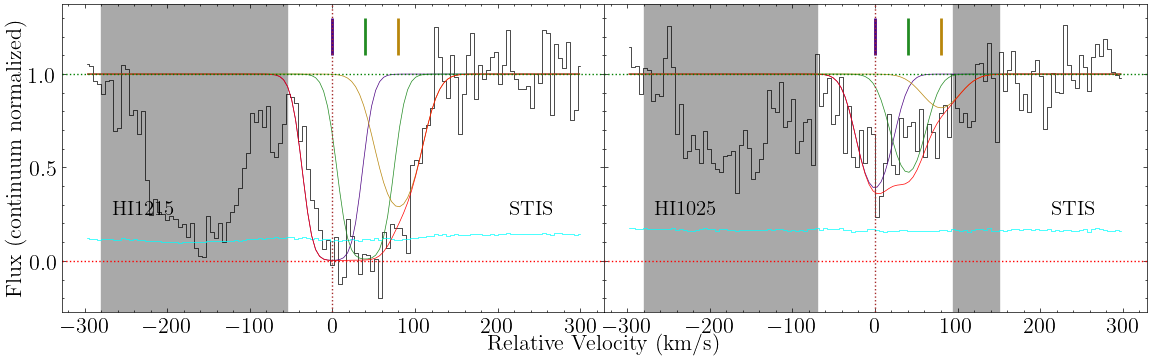

In [46]:
fig, axes = hi.plot_ion_init_fit(legend=False)

In [47]:
hi.fit_ion(tie_params_list=[['it1c1_logN', 'it2c1_logN'],
                            ['it1c1_b', 'it2c1_b'],
                            ['it1c1_dv_c', 'it2c1_dv_c'],
                            ['it1c2_logN', 'it2c2_logN'],
                            ['it1c2_b', 'it2c2_b'],
                            ['it1c2_dv_c', 'it2c2_dv_c'],
                            ['it1c3_logN', 'it2c3_logN'],
                            ['it1c3_b', 'it2c3_b'],
                            ['it1c3_dv_c', 'it2c3_dv_c']
                           ],
          fix_params_list=['it1c1_dv_c', 'it1c2_dv_c'],
          exclude_models=['it1c2_logN < it1c3_logN',
                          'it1c1_logN < it1c2_logN'])

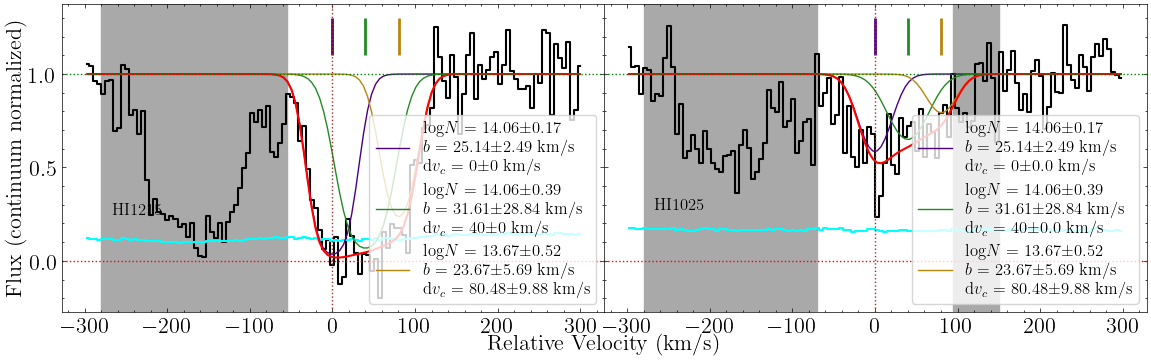

In [48]:
fig, axes = hi.plot_ion_best_fit(legend=True)

In [49]:
#hi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-20, n_walkers=100, n_steps=2500)
#hi.fit_ion_emcee(load=True, loaddir=rootdir)

In [50]:
#fig, axes = hi.plot_samples()

In [51]:
#hi.plot_corner()

# CIII

## CIII 977 (STIS)

Grab CIII 977 from STIS

In [52]:
ciii_977_stis = ion_transition('CIII', 977, 'C', z_sys, 'STIS')

In [53]:
ciii_977_stis.grab_ion_transition_info(delta_v=3.2)

In [54]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list, masks=[[50,160]])

In [55]:
ciii_977_stis.cont_norm_flux(v_abs_range=[-30,100], degree=0, manual=[0.7*1e-14])

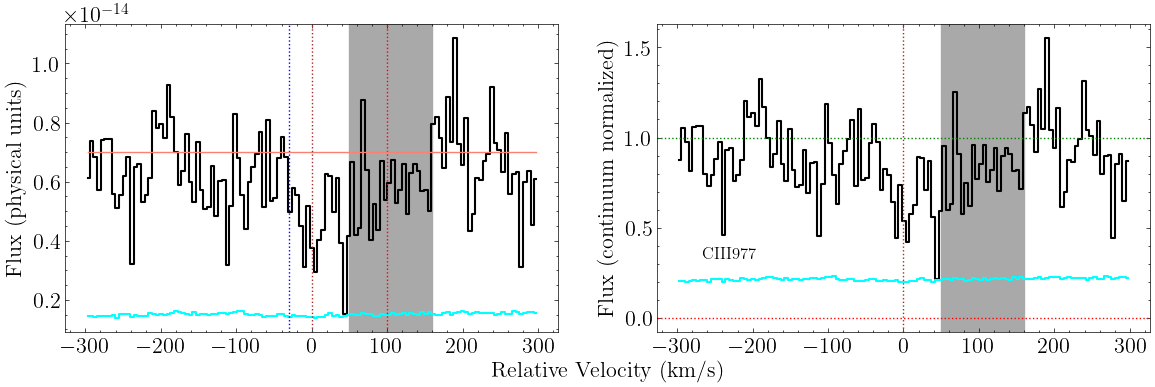

In [56]:
fig, ax = ciii_977_stis.plot_ion_transition_spec_cont()

In [57]:
ciii_977_stis.get_EW_total(-35,40)

Integration window: [-35, 40]
EW, 1sig: 69, 13
EW-3sig: 38.227


In [58]:
ciii_977_stis.grab_ion_transition_lsf(lsf_fits_list)

In [59]:
#ciii_977_stis.get_upper_lim(20)

In [60]:
ciii_977_stis.init_ion_transition(init_values = np.array([[13.3, 11.1, 0],[13.1,9,40]]), lsf_convolve = True)

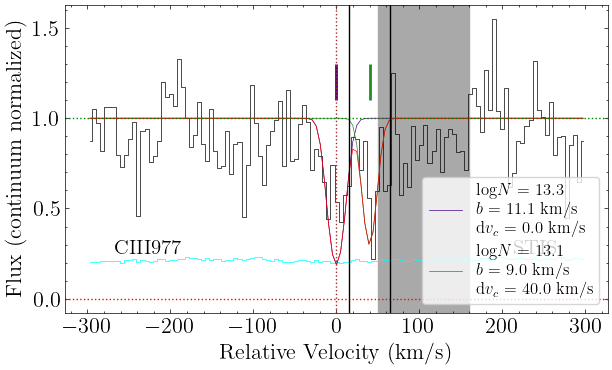

In [61]:
fig, ax = ciii_977_stis.plot_ion_transition_init_fit()
ax.axvline(15)
ax.axvline(65)

In [62]:
ciii_977_stis.get_upper_lim_data(10, 40, v_min=15, v_max=65, logN_max=14)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.3


In [63]:
ciii_977_stis.fit_ion_transition()

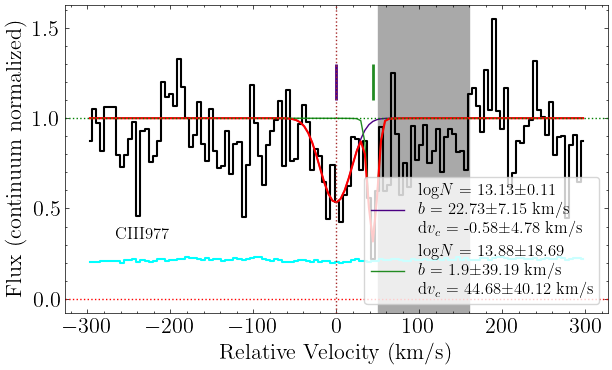

In [64]:
fig, ax = ciii_977_stis.plot_ion_transition_best_fit()

## CIII ion

In [65]:
ciii = ion(z_sys, 'CIII', [ciii_977_stis])

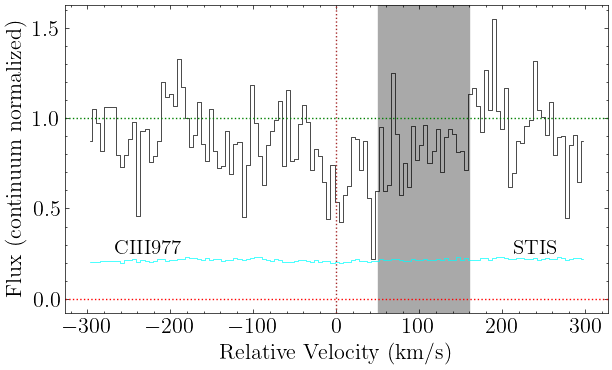

In [66]:
fig, axes = ciii.plot_ion()

In [67]:
ciii.init_ion([[[13.0, 11.1, 0],[13.0,9.8,40]]])

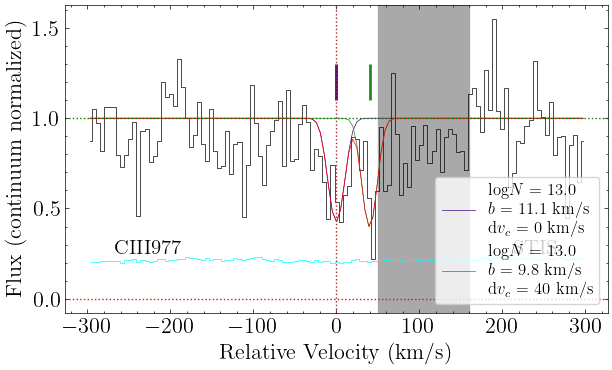

In [68]:
fig, axes = ciii.plot_ion_init_fit()

In [69]:
ciii.fit_ion(fix_params_list = ['it1c1_dv_c', 'it1c1_b', 'it1c2_dv_c', 'it1c2_b'])

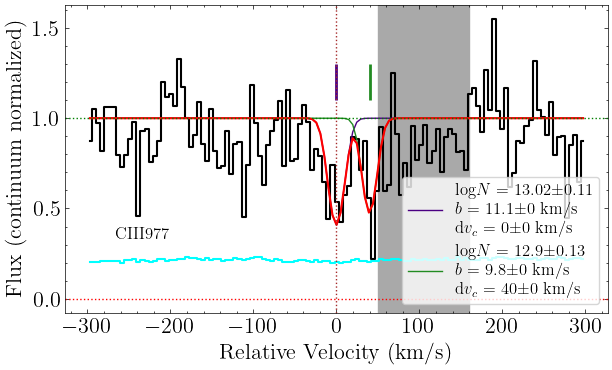

In [70]:
fig, axes = ciii.plot_ion_best_fit()

In [71]:
#ciii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-10, n_walkers=100, n_steps=2500)
#ciii.fit_ion_emcee(load=True, loaddir=rootdir)

In [72]:
#fig, axes = ciii.plot_samples()

In [73]:
#ciii.plot_corner()

# CIV

## CIV 1548 (HIRES)

In [74]:
civ_1548_hires = ion_transition('CIV', 1548, 'C', z_sys, 'HIRES')

In [75]:
civ_1548_hires.grab_ion_transition_info()

In [76]:
civ_1548_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [77]:
civ_1548_hires.cont_norm_flux(v_abs_range=[-50,80], degree=1)

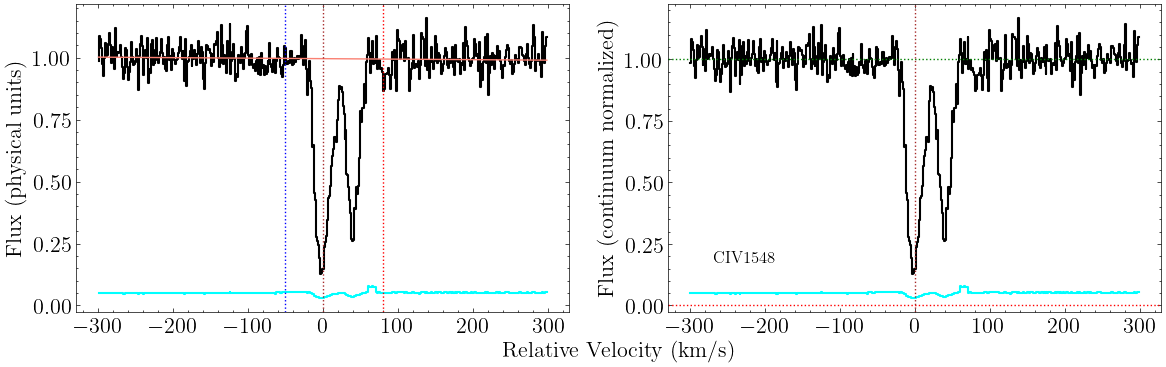

In [78]:
fig, ax = civ_1548_hires.plot_ion_transition_spec_cont()

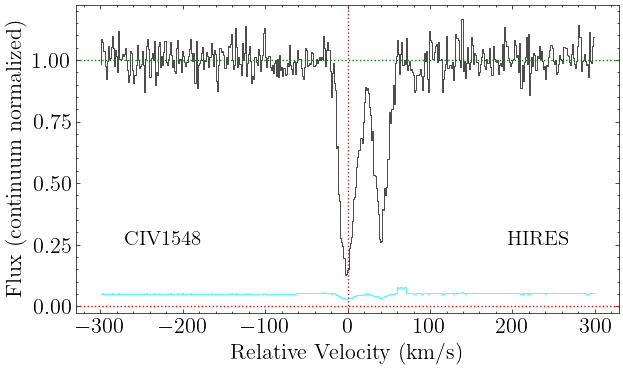

In [79]:
fig, ax = civ_1548_hires.plot_ion_transition_spec()

In [80]:
civ_1548_hires.get_EW_total(-50,80)

Integration window: [-50, 80]
EW, 1sig: 176, 3
EW-3sig: 10.037


In [81]:
civ_1548_hires.grab_ion_transition_lsf(lsf_fits_list)

In [82]:
civ_1548_hires.get_upper_lim(11)

logN-1sig: 11.5
logN-2sig: 11.8
logN-3sig: 11.9


In [83]:
civ_1548_hires.init_ion_transition(init_values = np.array([[13.61, 13, 0],[13.42, 13, 39]]), 
                             lsf_convolve = True)

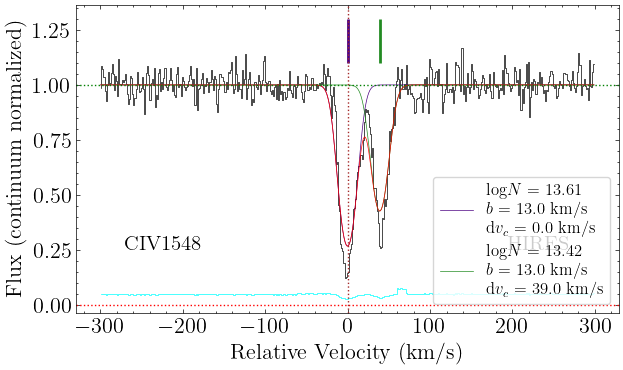

In [84]:
fig, ax = civ_1548_hires.plot_ion_transition_init_fit()

In [85]:
civ_1548_hires.fit_ion_transition()

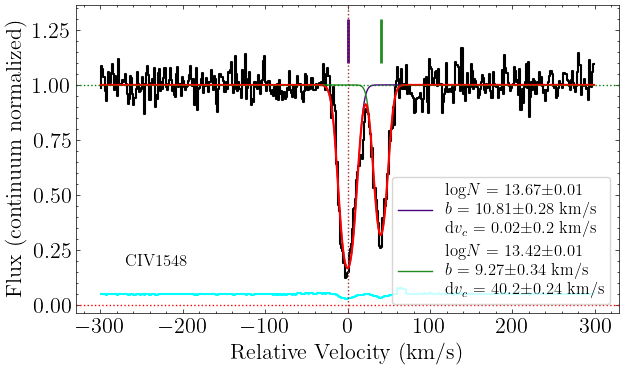

In [86]:
fig, ax = civ_1548_hires.plot_ion_transition_best_fit()

## CIV 1550 (HIRES)

In [87]:
civ_1550_hires = ion_transition('CIV', 1550, 'C', z_sys, 'HIRES')

In [88]:
civ_1550_hires.grab_ion_transition_info()

In [89]:
civ_1550_hires.grab_ion_transition_spec(spec_fits_list, v_range=[-300,300])

In [90]:
civ_1550_hires.cont_norm_flux(v_abs_range=[-40,70], degree=1)

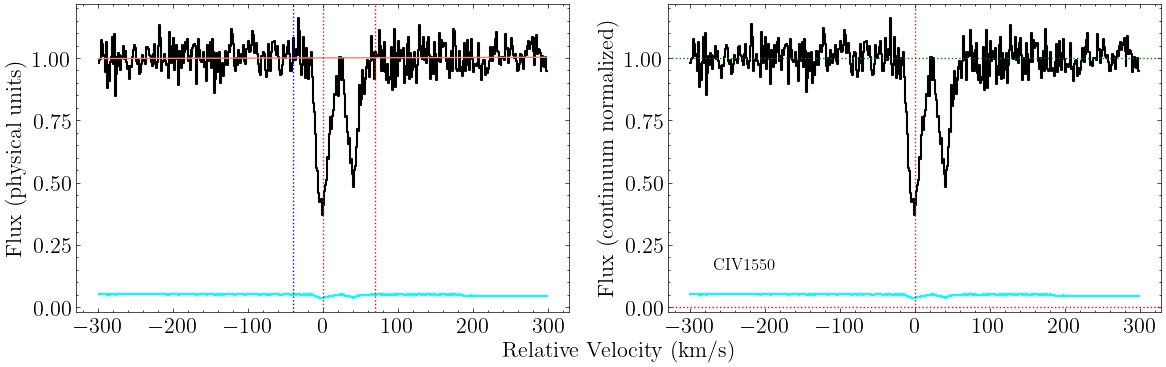

In [91]:
fig, ax = civ_1550_hires.plot_ion_transition_spec_cont()

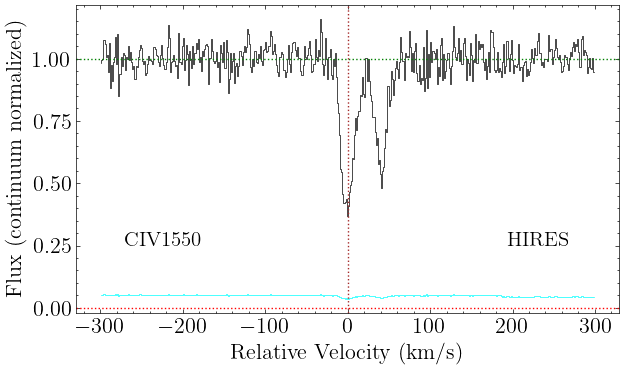

In [92]:
fig, ax = civ_1550_hires.plot_ion_transition_spec()

In [93]:
civ_1550_hires.get_EW_total(-40,70)

Integration window: [-40, 70]
EW, 1sig: 106, 3
EW-3sig: 8.696


In [94]:
civ_1550_hires.grab_ion_transition_lsf(lsf_fits_list)

In [95]:
civ_1550_hires.get_upper_lim(11)

logN-1sig: 11.9
logN-2sig: 12.1
logN-3sig: 12.3


In [96]:
civ_1550_hires.init_ion_transition(init_values = np.array([[13.61, 10, 0],[13.42, 10, 39]]), 
                             lsf_convolve = True)

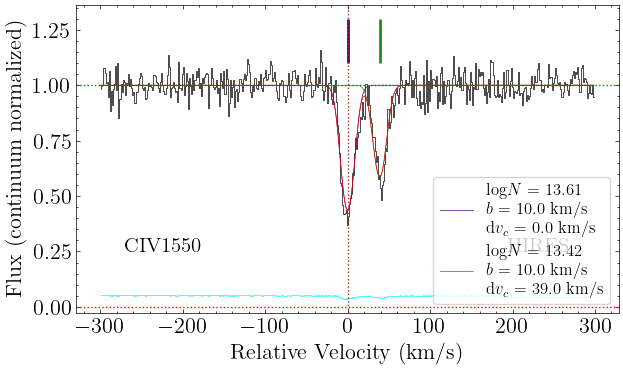

In [97]:
fig, ax = civ_1550_hires.plot_ion_transition_init_fit()

In [98]:
civ_1550_hires.fit_ion_transition()

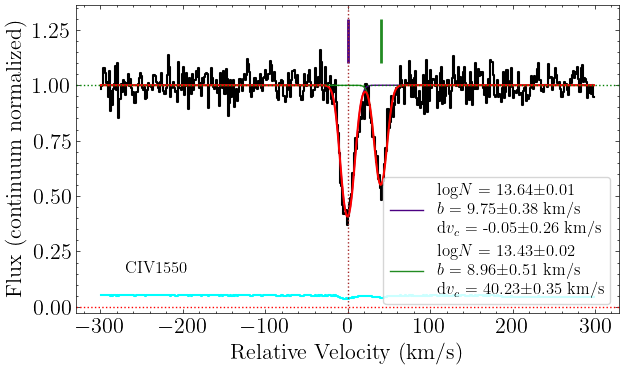

In [99]:
fig, ax = civ_1550_hires.plot_ion_transition_best_fit()

## CIV ion

In [100]:
civ = ion(z_sys, 'CIV', [civ_1548_hires, civ_1550_hires])

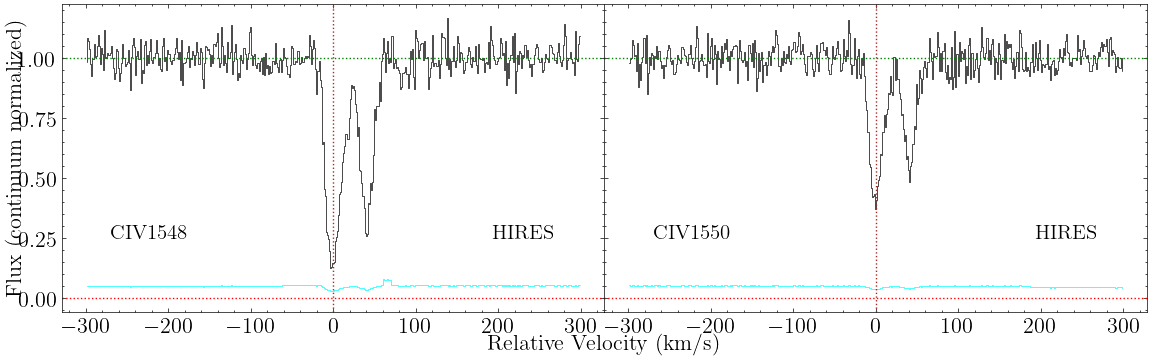

In [101]:
fig, axes = civ.plot_ion()

In [102]:
civ.init_ion([civ_1548_hires.best_values, civ_1548_hires.best_values])
#ciii.init_ion(np.array([[13.42,16,-1.15]]))

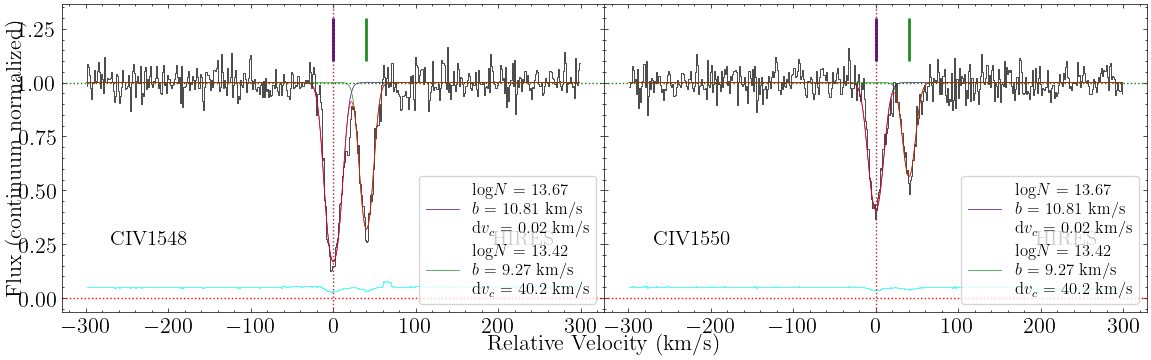

In [103]:
fig, axes = civ.plot_ion_init_fit()

In [104]:
civ.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']
                              ])

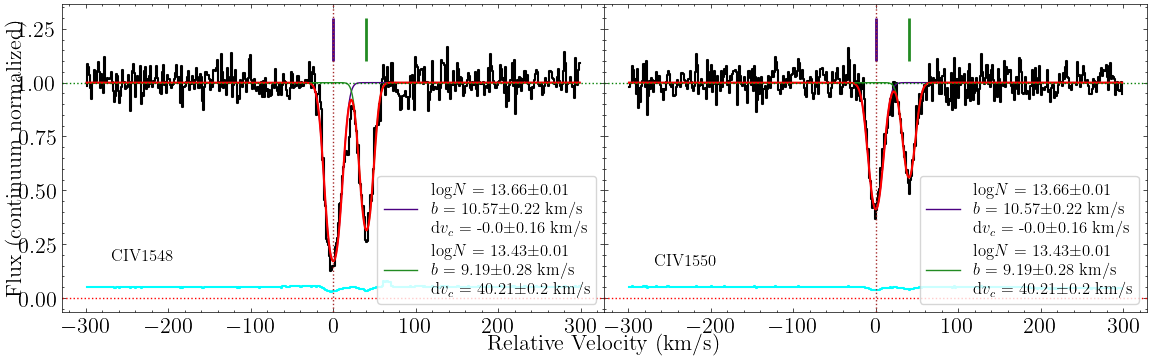

In [105]:
fig, axes = civ.plot_ion_best_fit()

In [106]:
#civ.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#civ.fit_ion_emcee(load=True, loaddir=rootdir)

In [107]:
#fig, axes = civ.plot_samples()

In [108]:
#civ.plot_corner()

# NIV

## NIV 765
Get NIV 765 from COS FUV

In [109]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'COS FUV')

In [110]:
niv_765_fuv.grab_ion_transition_info(delta_v=2.5)

In [111]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-80],[250,300],[30,80]])

In [112]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-40,80], degree=1)

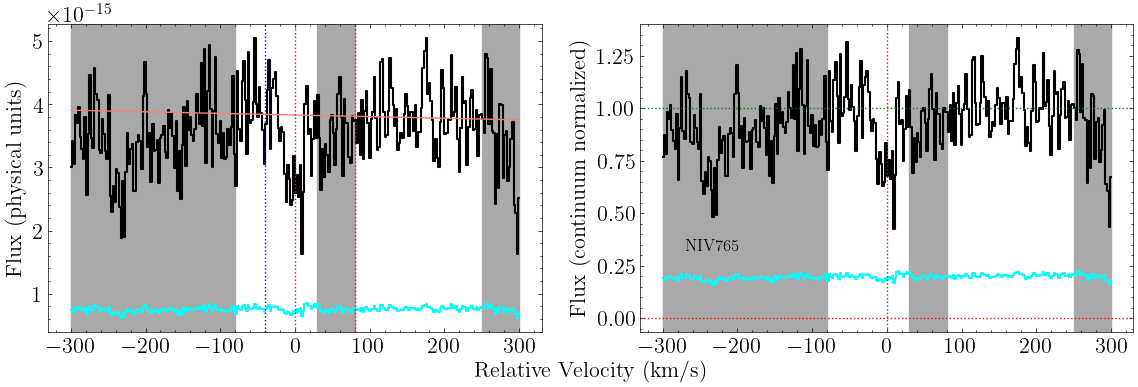

In [113]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

In [114]:
niv_765_fuv.get_EW_total(-40,65)

Integration window: [-40, 65]
EW, 1sig: 28, 7
EW-3sig: 22.198


In [115]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [116]:
#niv_765_fuv.get_upper_lim(10)

In [117]:
niv_765_fuv.init_ion_transition(init_values = np.array([[13.01, 9, 0]]), 
                             lsf_convolve = True)

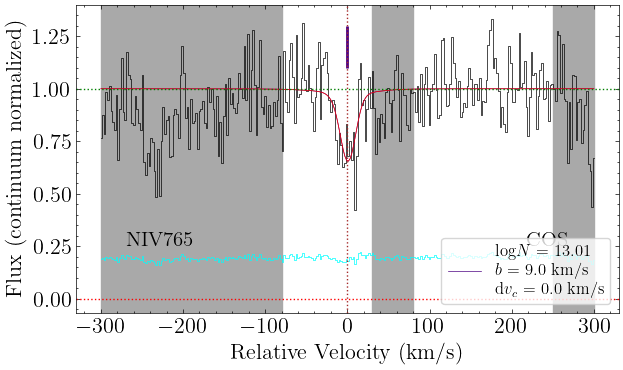

In [118]:
fig, ax = niv_765_fuv.plot_ion_transition_init_fit()

In [119]:
niv_765_fuv.fit_ion_transition()

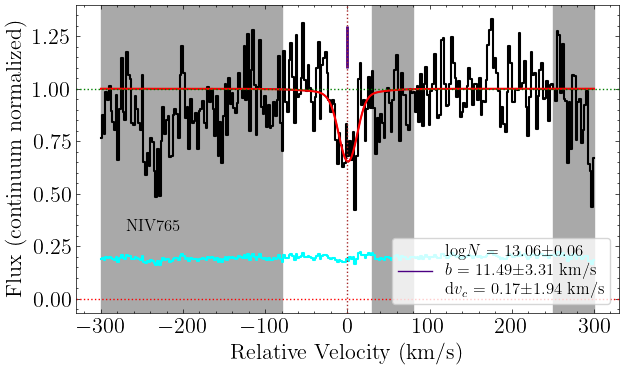

In [120]:
fig, ax = niv_765_fuv.plot_ion_transition_best_fit()

## NIV ion
Now compile the NIV ion

In [121]:
niv = ion(z_sys, 'NIV', [niv_765_fuv])

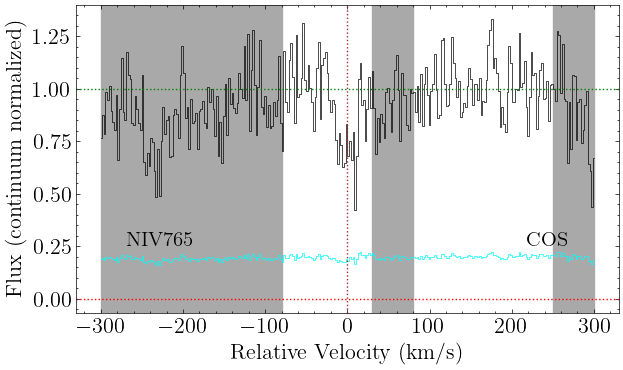

In [122]:
fig, axes = niv.plot_ion()

In [123]:
niv.init_ion([[[12.9, 10, 0]]])

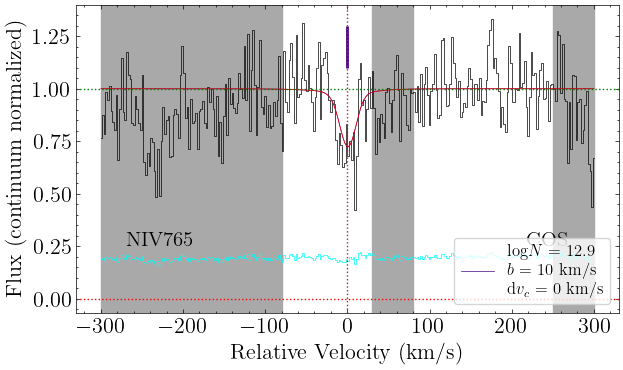

In [124]:
fig, axes = niv.plot_ion_init_fit()

In [125]:
niv.fit_ion(fix_params_list = ['it1c1_dv_c'], 
            lower_bounds_dict={'it1c1_b':4},
            upper_bounds_dict={'it1c1_b':40})

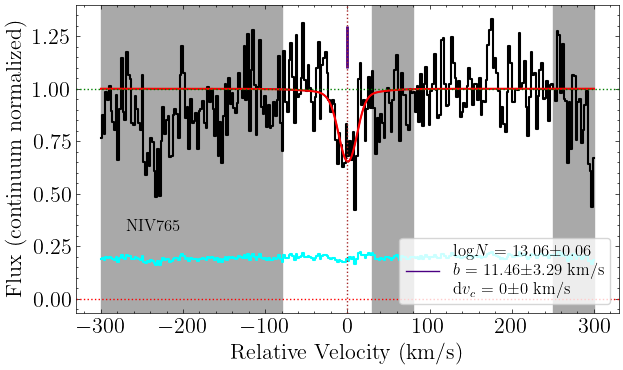

In [126]:
fig, axes = niv.plot_ion_best_fit()

In [127]:
#niv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-12, n_walkers=100, n_steps=2500)
#niv.fit_ion_emcee(load=True, loaddir=rootdir)

In [128]:
#fig, axes = niv.plot_samples()

In [129]:
#niv.plot_corner()

# OIII

## OIII 702

Get the OIII 702 line in COS FUV

In [130]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys, 'COS FUV')

In [131]:
oiii_702_fuv.grab_ion_transition_info(delta_v=5.2)

In [132]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[220,300]])

In [133]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-50,65], degree=1)

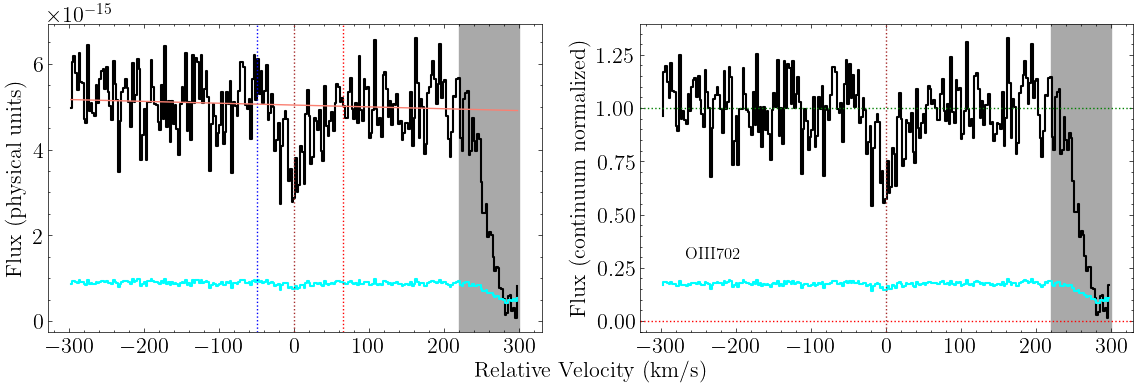

In [134]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

In [135]:
oiii_702_fuv.get_EW_total(-50,65)

Integration window: [-50, 65]
EW, 1sig: 29, 6
EW-3sig: 19.294


In [136]:
oiii_702_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [137]:
oiii_702_fuv.get_upper_lim_data(10, 40, v_min=20, v_max=120)

logN-1sig: 13.4
logN-2sig: 13.5
logN-3sig: 13.6


In [138]:
oiii_702_fuv.init_ion_transition(init_values = np.array([[13.66, 12, 0]]), 
                             lsf_convolve = True)

#oiii_702_fuv.init_multi_voigt(init_values = np.array([[14.2, 12, 0]]), 
#                             lsf_convolve = True)

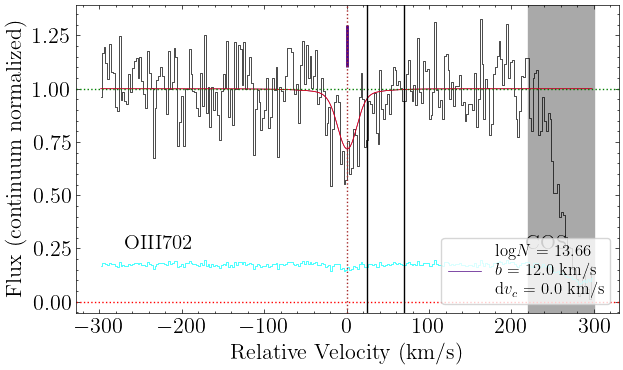

In [139]:
fig, ax = oiii_702_fuv.plot_ion_transition_init_fit()
ax.axvline(25)
ax.axvline(70)

In [140]:
oiii_702_fuv.fit_ion_transition()

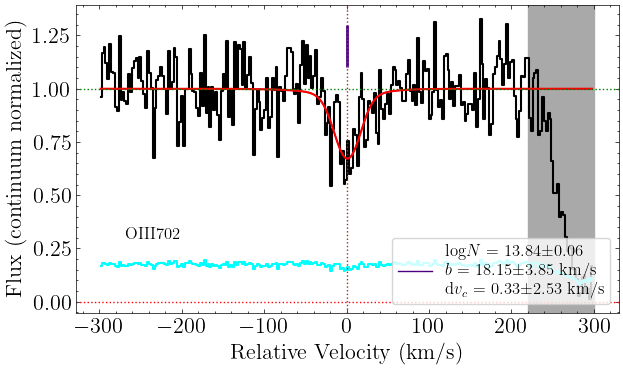

In [141]:
fig, ax = oiii_702_fuv.plot_ion_transition_best_fit()

## OIII 832 (NUV)

In [142]:
oiii_832_nuv = ion_transition('OIII', 832, 'O', z_sys, 'COS NUV')

In [143]:
oiii_832_nuv.grab_ion_transition_info()

In [144]:
oiii_832_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-170,-120]])

In [145]:
oiii_832_nuv.cont_norm_flux(v_abs_range=[-120,65], degree=1)

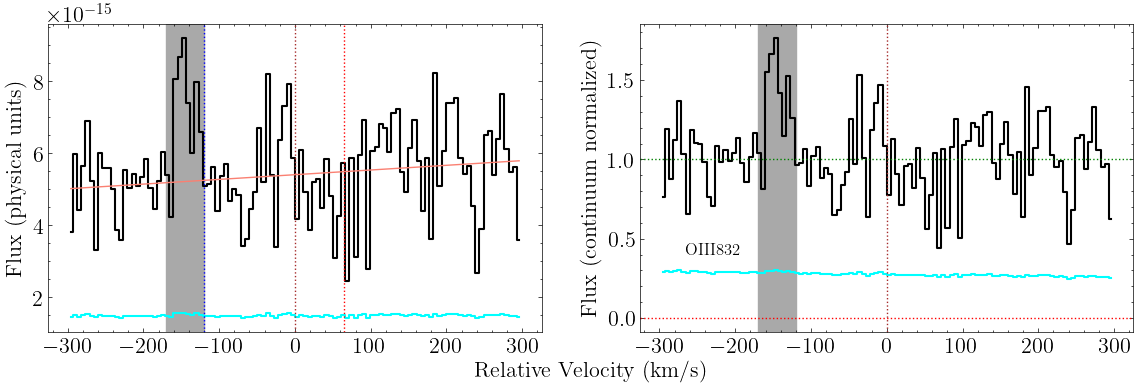

In [146]:
fig, ax = oiii_832_nuv.plot_ion_transition_spec_cont()

In [147]:
oiii_832_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [148]:
oiii_832_nuv.init_ion_transition(init_values = [[13.83, 13, 0]], 
                             lsf_convolve = True)

#oiii_702_fuv.init_multi_voigt(init_values = np.array([[14.2, 12, 0]]), 
#                             lsf_convolve = True)

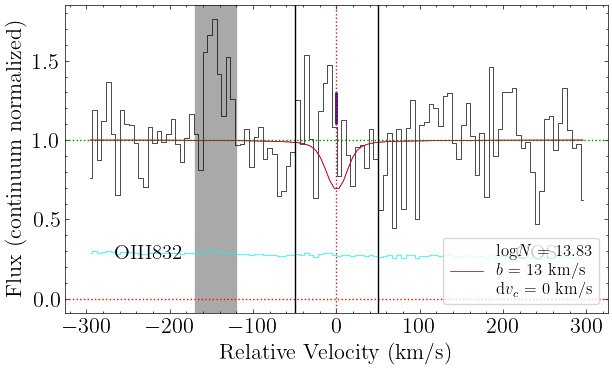

In [149]:
fig, ax = oiii_832_nuv.plot_ion_transition_init_fit()
ax.axvline(-50)
ax.axvline(50)

In [150]:
oiii_832_nuv.fit_ion_transition()

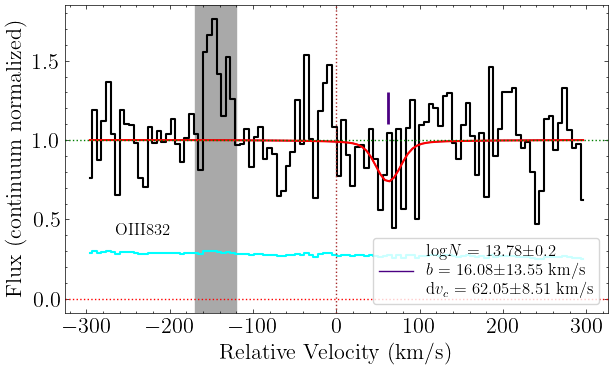

In [151]:
fig, ax = oiii_832_nuv.plot_ion_transition_best_fit()

In [152]:
oiii_832_nuv.get_upper_lim(10)

logN-1sig: 13.6
logN-2sig: 13.8
logN-3sig: 14.0


In [153]:
oiii_832_nuv.get_upper_lim_data(10, 0, v_min=-50, v_max=50, logN_max=17)

logN-1sig: 13.4
logN-2sig: 13.7
logN-3sig: 14.0


## OIII ion

Compile the OIII ion

In [154]:
oiii = ion(z_sys, 'OIII', [oiii_702_fuv])

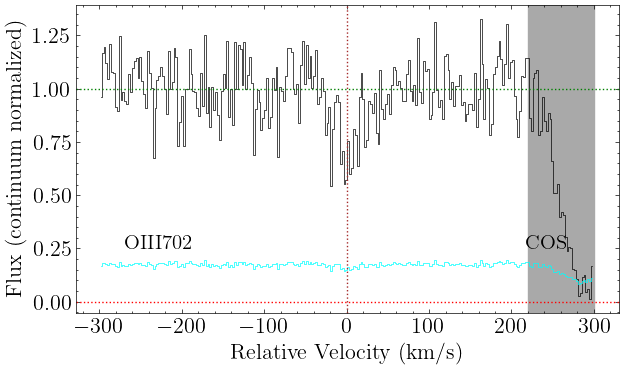

In [155]:
fig, axes = oiii.plot_ion()

In [156]:
oiii.init_ion([[[13.83, 13, 0]]])
#oiii.init_ion(np.array([[13.8, 13.61, -0.77]]))

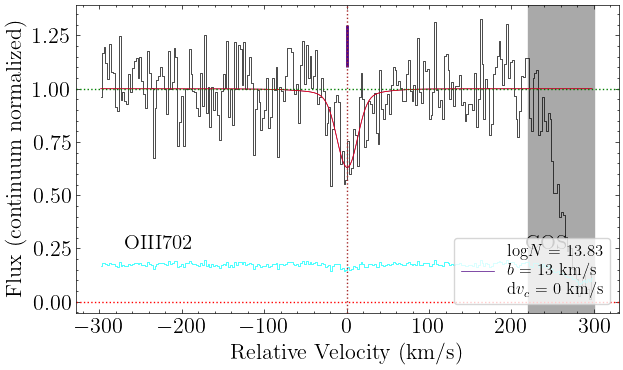

In [157]:
fig, axes = oiii.plot_ion_init_fit()

In [158]:
oiii.fit_ion(fix_params_list = ['it1c1_dv_c', 'it1c1_b'],)
            #lower_bounds_dict = {'it1c1_b': 6},
            #upper_bounds_dict = {'it1c1_b': 40})

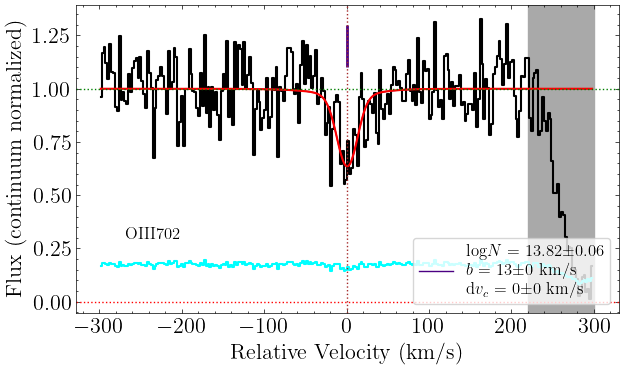

In [159]:
fig, axes = oiii.plot_ion_best_fit()

In [160]:
#oiii.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-9, n_walkers=100, n_steps=2500)
#oiii.fit_ion_emcee(load=True, loaddir=rootdir)

In [161]:
#fig, axes = oiii.plot_samples()

In [162]:
#oiii.plot_corner()

# OIV

## OIV 554
Get OIV 554 from COS FUV

In [163]:
oiv_554_fuv = ion_transition('OIV', 554, 'O', z_sys, 'COS FUV')

In [164]:
oiv_554_fuv.grab_ion_transition_info()

In [165]:
oiv_554_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120],[60,110]])

In [166]:
oiv_554_fuv.cont_norm_flux(v_abs_range=[-70,110], degree=1)

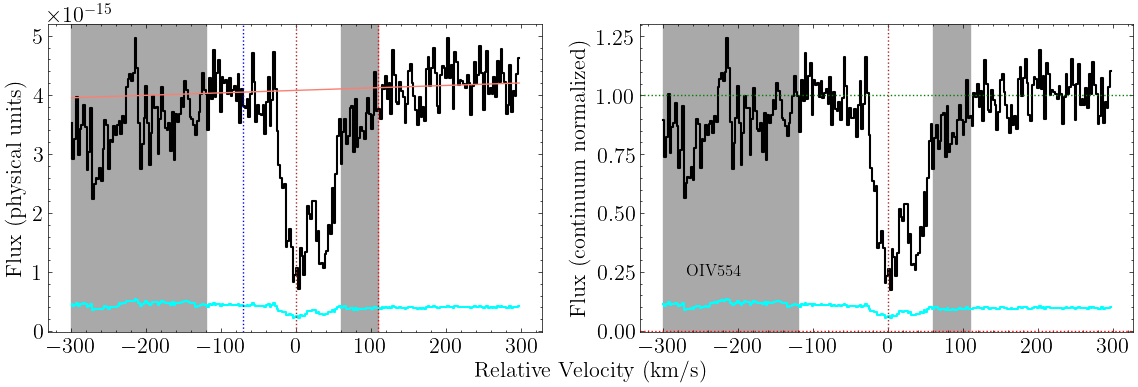

In [167]:
fig, ax = oiv_554_fuv.plot_ion_transition_spec_cont()

In [168]:
oiv_554_fuv.get_EW_total(-70,60)

Integration window: [-70, 60]
EW, 1sig: 90, 3
EW-3sig: 8.489


In [169]:
oiv_554_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [170]:
#oiv_554_fuv.get_upper_lim(12)

In [171]:
oiv_554_fuv.init_ion_transition(init_values = np.array([[14.4, 7, 0], 
                                                     [14.2, 7, 37]]), 
                             lsf_convolve = True)

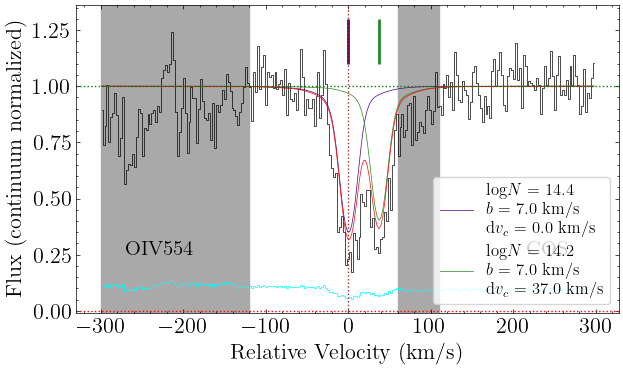

In [172]:
fig, ax = oiv_554_fuv.plot_ion_transition_init_fit()

In [173]:
oiv_554_fuv.fit_ion_transition()

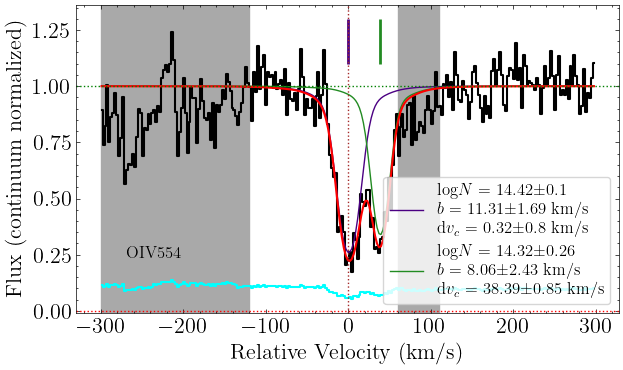

In [174]:
fig, ax = oiv_554_fuv.plot_ion_transition_best_fit()

## OIV 608
Get OIV 608 from COS FUV

In [175]:
oiv_608_fuv = ion_transition('OIV', 608, 'O', z_sys, 'COS FUV')

In [176]:
oiv_608_fuv.grab_ion_transition_info()

In [177]:
oiv_608_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-230,-90]])

In [178]:
oiv_608_fuv.cont_norm_flux(v_abs_range=[-40,70], degree=1)

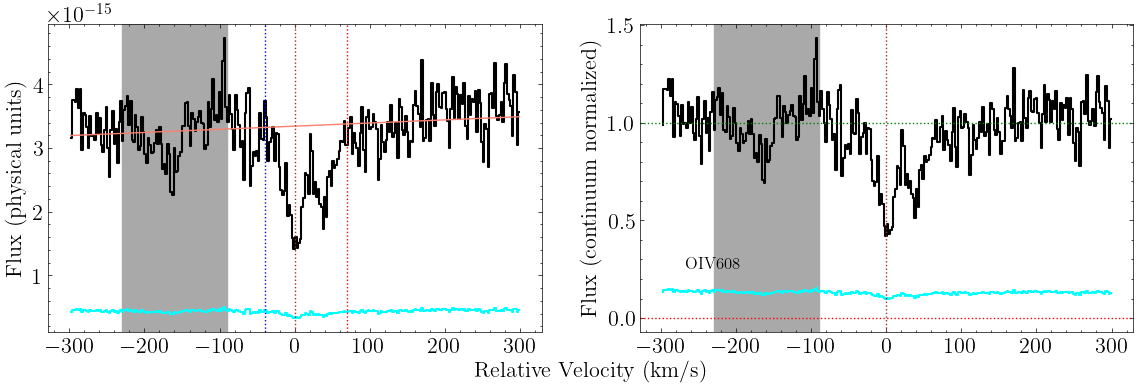

In [179]:
fig, ax = oiv_608_fuv.plot_ion_transition_spec_cont()

In [180]:
oiv_608_fuv.get_EW_total(-40,70)

Integration window: [-40, 70]
EW, 1sig: 56, 4
EW-3sig: 10.968


In [181]:
oiv_608_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [182]:
oiv_608_fuv.get_upper_lim(12)

logN-1sig: 13.1
logN-2sig: 13.4
logN-3sig: 13.5


In [183]:
oiv_608_fuv.init_ion_transition(init_values = np.array([[14.4, 7, 0], 
                                                     [14.2, 7, 37]]), 
                             lsf_convolve = True)

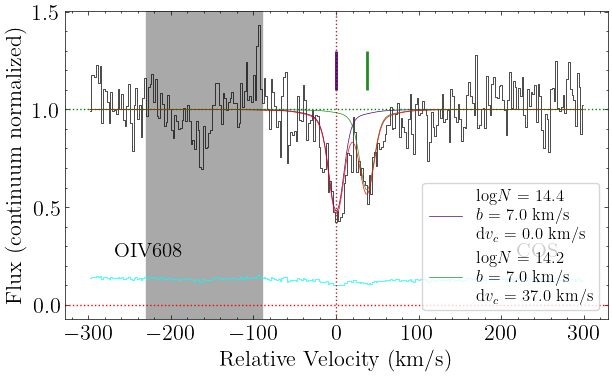

In [184]:
fig, ax = oiv_608_fuv.plot_ion_transition_init_fit()

In [185]:
oiv_608_fuv.fit_ion_transition()

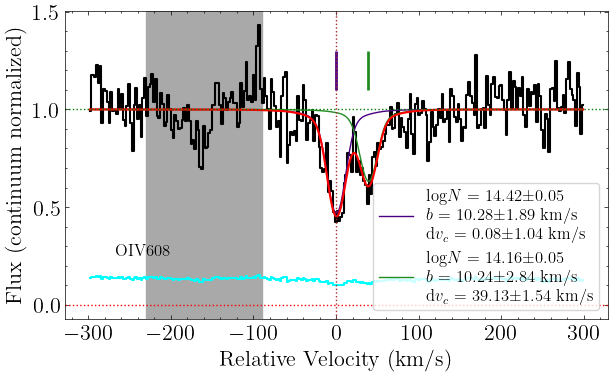

In [186]:
fig, ax = oiv_608_fuv.plot_ion_transition_best_fit()

## OIV 787
Get OIV 787 from COS FUV

In [187]:
oiv_787_fuv = ion_transition('OIV', 787, 'O', z_sys, 'COS FUV')

In [188]:
oiv_787_fuv.grab_ion_transition_info()

In [189]:
oiv_787_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-190,-25]])

In [190]:
#oiv_787_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-50,60], degree=1)
oiv_787_fuv.cont_norm_flux(v_abs_range=[-20,100], degree=1)

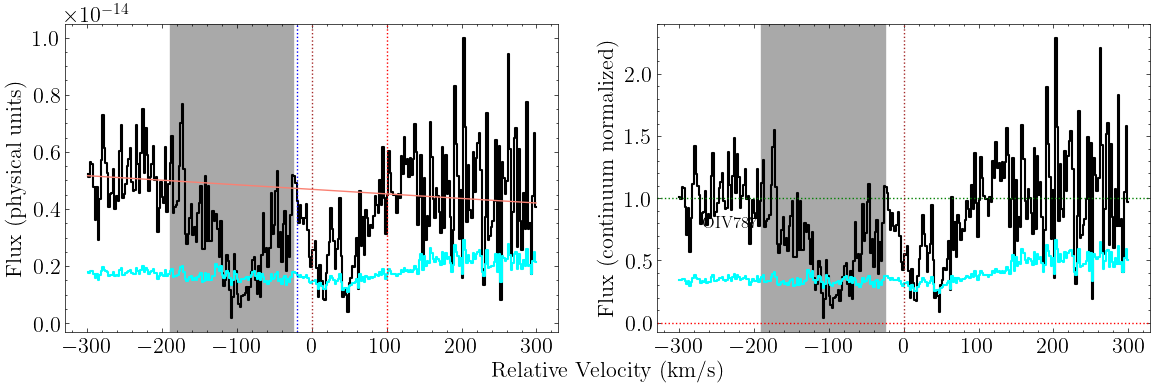

In [191]:
fig, ax = oiv_787_fuv.plot_ion_transition_spec_cont()

In [192]:
oiv_787_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [193]:
oiv_787_fuv.get_upper_lim(12)

logN-1sig: 13.3
logN-2sig: 13.5
logN-3sig: 13.7


In [194]:
oiv_787_fuv.init_ion_transition(init_values = np.array([[14.4, 7, 0], 
                                                     [14.2, 7, 37]]), 
                             lsf_convolve = True)

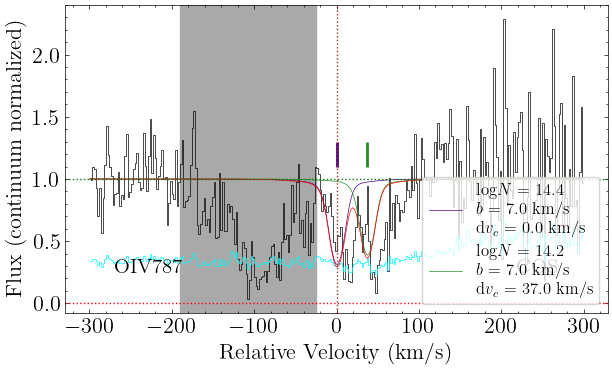

In [195]:
fig, ax = oiv_787_fuv.plot_ion_transition_init_fit()

In [196]:
#oiv_787_fuv.fit_ion_transition()

In [197]:
#fig, ax = oiv_787_fuv.plot_ion_transition_best_fit()

## OIV ion
Now compile the OIV ion

In [198]:
oiv = ion(z_sys, 'OIV', [oiv_554_fuv, oiv_608_fuv])

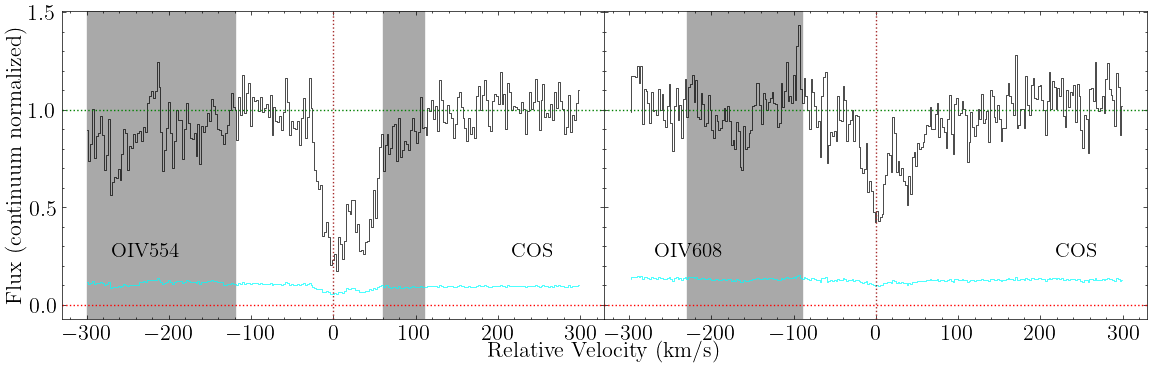

In [199]:
fig, axes = oiv.plot_ion(n_cols=2)

In [200]:
oiv.init_ion([[[14.5, 11, 0], [14.6, 8, 40]], 
              [[14.5, 11, 0], [14.6, 8, 40]]])

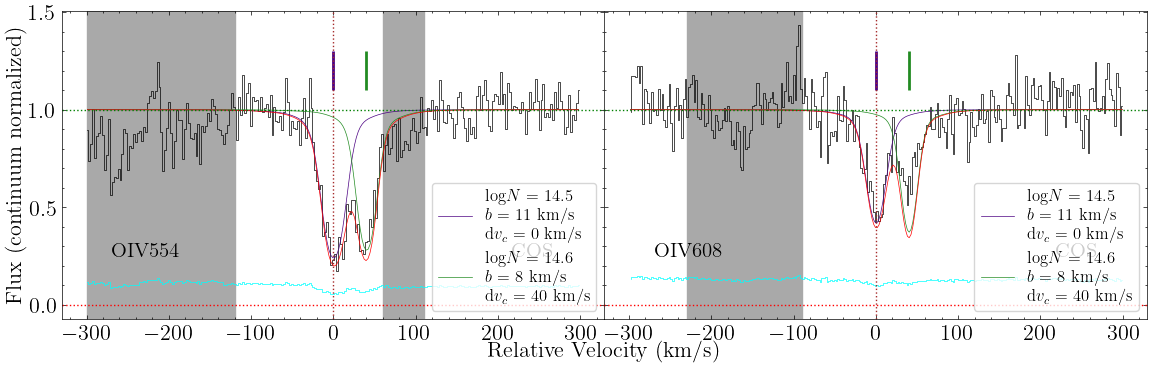

In [201]:
fig, axes = oiv.plot_ion_init_fit()

In [202]:
oiv.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']],
           fix_params_list = ['it1c1_dv_c', 'it1c2_dv_c'])

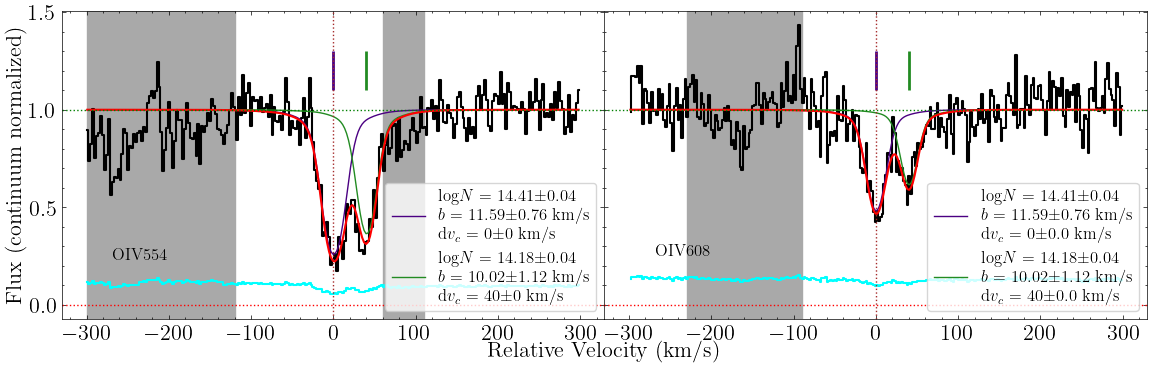

In [203]:
fig, axes = oiv.plot_ion_best_fit()

In [204]:
#oiv.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-6, n_walkers=100, n_steps=2500)
#oiv.fit_ion_emcee(load=True, loaddir=rootdir)

In [205]:
#fig, axes = oiv.plot_samples()

In [206]:
#oiv.plot_corner()

# OV

## OV 629
Get OV 629 from COS FUV

In [207]:
ov_629_fuv = ion_transition('OV', 629, 'O', z_sys, 'COS FUV')

In [208]:
ov_629_fuv.grab_ion_transition_info(delta_v=15)

In [209]:
ov_629_fuv.grab_ion_transition_spec(spec_fits_list, masks = [[-95,-40],[65,195],[255,300]])#masks=[[-80,-20],[80,210],[270,300]])

In [210]:
ov_629_fuv.cont_norm_flux(v_abs_range=[-95,195], degree=1)

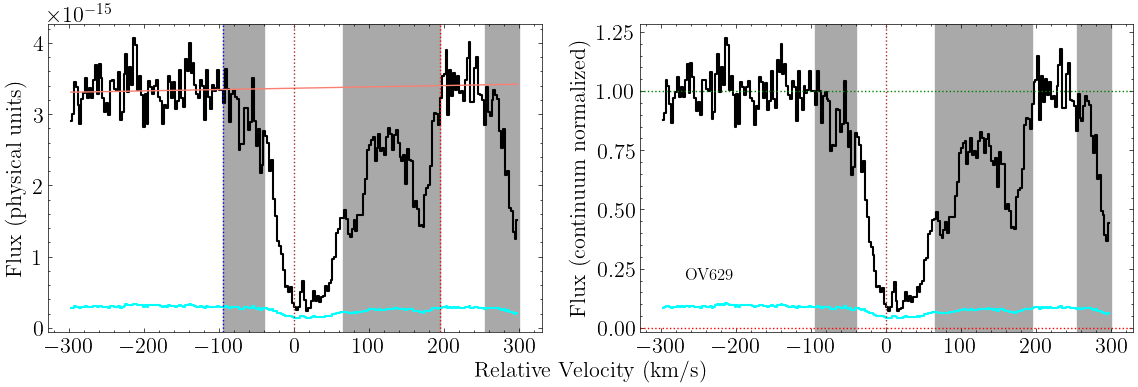

In [211]:
fig, ax = ov_629_fuv.plot_ion_transition_spec_cont()

In [212]:
ov_629_fuv.get_EW_total(-80,120)

Integration window: [-80, 120]
EW, 1sig: 221, 3
EW-3sig: 9.353


In [213]:
ov_629_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [214]:
ov_629_fuv.init_ion_transition(init_values = np.array([[14.69, 11.9, 10],
                                                    [14.2, 11, 50]]), 
                             lsf_convolve = True)

#ov_629_fuv.init_multi_voigt(init_values = np.array([[14.69, 12, -5],
#                                                    [14.03, 10, 30],
#                                                    [13.4, 10, 80],
#                                                    [13.4, 10, 160],
#                                                    [12.9, 40, 80]]), 
#                             lsf_convolve = True)

#oiii_702_fuv.init_multi_voigt(init_values = np.array([[14.2, 12, 0]]), 
#                             lsf_convolve = True)

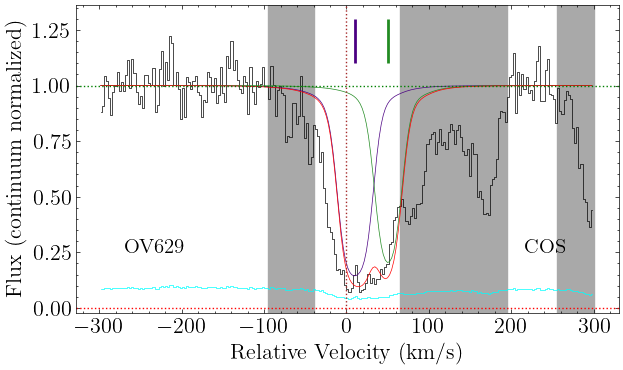

In [215]:
fig, ax = ov_629_fuv.plot_ion_transition_init_fit(legend=False)

In [216]:
ov_629_fuv.fit_ion_transition()

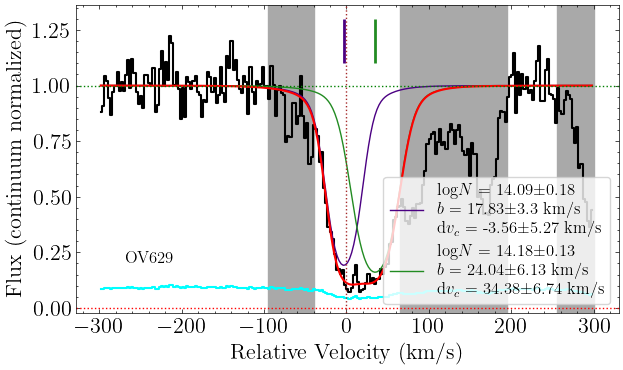

In [217]:
fig, ax = ov_629_fuv.plot_ion_transition_best_fit()
#ax.axvline(-60)
#ax.axvline(120)

In [218]:
ov_629_fuv.get_EW_total(-60,120)

Integration window: [-60, 120]
EW, 1sig: 215, 3
EW-3sig: 8.525


## OV ion

Compile the OV ion

In [219]:
ov = ion(z_sys, 'OV', [ov_629_fuv])

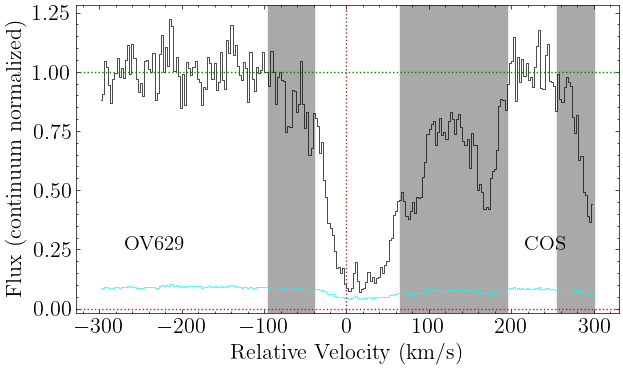

In [220]:
fig, axes = ov.plot_ion()

In [221]:
ov.init_ion([[[14.4, 13, 0],[14.4, 12, 40]]])

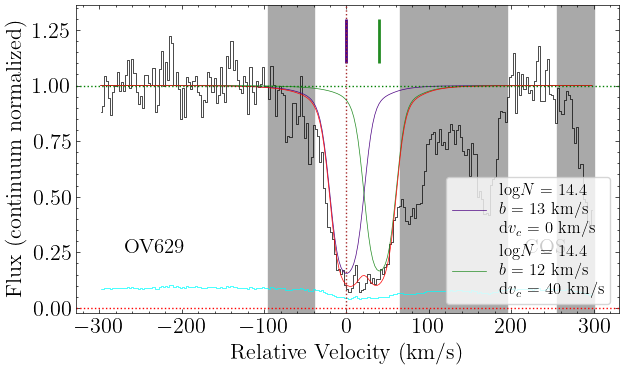

In [222]:
fig, axes = ov.plot_ion_init_fit()

In [223]:
ov.fit_ion(fix_params_list = ['it1c1_b', 'it1c2_b', 'it1c1_dv_c', 'it1c2_dv_c'])
          #exclude_models = ['it1c1_b < it1c2_b'])

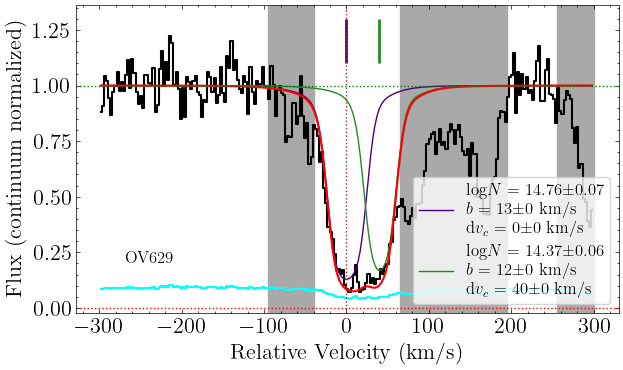

In [224]:
fig, axes = ov.plot_ion_best_fit(legend=True)

In [225]:
#ov.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-19, n_walkers=100, n_steps=2500)
#ov.fit_ion_emcee(load=True, loaddir=rootdir)

In [226]:
#fig, axes = ov.plot_samples()

In [227]:
#ov.plot_corner()

In [228]:
#np.percentile(ov.result_emcee.flatchain['it1c1_logN'], 100*(1-cdf_3sig)), np.percentile(ov.result_emcee.flatchain['it1c2_logN'], 100*(1-cdf_3sig))

# OVI

## OVI 1031 (STIS)

First do OVI 1031 from STIS

In [229]:
ovi_1031_stis = ion_transition('OVI', 1031, 'O', z_sys, 'STIS')

In [230]:
ovi_1031_stis.grab_ion_transition_info(delta_v=15)

In [231]:
ovi_1031_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-115,-35],[60,105]])

In [232]:
ovi_1031_stis.cont_norm_flux(v_abs_range=[-115,105], degree=1)

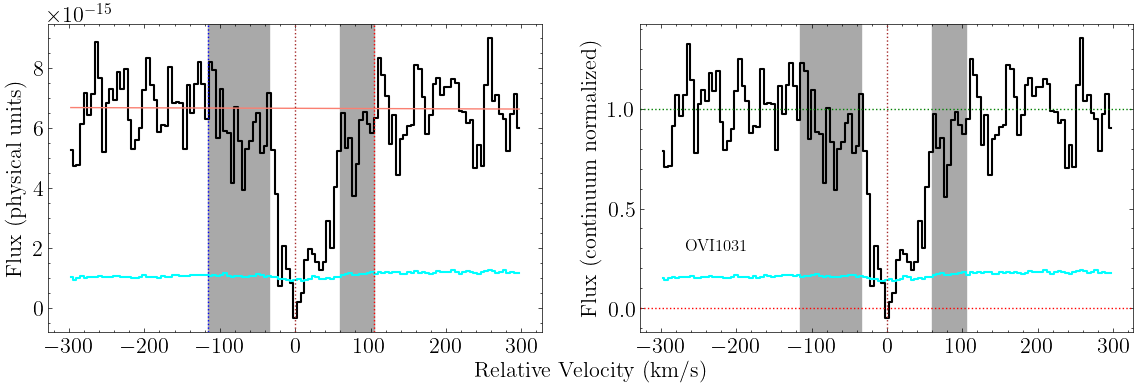

In [233]:
fig, ax = ovi_1031_stis.plot_ion_transition_spec_cont()

In [234]:
ovi_1031_stis.get_EW_total(-20,75)

Integration window: [-20, 75]
EW, 1sig: 215, 11
EW-3sig: 32.845


In [235]:
ovi_1031_stis.grab_ion_transition_lsf(lsf_fits_list)

In [236]:
ovi_1031_stis.init_ion_transition(init_values = np.array([[15.55, 10, 0],
                                                     [14.53, 10, 40]]), 
                             lsf_convolve = True)

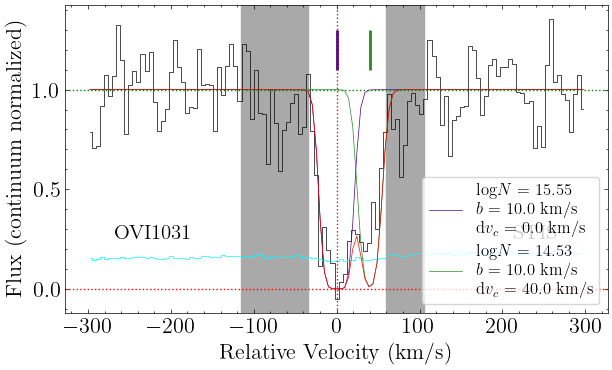

In [237]:
fig, ax = ovi_1031_stis.plot_ion_transition_init_fit()

In [238]:
ovi_1031_stis.fit_ion_transition()

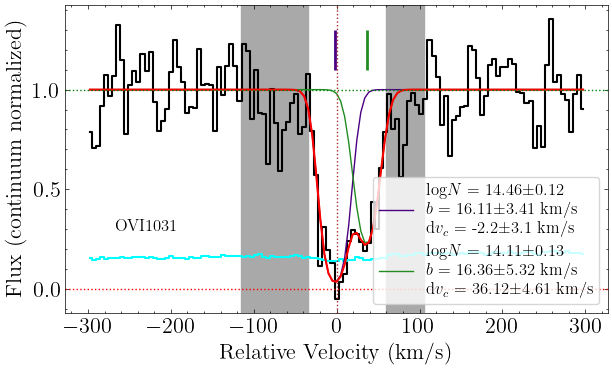

In [239]:
fig, ax = ovi_1031_stis.plot_ion_transition_best_fit()

## Interlude: HI 1215 (z=0.94)
Get HI 1215 from COS STIS

In [240]:
hi_1215_stis_re = ion_transition('HI', 1215, 'H', 0.94480935, 'STIS')

In [241]:
hi_1215_stis_re.grab_ion_transition_info(delta_v=15)

In [242]:
hi_1215_stis_re.grab_ion_transition_spec(spec_fits_list)

In [243]:
hi_1215_stis_re.cont_norm_flux(v_abs_range=[-165,135], degree=1)

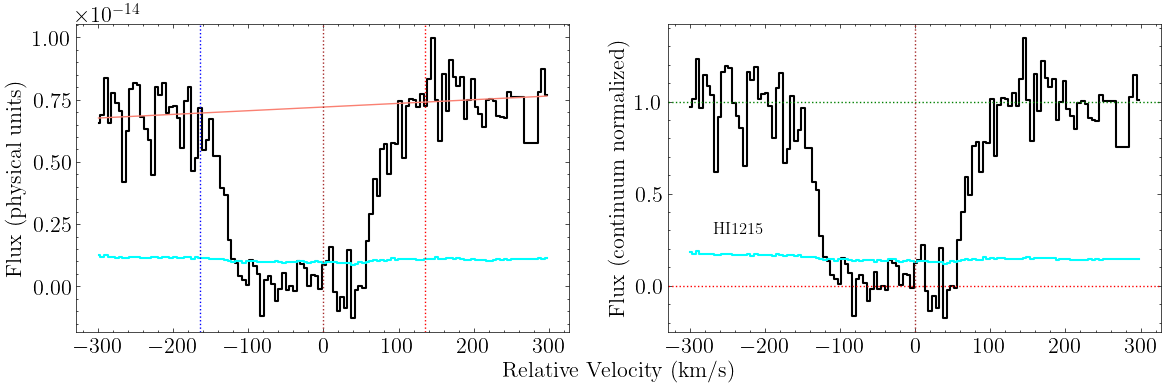

In [244]:
fig, ax = hi_1215_stis_re.plot_ion_transition_spec_cont()

In [245]:
hi_1215_stis_re.grab_ion_transition_lsf(lsf_fits_list)

In [246]:
hi_1215_stis_re.init_ion_transition([[15.59, 40, -15]], 
                              lsf_convolve = True)

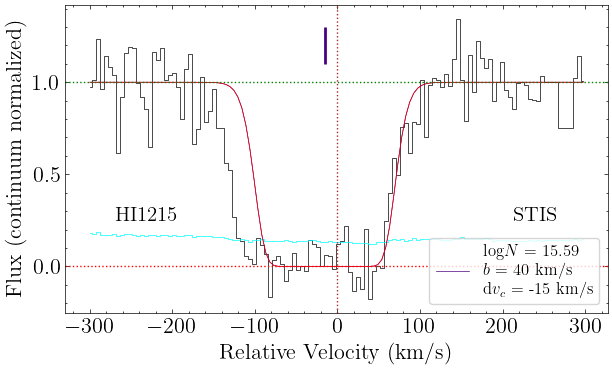

In [247]:
fig, ax = hi_1215_stis_re.plot_ion_transition_init_fit()

## OVI 1037 at z=1.27 with HI 1215 at z=0.94
Get OVI 1037 from COS STIS

In [248]:
ovi_1037_stis_init = ion_transition('OVI', 1037, 'O', z_sys, 'STIS')

In [249]:
ovi_1037_stis_init.grab_ion_transition_info(delta_v=15)

In [250]:
ovi_1037_stis_init.grab_ion_transition_spec(spec_fits_list)

In [251]:
ovi_1037_stis_init.cont_norm_flux(v_abs_range=[-50,270], degree=1)

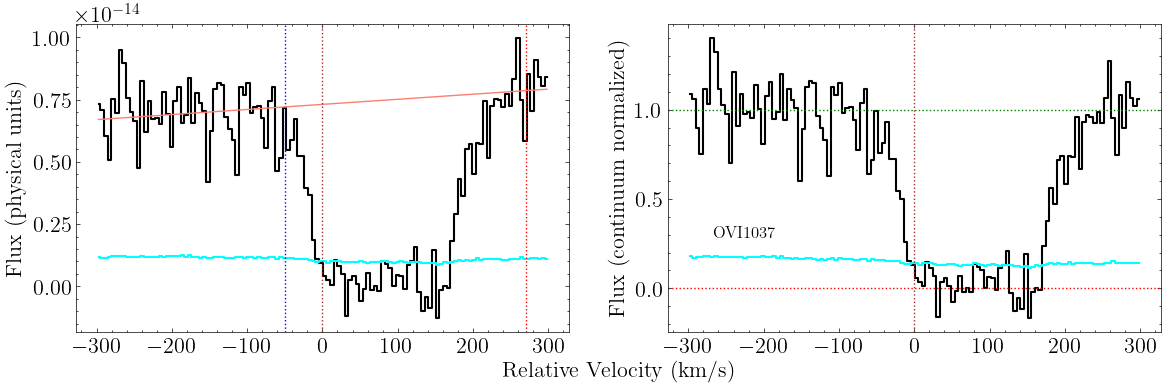

In [252]:
fig, ax = ovi_1037_stis_init.plot_ion_transition_spec_cont()

In [253]:
ovi_1037_stis_init.grab_ion_transition_lsf(lsf_fits_list)

In [254]:
ovi_1037_stis_init.init_ion_transition(init_values = ovi_1031_stis.best_values, 
                             lsf_convolve = True)

In [255]:
dv_c_hi_1025_stis_re = 3e+5*((hi_1215_stis_re.wav0_obs-ovi_1037_stis_init.wav0_obs)/ovi_1037_stis_init.wav0_obs)

In [256]:
hi_flux_interp = np.interp(ovi_1037_stis_init.v, hi_1215_stis_re.v+dv_c_hi_1025_stis_re, hi_1215_stis_re.init_total_flux)

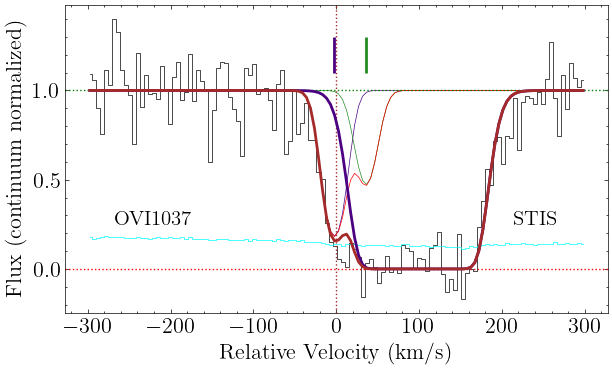

In [257]:
fig, ax = ovi_1037_stis_init.plot_ion_transition_init_fit(legend=False)
ax.plot(ovi_1037_stis_init.v, hi_flux_interp, lw=2, color='indigo', label='Total LyA flux')
ax.plot(ovi_1037_stis_init.v, ovi_1037_stis_init.init_total_flux*hi_flux_interp, lw=2, color='brown', label='Total flux')

#ax.legend()

## OVI 1037 (STIS)
Get OVI 1037 from STIS

In [258]:
ovi_1037_stis = ion_transition('OVI', 1037, 'O', z_sys, 'STIS')

In [259]:
ovi_1037_stis.grab_ion_transition_info(delta_v=15)

In [260]:
ovi_1037_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-85, -35], [20, 75]])#masks=[[-70,-20],[35,90]])

In [261]:
ovi_1037_stis.cont_norm_flux(v_abs_range=[-115,255], degree=1)

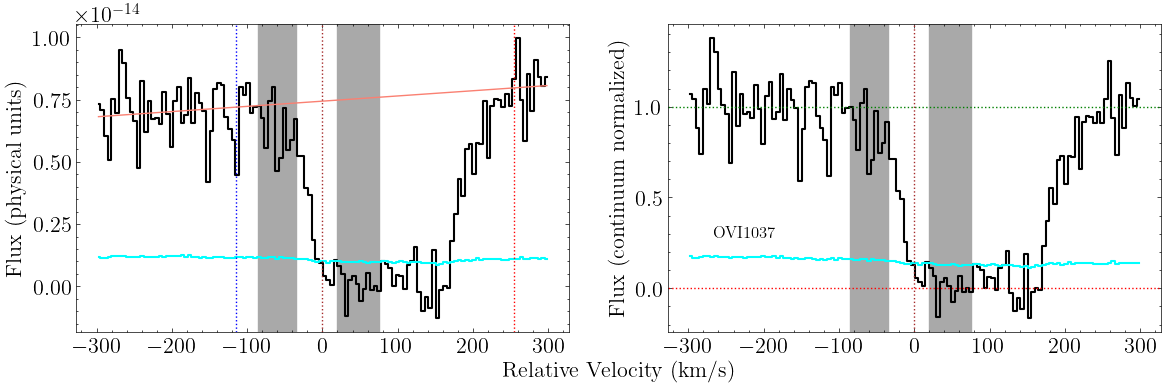

In [262]:
fig, ax = ovi_1037_stis.plot_ion_transition_spec_cont()

In [263]:
ovi_1037_stis.flux_norm[ovi_1037_stis.flux_norm<0] = 1e-5

In [264]:
v_clip_lo = 25
v_clip_hi = 205

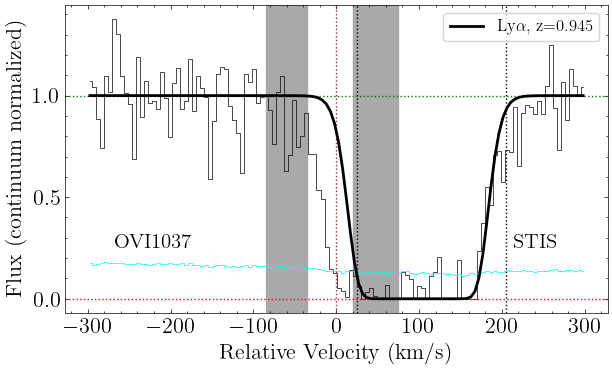

In [265]:
fig, ax = ovi_1037_stis.plot_ion_transition_spec()
ax.plot(ovi_1037_stis.v, hi_flux_interp, lw=2, label=r'Ly$\alpha$, z=0.945')
ax.axvline(v_clip_lo, color='black', linestyle=':')
ax.axvline(v_clip_hi, color='black', linestyle=':')

ax.legend()

In [266]:
idx = (ovi_1037_stis.v<v_clip_lo)|(ovi_1037_stis.v>v_clip_hi)
ovi_1037_stis.flux_norm[idx] = ovi_1037_stis.flux_norm[idx]/hi_flux_interp[idx]
ovi_1037_stis.flux_norm[~idx] = (1+ovi_1037_stis.flux_norm[~idx])/(1+hi_flux_interp[~idx])

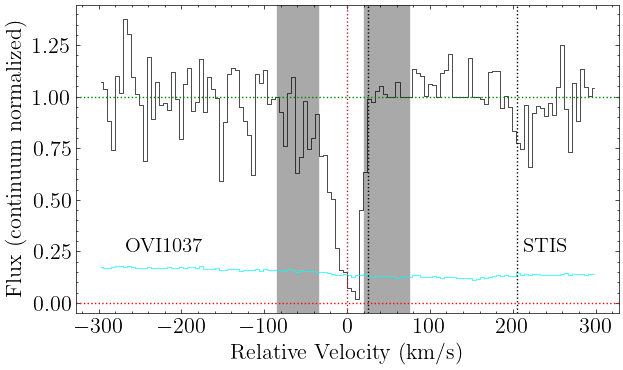

In [267]:
fig, ax = ovi_1037_stis.plot_ion_transition_spec()
ax.axvline(v_clip_lo, color='black', linestyle=':')
ax.axvline(v_clip_hi, color='black', linestyle=':')

In [268]:
ovi_1037_stis.get_EW_total(-20,75)

Integration window: [-20, 75]
EW, 1sig: 110, 9
EW-3sig: 28.301


In [269]:
ovi_1037_stis.grab_ion_transition_lsf(lsf_fits_list)

In [270]:
ovi_1037_stis.init_ion_transition(init_values = ovi_1031_stis.best_values, 
                               lsf_convolve = True)

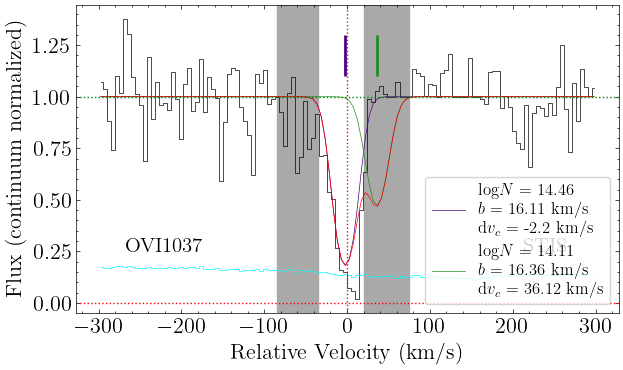

In [271]:
fig, ax = ovi_1037_stis.plot_ion_transition_init_fit()

In [272]:
ovi_1037_stis.fit_ion_transition()

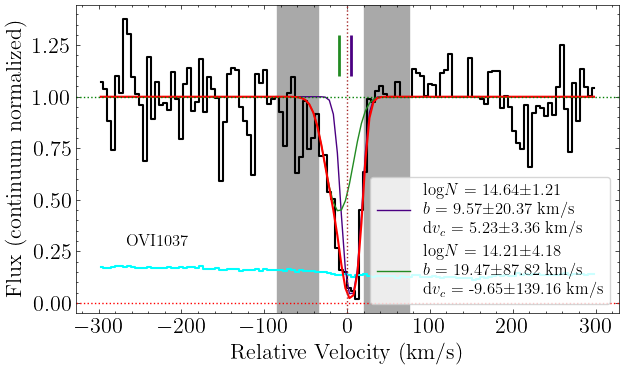

In [273]:
fig, ax = ovi_1037_stis.plot_ion_transition_best_fit()

## OVI ion

Now compile the OVI ion

In [274]:
ovi_init = ion(z_sys, 'OVI', [ovi_1031_stis, ovi_1037_stis_init])
ovi = ion(z_sys, 'OVI', [ovi_1031_stis, ovi_1037_stis])

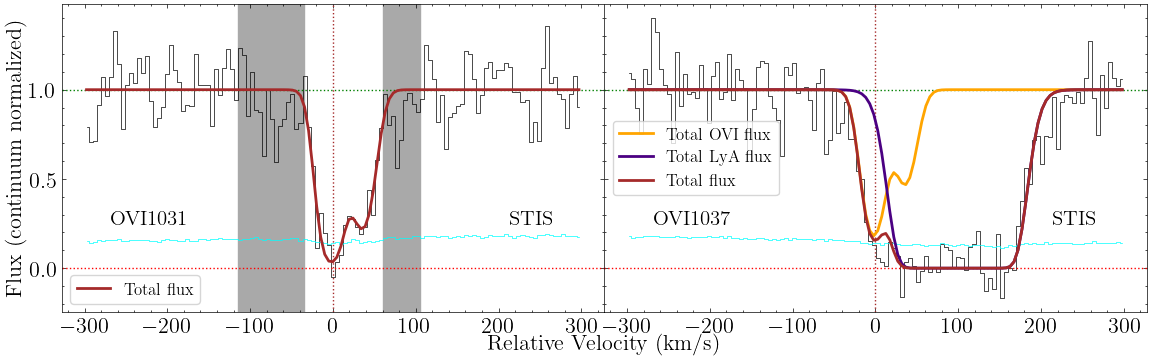

In [275]:
fig, axes = ovi_init.plot_ion()

axes[0].plot(ovi_1031_stis.v, ovi_1031_stis.best_total_flux, lw=2, color='brown', label='Total flux')
axes[0].legend()


axes[1].plot(ovi_1037_stis_init.v, ovi_1037_stis_init.init_total_flux, lw=2, color='orange', label='Total OVI flux')
axes[1].plot(ovi_1037_stis_init.v, hi_flux_interp, lw=2, color='indigo', label='Total LyA flux')
axes[1].plot(ovi_1037_stis_init.v, ovi_1037_stis_init.init_total_flux*hi_flux_interp, lw=2, color='brown', label='Total flux')

axes[1].legend()

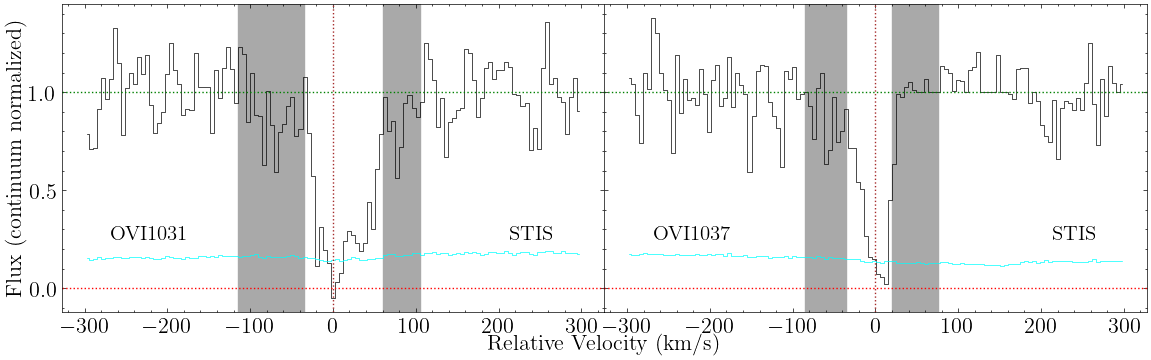

In [276]:
fig, axes = ovi.plot_ion()

In [277]:
ovi.init_ion([[[14.5, 13, 0],[14.1, 12, 40]],
              [[14.5, 13, 0],[14.1, 12, 40]],])
#ovi.init_ion(np.array([[14.7,21.,0.]]))
#ovi.init_ion(np.array(np.array([[13.61, 10, 0]])))

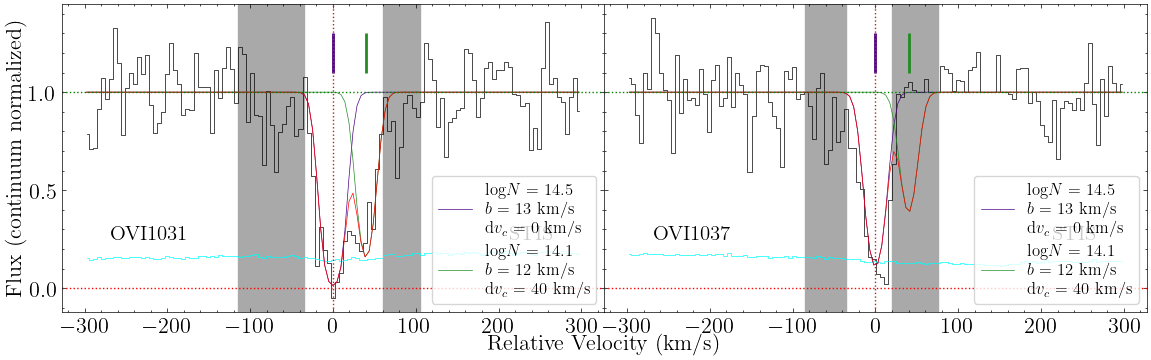

In [278]:
fig, axes = ovi.plot_ion_init_fit()

In [279]:
#ovi.fit_ion(exclude_models=['it1c1_dv_c > it1c2_dv_c', 'it1c1_logN < it1c2_logN'])

ovi.fit_ion(tie_params_list = [['it1c1_logN', 'it2c1_logN'],
                               ['it1c1_b', 'it2c1_b'],
                               ['it1c1_dv_c', 'it2c1_dv_c'],
                               ['it1c2_logN', 'it2c2_logN'],
                               ['it1c2_b', 'it2c2_b'],
                               ['it1c2_dv_c', 'it2c2_dv_c']],
           fix_params_list = ['it1c1_dv_c', 'it1c2_dv_c', 'it1c1_b', 'it1c2_b'],
           exclude_models = ['it1c1_logN < it1c2_logN'],)
           #lower_bounds_dict = {'it1c1_b': 12, 'it1c2_b': 4})

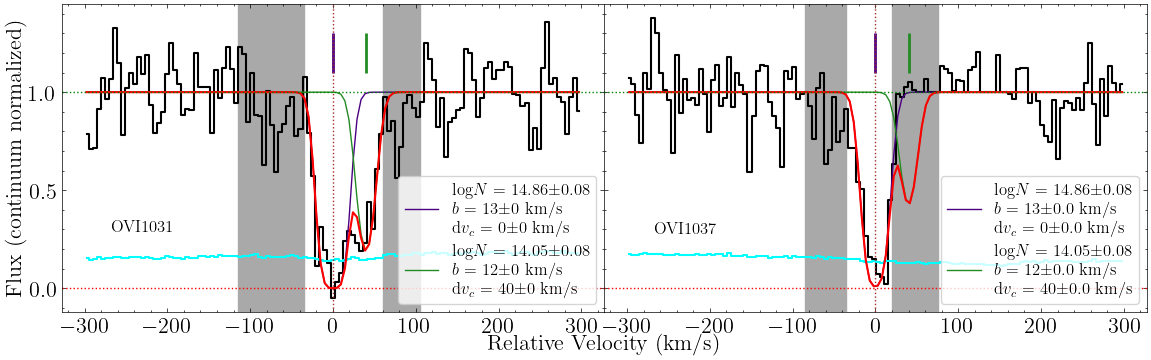

In [280]:
fig, axes = ovi.plot_ion_best_fit()

In [281]:
#ovi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-14, n_walkers=100, n_steps=2500)
#ovi.fit_ion_emcee(load=True, loaddir=rootdir)

In [282]:
#fig, axes = ovi.plot_samples()

In [283]:
#ovi.plot_corner()

In [284]:
#np.percentile(ov.result_emcee.flatchain['it1c1_logN'], 100*(1-cdf_3sig)), np.percentile(ov.result_emcee.flatchain['it1c2_logN'], 100*(1-cdf_3sig))

# NeV

## NeV 568 

Get NeV 568 from COS FUV

In [285]:
nev_568_fuv = ion_transition('NeV', 568, 'Ne', z_sys, 'COS FUV')

In [286]:
nev_568_fuv.grab_ion_transition_info(delta_v=-4.6)

In [287]:
nev_568_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-65,-30],[220,300]])

In [288]:
nev_568_fuv.cont_norm_flux(v_abs_range=[-65,80], degree=1)

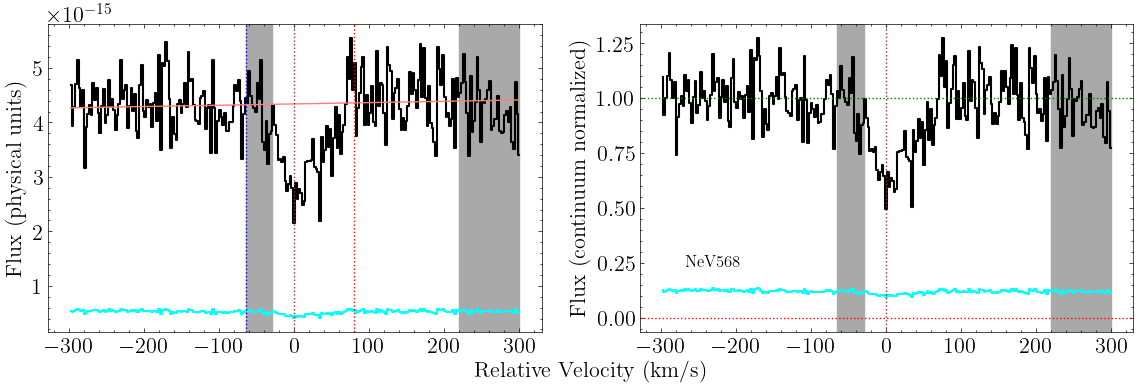

In [289]:
fig, ax = nev_568_fuv.plot_ion_transition_spec_cont()

In [290]:
nev_568_fuv.get_EW_total(-65,80)

Integration window: [-65, 80]
EW, 1sig: 44, 4
EW-3sig: 11.747


In [291]:
nev_568_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [292]:
nev_568_fuv.init_ion_transition(init_values = np.array([[14.2, 11.9, 0],[13.7, 11, 40]]), 
                             lsf_convolve = True)

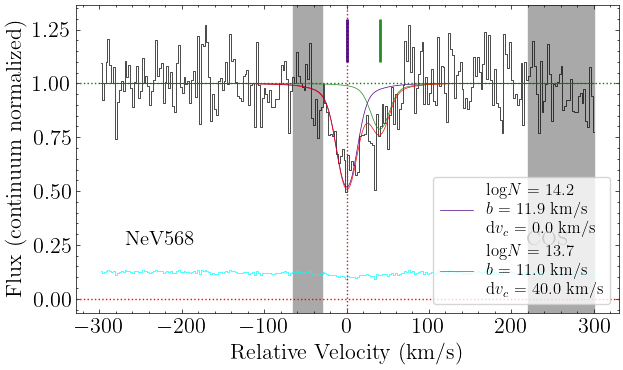

In [293]:
fig, ax = nev_568_fuv.plot_ion_transition_init_fit()

In [294]:
nev_568_fuv.fit_ion_transition()

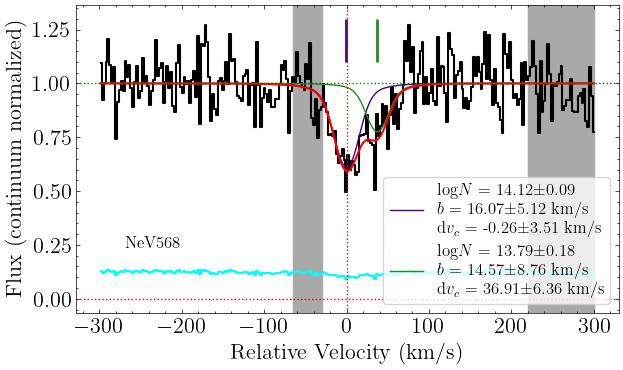

In [295]:
fig, ax = nev_568_fuv.plot_ion_transition_best_fit()

## NeV Ion

In [296]:
nev = ion(z_sys, 'NeV', [nev_568_fuv])

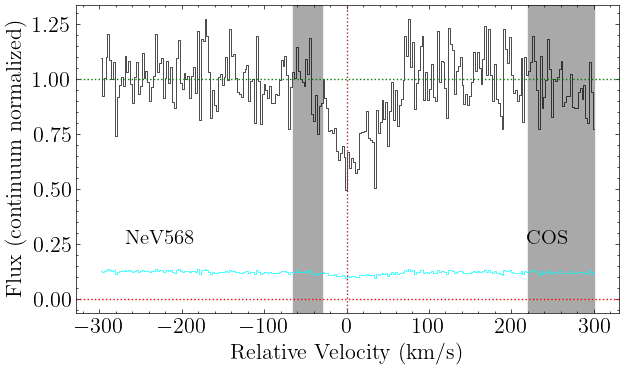

In [297]:
fig, axes = nev.plot_ion()

In [298]:
nev.init_ion([[[14.2, 11.9, 0],[13.7, 11, 40]]])

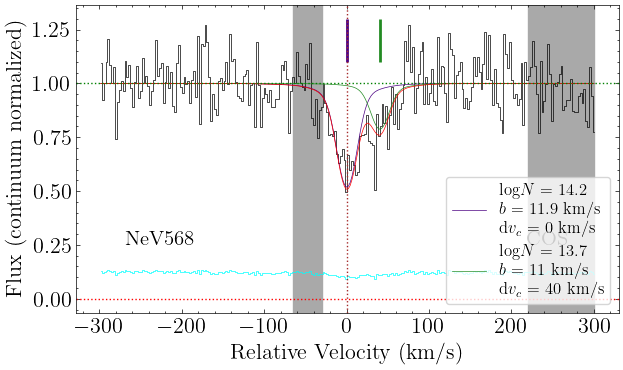

In [299]:
fig, axes = nev.plot_ion_init_fit()

In [300]:
nev.fit_ion(fix_params_list = ['it1c1_dv_c', 'it1c2_dv_c', 'it1c1_b', 'it1c2_b'],
           exclude_models = ['it1c1_logN < it1c2_logN'],
           upper_bounds_dict = {'it1c2_b':50})

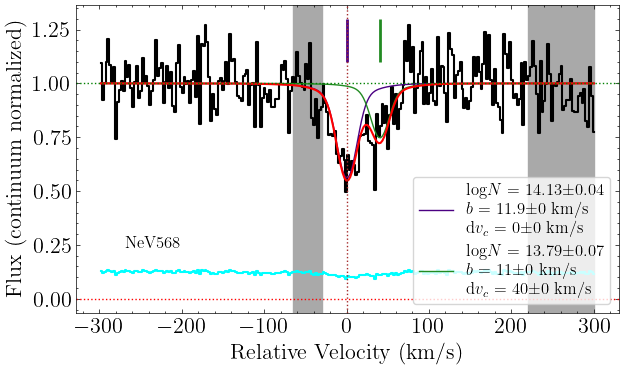

In [301]:
fig, axes = nev.plot_ion_best_fit()

In [302]:
#nev.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-8, n_walkers=100, n_steps=2500)
#nev.fit_ion_emcee(load=True, loaddir=rootdir)

In [303]:
#fig, axes = nev.plot_samples()

In [304]:
#nev.plot_corner()

# NeVI

## NeVI 558 
Get NeVI 558 from COS FUV

In [305]:
nevi_558_fuv = ion_transition('NeVI', 558, 'Ne', z_sys, 'COS FUV')

In [306]:
nevi_558_fuv.grab_ion_transition_info()

In [307]:
nevi_558_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-180,-20],[50,80]])

In [308]:
nevi_558_fuv.cont_norm_flux(v_abs_range=[-50,80], degree=1)

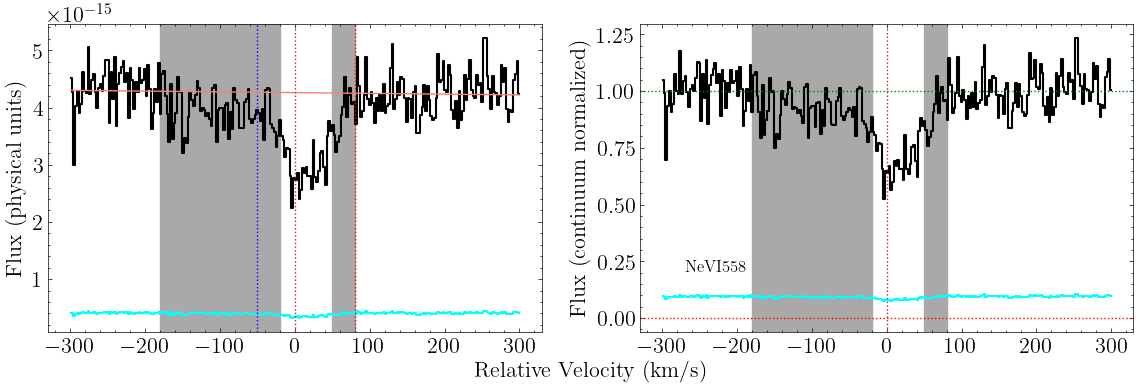

In [309]:
fig, ax = nevi_558_fuv.plot_ion_transition_spec_cont()

In [310]:
nevi_558_fuv.get_EW_total(-50,80)

Integration window: [-50, 80]
EW, 1sig: 49, 3
EW-3sig: 8.428


In [311]:
nevi_558_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [312]:
nevi_558_fuv.init_ion_transition(init_values = np.array([[14.1, 11.9, 0],[14.0, 11, 30]]), 
                             lsf_convolve = True)

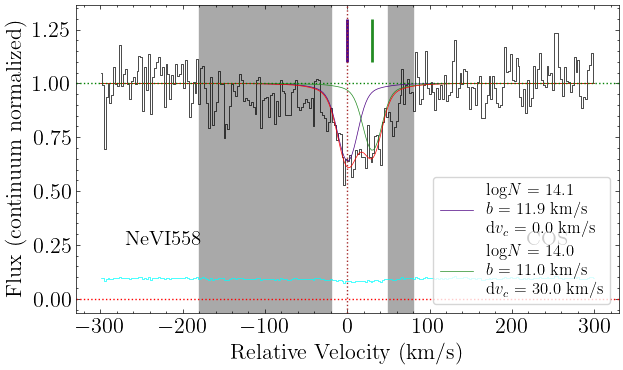

In [313]:
fig, ax = nevi_558_fuv.plot_ion_transition_init_fit()

In [314]:
nevi_558_fuv.fit_ion_transition()

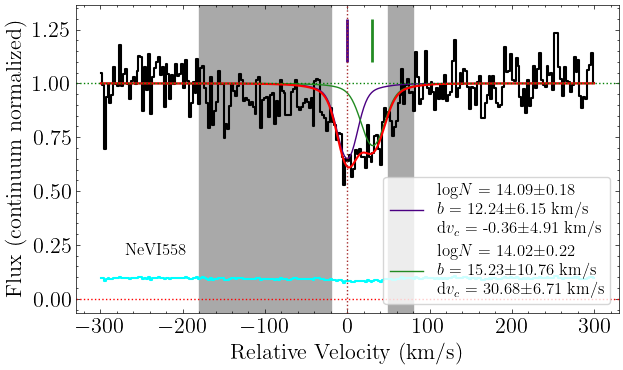

In [315]:
fig, ax = nevi_558_fuv.plot_ion_transition_best_fit()

## NeVI Ion

In [316]:
nevi = ion(z_sys, 'NeVI', [nevi_558_fuv])

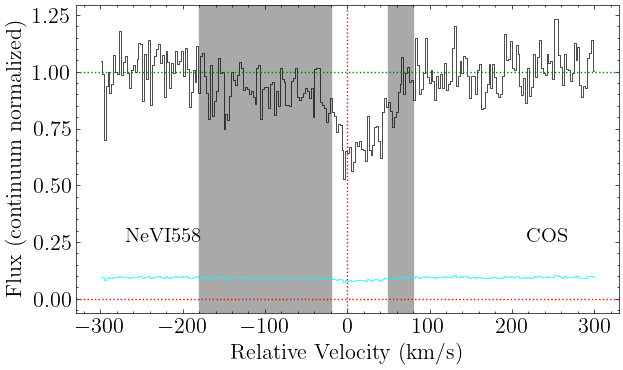

In [317]:
fig, axes = nevi.plot_ion()

In [318]:
nevi.init_ion([[[14.1, 11.9, 0], [13.9, 11, 40]]])

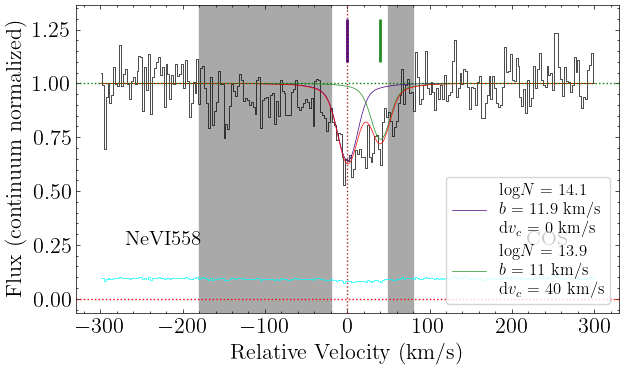

In [319]:
fig, axes = nevi.plot_ion_init_fit()

In [320]:
nevi.fit_ion(fix_params_list=['it1c1_dv_c', 'it1c2_dv_c', 'it1c1_b', 'it1c2_b'])

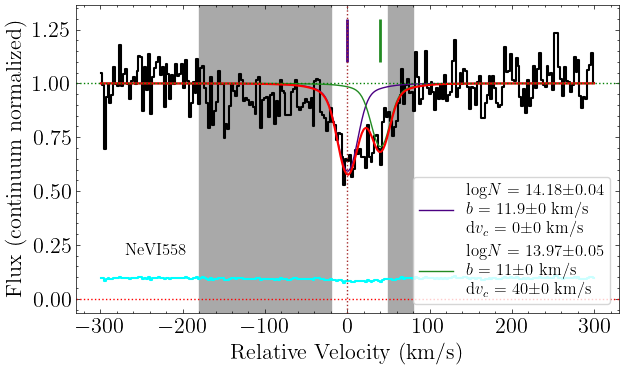

In [321]:
fig, axes = nevi.plot_ion_best_fit()

In [322]:
#nevi.fit_ion_emcee(loaddir=rootdir, scale_covar=1e-7, n_walkers=100, n_steps=2500)
#nevi.fit_ion_emcee(load=True, loaddir=rootdir)

In [323]:
#fig, axes = nevi.plot_samples()

In [324]:
#nevi.plot_corner()

# HI+NIV+OIII+OIV+OV+OVI+NeV+NeVI

In [325]:
hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi = ion_suite(z_sys, 'HI+CIII+CIV+NIV+OIII+OIV+OV+OVI+NeV+NeVI', 
                                              [hi, ciii, civ, niv, oiii, oiv, ov, ovi, nev, nevi])

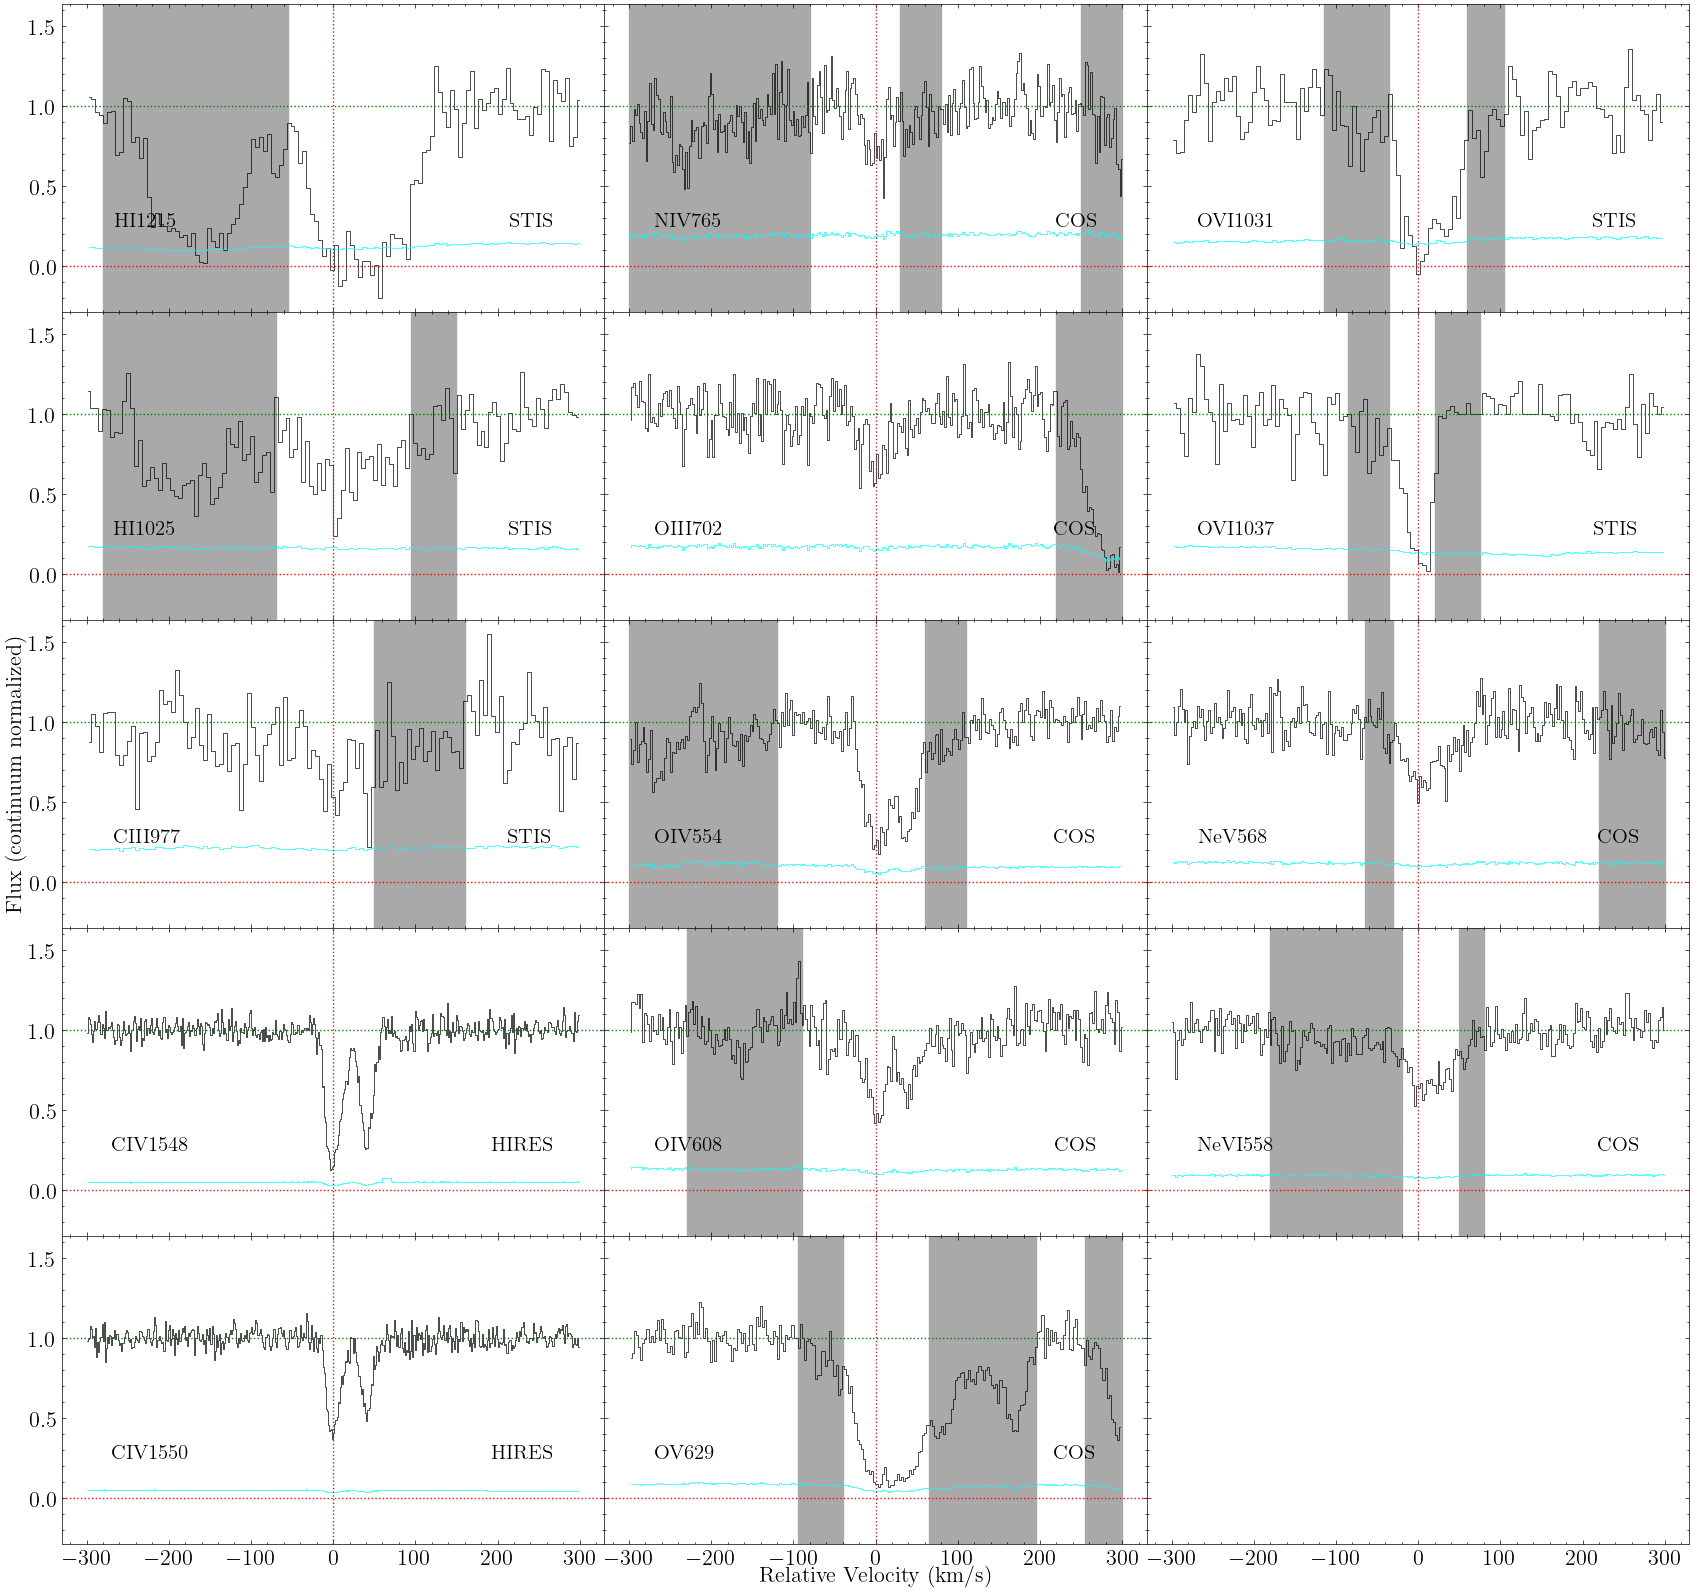

In [326]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.plot_ion_suite(n_cols=3)

In [327]:
hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.init_ion_suite([
    [[14.09, 25, 0], [13.99, 33, 39.9], [13.8, 27, 75]], # HI
    [[14.09, 25, 0], [13.99, 33, 39.9], [13.8, 27, 75]], 
    [[13.0, 11.1, 0], [12.9, 9.8, 39.9]], # CIII
    [[13.65, 11.1, 0], [13.41, 9.8, 39.9]], # CIV
    [[13.65, 11.1, 0], [13.41, 9.8, 39.9]], 
    [[13.1, 11, 0]], # NIV
    [[13.83, 13, 0]], # OIII
    [[14.39, 13, 0], [14.18, 12, 39.9]], # OIV
    [[14.39, 13, 0], [14.18, 12, 39.9]],
    [[14.9, 13, 0], [14.7, 12, 39.9]], # OV
    [[14.9, 13, 0], [14.1, 12, 39.9]], # OVI
    [[14.9, 13, 0], [14.1, 12, 39.9]],
    [[14.14, 13, 0], [13.80, 12, 39.9]],  # NeV
    [[14.19, 13, 0], [13.99, 12, 39.9]], # NeVI
])

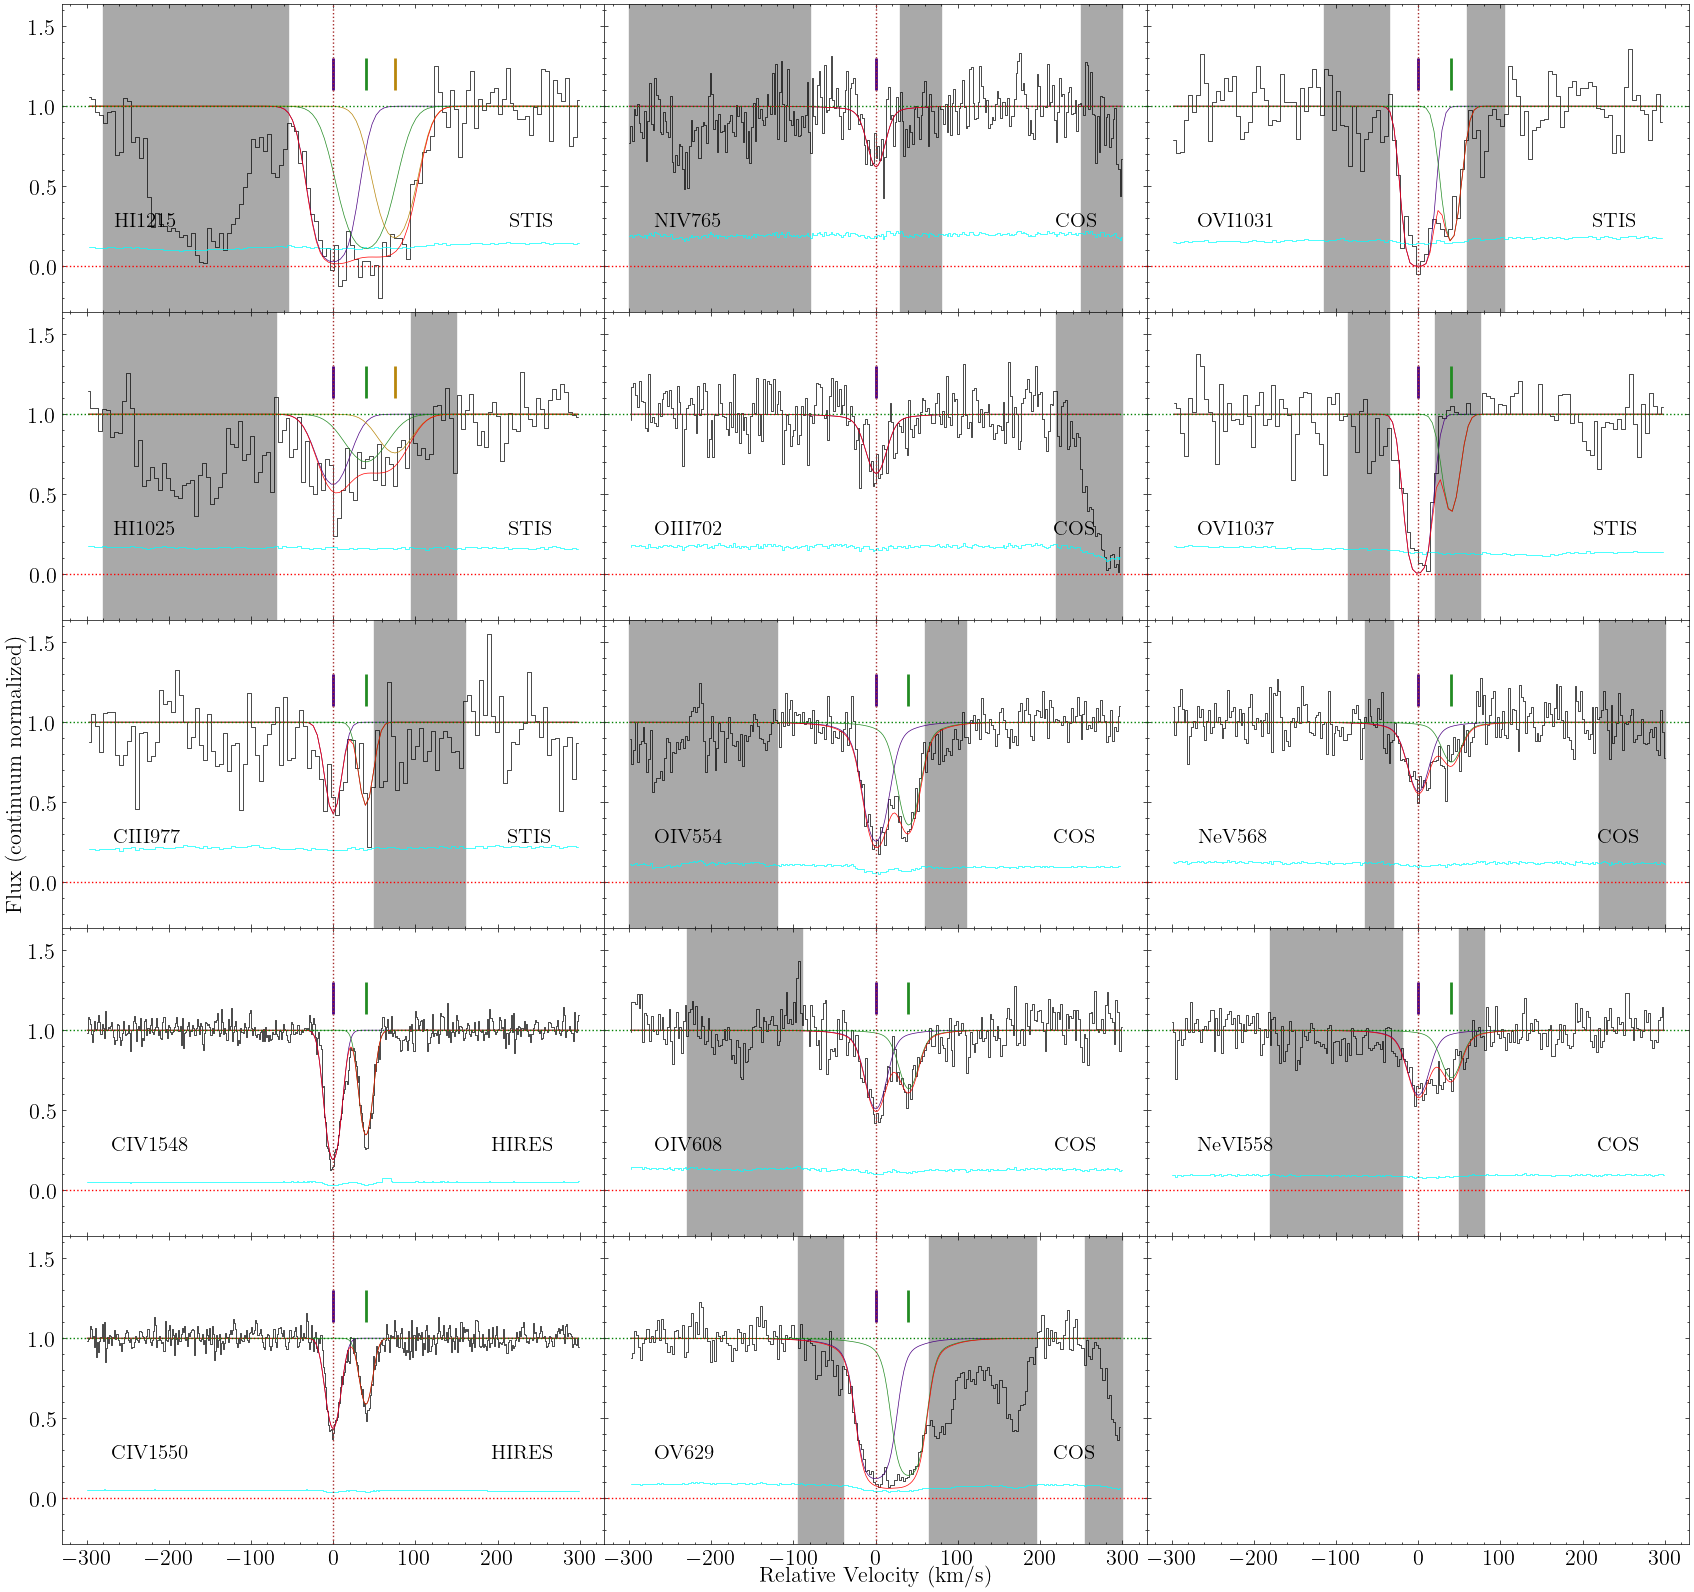

In [328]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.plot_ion_suite_init_fit(n_cols=3, legend=False)

In [329]:
hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.fit_ion_suite(tie_params_list = [
    ['it1c1_logN', 'it2c1_logN'], # Tie logN for HI component 1
    ['it1c2_logN', 'it2c2_logN'], # Tie logN for HI component 2  
    ['it1c3_logN', 'it2c3_logN'], # Tie logN for HI component 3, metal-free
    ['it1c1_b', 'it2c1_b'], # Tie b for HI component 1
    ['it1c2_b', 'it2c2_b'], # Tie b for HI component 2  
    ['it1c3_b', 'it2c3_b'], # Tie b for HI component 3, metal-free
    ['it1c3_dv_c', 'it2c3_dv_c'], # Tie dv_c for HI component 3
    ['it4c1_logN', 'it5c1_logN'], # Tie logN for CIV component 1
    ['it4c2_logN', 'it5c2_logN'], # Tie logN for CIV component 2
    ['it3c1_b', 'it4c1_b'], # Tie b for CIII component 1, CIV component 1
    ['it3c1_b', 'it5c1_b'], 
    ['it3c2_b', 'it4c2_b'], # Tie b for CIII component 2, CIV component 2
    ['it3c2_b', 'it5c2_b'], 
    ['it8c1_logN', 'it9c1_logN'], # Tie logN for OIV component 1
    ['it8c2_logN', 'it9c2_logN'], # Tie logN for OIV component 2
    ['it11c1_logN', 'it12c1_logN'], # Tie logN for OVI component 1
    ['it11c2_logN', 'it12c2_logN'], # Tie logN for OVI component 2
    ['it7c1_b', 'it8c1_b'], # Tie b for component 1, OIII, OIV
    ['it7c1_b', 'it9c1_b'],
    ['it7c1_b', 'it10c1_b'],
    ['it7c1_b', 'it11c1_b'],
    ['it7c1_b', 'it12c1_b'],
    ['it7c1_b', 'it13c1_b'],
    ['it7c1_b', 'it14c1_b'],
    ['it8c2_b', 'it9c2_b'], # Tie b for component 2, OIV
    ['it8c2_b', 'it10c2_b'],
    ['it8c2_b', 'it11c2_b'],
    ['it8c2_b', 'it12c2_b'],
    ['it8c2_b', 'it13c2_b'],
    ['it8c2_b', 'it14c2_b'],
    ['it1c1_dv_c', 'it2c1_dv_c'], # Tie dv_c for HI, NIV, CIII, CIV, OIII, OIV, OV, OVI, NeV, NeVI
    ['it1c1_dv_c', 'it3c1_dv_c'],
    ['it1c1_dv_c', 'it4c1_dv_c'],
    ['it1c1_dv_c', 'it5c1_dv_c'],
    ['it1c1_dv_c', 'it6c1_dv_c'],
    ['it1c1_dv_c', 'it7c1_dv_c'],
    ['it1c1_dv_c', 'it8c1_dv_c'],
    ['it1c1_dv_c', 'it9c1_dv_c'],
    ['it1c1_dv_c', 'it10c1_dv_c'],
    ['it1c1_dv_c', 'it11c1_dv_c'],
    ['it1c1_dv_c', 'it12c1_dv_c'],
    ['it1c1_dv_c', 'it13c1_dv_c'],
    ['it1c1_dv_c', 'it14c1_dv_c'],
    ['it1c2_dv_c', 'it2c2_dv_c'], # Tie dv_c for HI, NIV, CIII, CIV, OIII, OIV, NeV, NeVI, SVI component 2
    ['it1c2_dv_c', 'it3c2_dv_c'],
    ['it1c2_dv_c', 'it4c2_dv_c'],
    ['it1c2_dv_c', 'it5c2_dv_c'],
    ['it1c2_dv_c', 'it8c2_dv_c'],
    ['it1c2_dv_c', 'it9c2_dv_c'],
    ['it1c2_dv_c', 'it10c2_dv_c'],
    ['it1c2_dv_c', 'it11c2_dv_c'],
    ['it1c2_dv_c', 'it12c2_dv_c'],
    ['it1c2_dv_c', 'it13c2_dv_c'],
    ['it1c2_dv_c', 'it14c2_dv_c'],
],
    lower_bounds_dict = {'it3c1_b': 3.7, # CIII
                        'it6c1_b': 4, # NIV
                        'it10c1_b': 12, # OV/OVI
                        'it10c2_b': 4},
    upper_bounds_dict = {'it6c1_b': 40, # NIV
                         'it13c2_b': 50}, # NeV
    exclude_models=['it1c2_logN < it1c3_logN', # c1 > c2 > c3 for HI
                    'it1c1_logN < it1c2_logN',
                    #'it10c1_b < it10c2_b', # OV c1 broader
                    #'it13c1_b < it13c2_b', # NeV c1 broader
                    'it11c1_logN < it11c2_logN', # OVI c1 stronger
                    'it13c1_logN < it13c2_logN', # NeV c1 stronger
                   ]                                 )

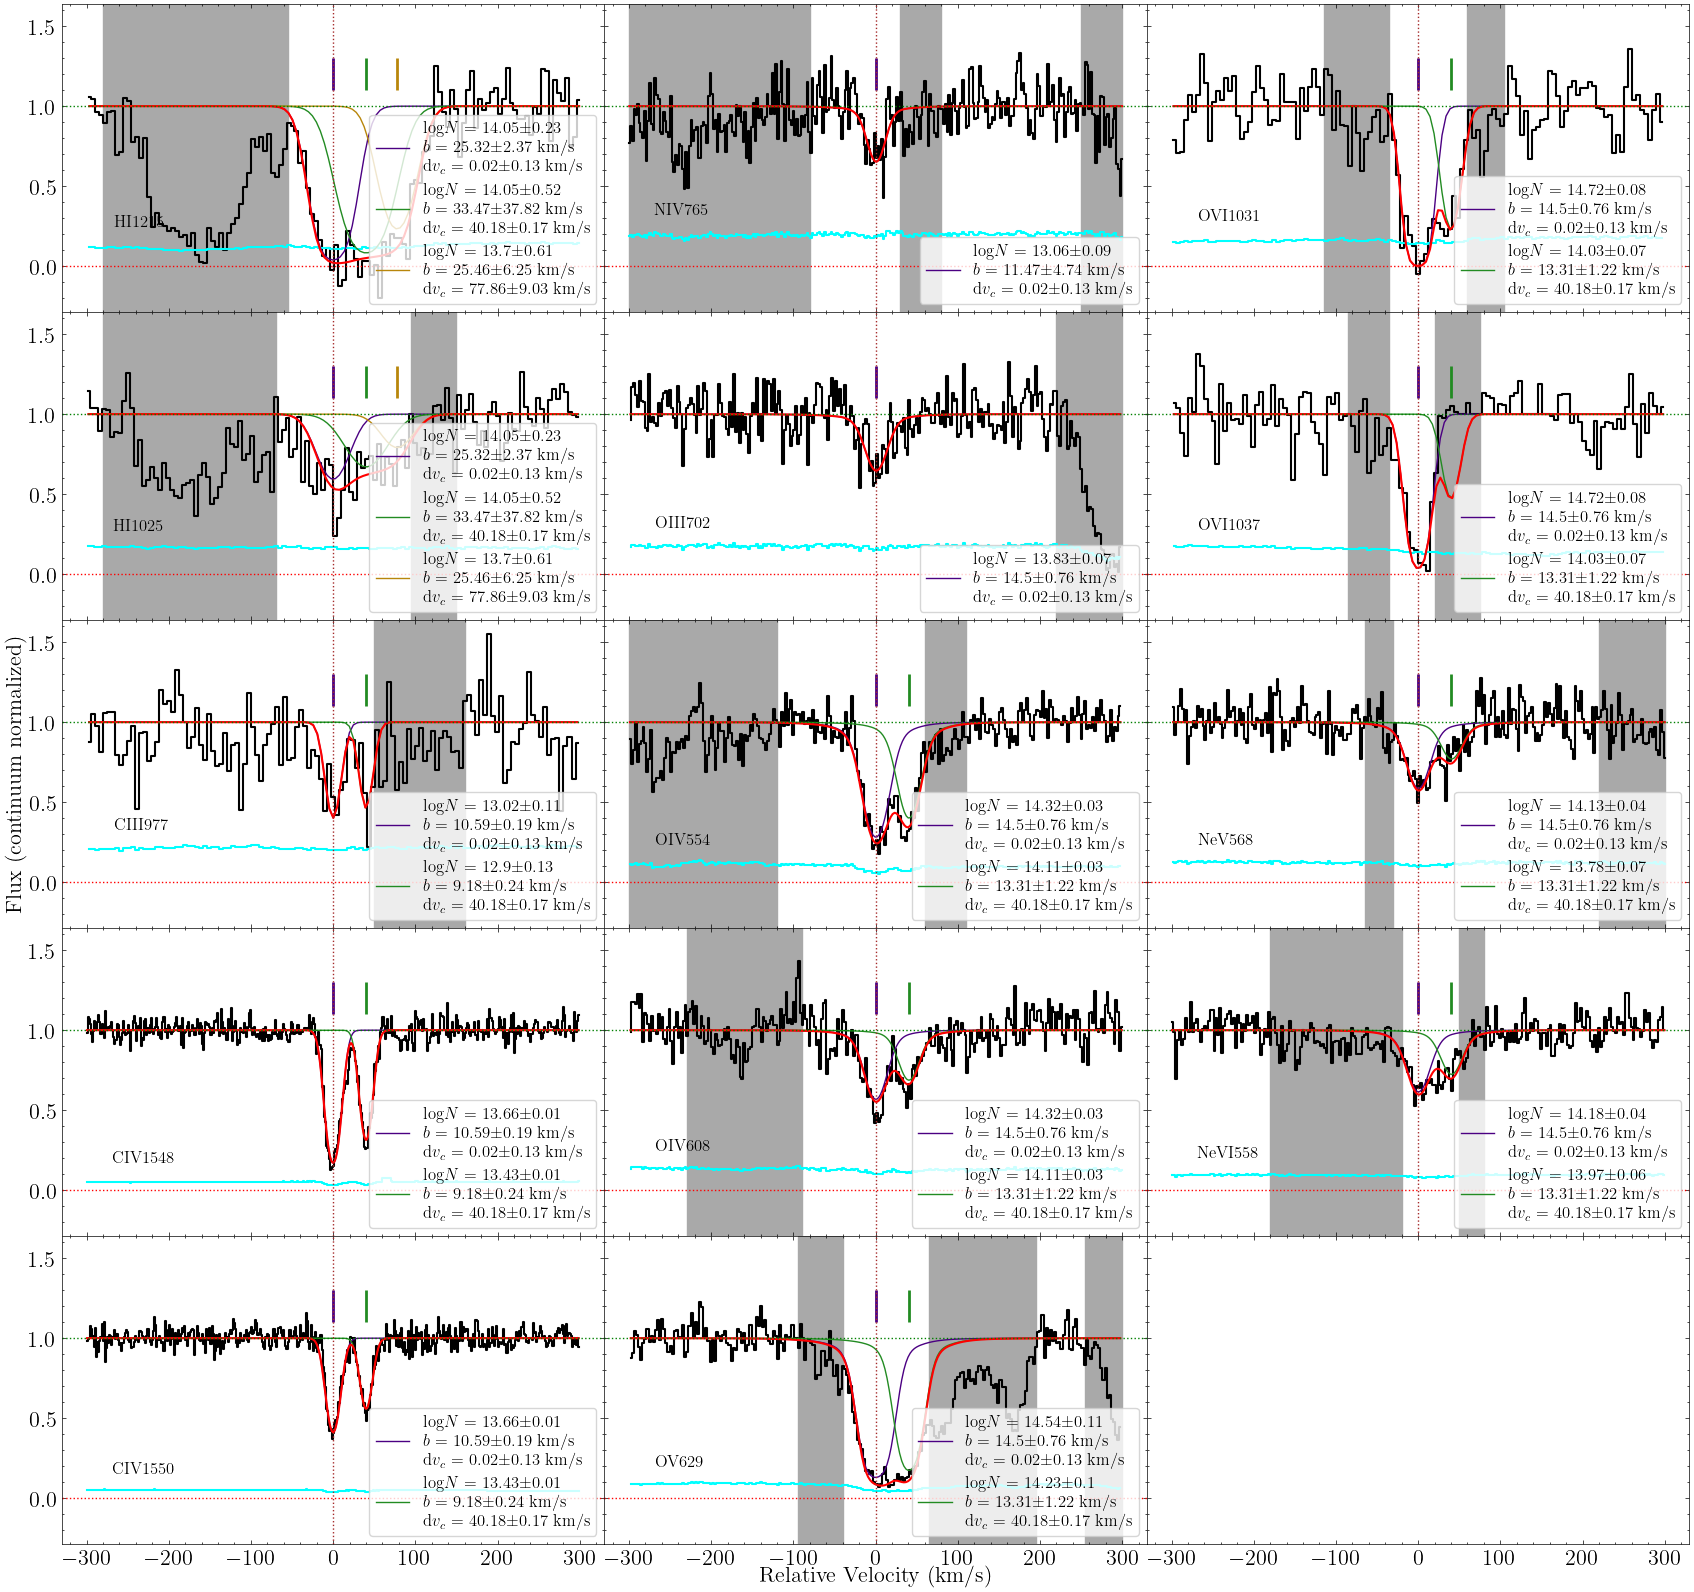

In [330]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.plot_ion_suite_best_fit(n_cols=3, legend=True)

In [331]:
len(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result.var_names)

30

In [332]:
#hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result.var_names

In [ ]:
hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.fit_ion_suite_emcee(loaddir=rootdir, n_walkers=200, scale_covar=1e-18, n_steps=5000)
#hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.fit_ion_suite_emcee(load=True, loaddir=rootdir)

  0%|                                        | 4/5000 [00:09<3:08:52,  2.27s/it]

In [ ]:
fig, axes = hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.plot_samples(n_cols=3)

In [ ]:
hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.plot_corner()

In [348]:
np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it1c1_dv_c'], 100*cdf_1sig)-np.median(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it1c1_dv_c'])

0.14959755424505466

In [349]:
np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it10c1_logN'], 100*(1-cdf_3sig)), np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it10c2_logN'], 100*(1-cdf_3sig))

(14.438403651921776, 14.137422587209109)

In [350]:
np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it11c1_logN'], 100*(1-cdf_3sig)), np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it11c2_logN'], 100*(1-cdf_3sig))

(14.555129259380363, 13.828569839336582)

In [351]:
np.median(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it3c2_logN'])-np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it3c2_logN'], 100*(1-cdf_1sig))

0.15205796141983008

In [352]:
np.median(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it1c1_dv_c'])-np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it1c1_dv_c'], 100*(1-cdf_1sig))

0.14180714906061243

In [353]:
np.median(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it3c1_logN'])-np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it3c1_logN'], 100*(1-cdf_1sig))

0.1274580167625512

In [354]:
np.percentile(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it10c1_logN'], 100*cdf_1sig)-np.median(hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi.result_emcee.flatchain['it10c1_logN'])

0.23855443185452074

# Summary List
Now compile a summary list

In [355]:
summary = ion_summary([hi_ciii_civ_niv_oiii_oiv_ov_ovi_nev_nevi])

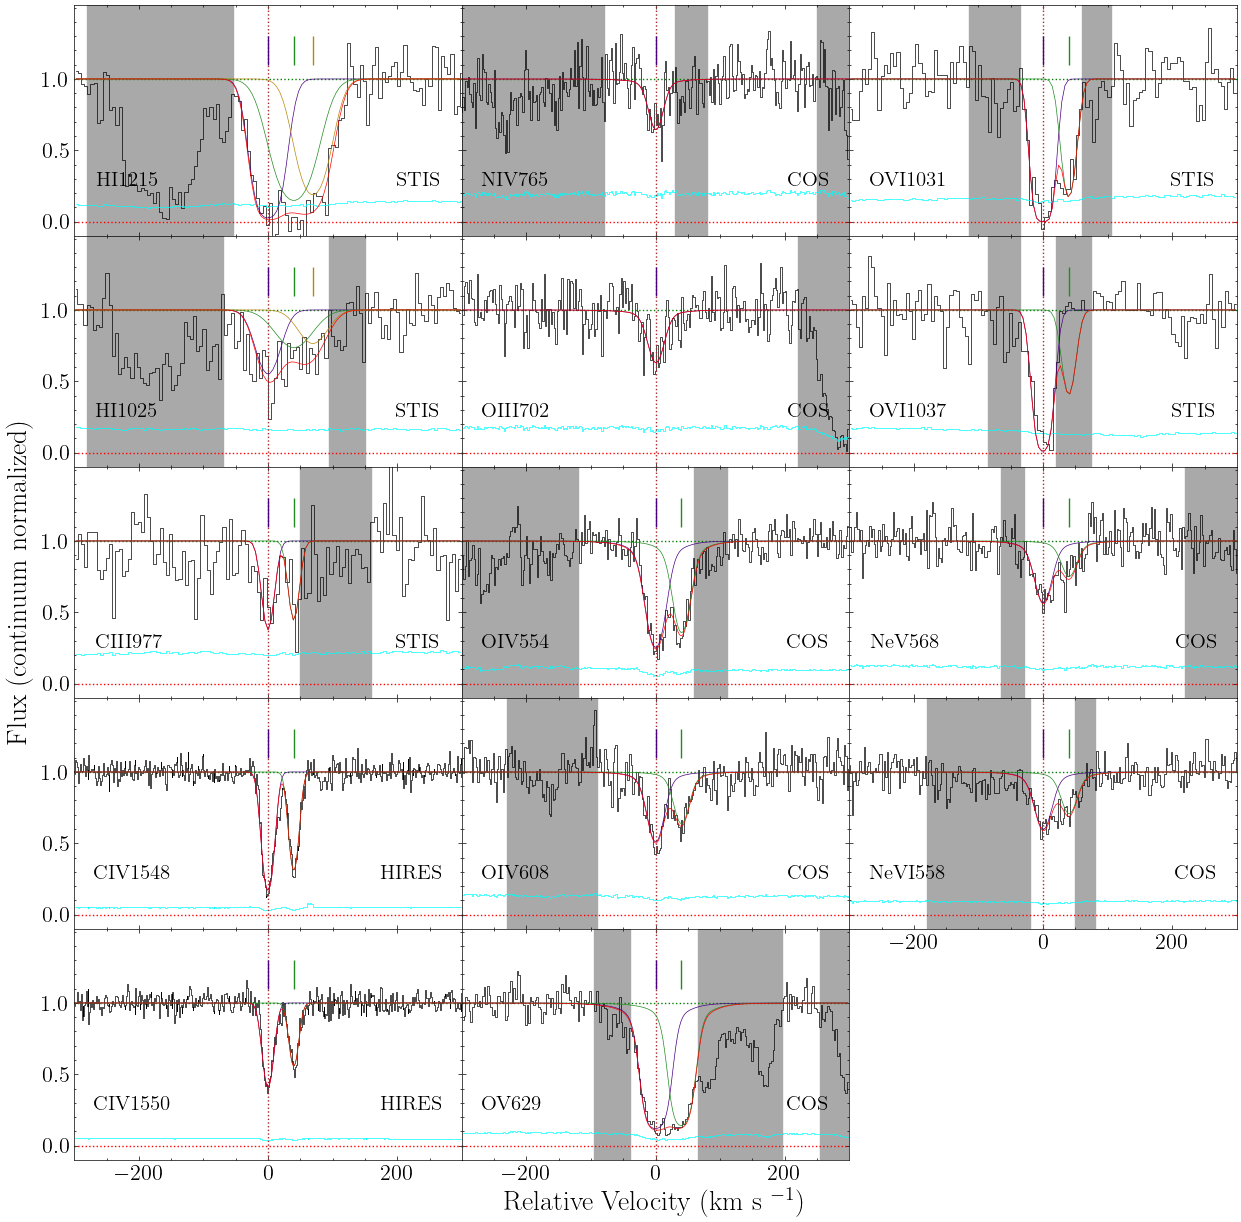

In [356]:
fig, axes = plt.subplots(5, 3, figsize=(5*3, 3*5), sharex=True, sharey=True)

summary.plot_samples(fig=fig, axes=axes, n_cols=3)

axes[0,0].set_ylim(-0.1,1.52)
axes[0,0].set_xlim(-299.9,299.9)
axes[0,0].set_yticks([0,0.5,1])

axes[4,2].axis('off')
axes[3,2].xaxis.set_tick_params(which='both', labelbottom=True)
#axes[3,2].set_xticks([-200,-100,0,100,200])

#plt.savefig(rootdir+'Ions/z={}/z={}_vp.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

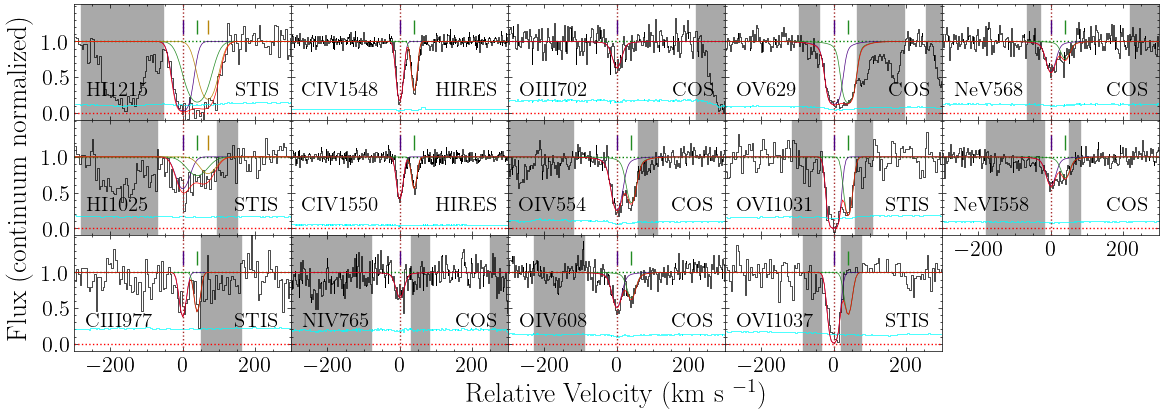

In [357]:
fig, axes = plt.subplots(3, 5, figsize=(5*2.8, 3*1.5), sharex=True, sharey=True)

summary.plot_samples(fig=fig, axes=axes, n_cols=5)

axes[0,0].set_ylim(-0.1,1.52)
axes[0,0].set_xlim(-299.9,299.9)
axes[0,0].set_yticks([0,0.5,1])

axes[2,4].axis('off')
axes[1,4].xaxis.set_tick_params(which='both', labelbottom=True)

plt.savefig(rootdir+'Ions/z={}/z={}_vp_alt.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

In [358]:
summary.print_summary()

HI1215
dv_c = -0.0 \pm 0.1, logN = 14.08 \pm 0.07, b = 23.9 \pm 2.6
dv_c = 39.9 \pm 0.2, logN = 13.99 \pm 0.07, b = 37.8_{-10.0}^{+10.4}
dv_c = 69.3_{-9.1}^{+7.7}, logN = 13.83 \pm 0.11, b = 29.7_{-5.2}^{+6.2}
HI1025
dv_c = -0.0 \pm 0.1, logN = 14.08 \pm 0.07, b = 23.9 \pm 2.6
dv_c = 39.9 \pm 0.2, logN = 13.99 \pm 0.07, b = 37.8_{-10.0}^{+10.4}
dv_c = 69.3_{-9.1}^{+7.7}, logN = 13.83 \pm 0.11, b = 29.7_{-5.2}^{+6.2}
CIII977
dv_c = -0.0 \pm 0.1, logN = 13.05 \pm 0.13, b = 10.6 \pm 0.2
dv_c = 39.9 \pm 0.2, logN = 12.93 \pm 0.15, b = 9.2 \pm 0.3
CIV1548
dv_c = -0.0 \pm 0.1, logN = 13.66 \pm 0.01, b = 10.6 \pm 0.2
dv_c = 39.9 \pm 0.2, logN = 13.43 \pm 0.01, b = 9.2 \pm 0.3
CIV1550
dv_c = -0.0 \pm 0.1, logN = 13.66 \pm 0.01, b = 10.6 \pm 0.2
dv_c = 39.9 \pm 0.2, logN = 13.43 \pm 0.01, b = 9.2 \pm 0.3
NIV765
dv_c = -0.0 \pm 0.1, logN = 13.08 \pm 0.10, b = 11.9_{-4.4}^{+5.7}
OIII702
dv_c = -0.0 \pm 0.1, logN = 13.84 \pm 0.08, b = 13.3 \pm 1.0
OIV554
dv_c = -0.0 \pm 0.1, logN = 14.39 \pm 0.04,

# Paper plot

In [327]:
ciii_977_stis.init_values

[[13.0, 11.1, 0], [12.9, 9.8, 39.9]]

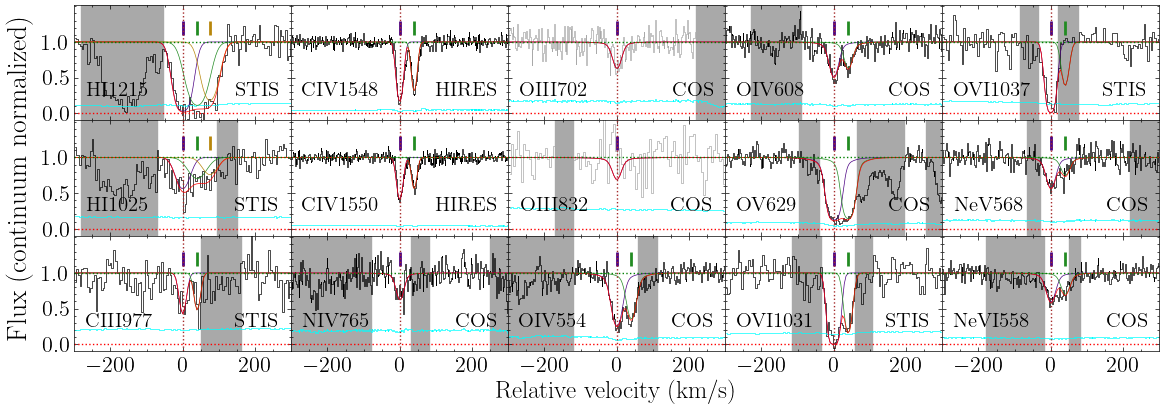

In [328]:
fig, axes = plt.subplots(3, 5, figsize=(5*2.8, 3*1.5), sharex=True, sharey=True)

#summary.plot_samples(fig=fig, axes=axes, n_cols=5)

hi_1215_stis.plot_ion_transition_init_fit(fig, axes[0,0], legend=False, label_axes=False)
hi_1025_stis.plot_ion_transition_init_fit(fig, axes[1,0], legend=False, label_axes=False)
ciii_977_stis.plot_ion_transition_init_fit(fig, axes[2,0], legend=False, label_axes=False)

civ_1548_hires.plot_ion_transition_init_fit(fig, axes[0,1], legend=False, label_axes=False)
civ_1550_hires.plot_ion_transition_init_fit(fig, axes[1,1], legend=False, label_axes=False)
niv_765_fuv.plot_ion_transition_init_fit(fig, axes[2,1], legend=False, label_axes=False)


oiii_702_fuv.plot_ion_transition_init_fit(fig, axes[0,2], legend=False, label_axes=False, flux_color='darkgrey')
oiii_832_nuv.plot_ion_transition_init_fit(fig, axes[1,2], legend=False, label_axes=False, flux_color='darkgrey')
oiv_554_fuv.plot_ion_transition_init_fit(fig, axes[2,2], legend=False, label_axes=False)

oiv_608_fuv.plot_ion_transition_init_fit(fig, axes[0,3], legend=False, label_axes=False)
ov_629_fuv.plot_ion_transition_init_fit(fig, axes[1,3], legend=False, label_axes=False)
ovi_1031_stis.plot_ion_transition_init_fit(fig, axes[2,3], legend=False, label_axes=False)

ovi_1037_stis.plot_ion_transition_init_fit(fig, axes[0,4], legend=False, label_axes=False)
nev_568_fuv.plot_ion_transition_init_fit(fig, axes[1,4], legend=False, label_axes=False)
nevi_558_fuv.plot_ion_transition_init_fit(fig, axes[2,4], legend=False, label_axes=False)

axes[0,0].set_ylim(-0.1,1.52)
axes[0,0].set_xlim(-299.9,299.9)
axes[0,0].set_yticks([0,0.5,1])

ax_label = fig.add_subplot(111, frameon=False)
ax_label.set_xticks([])
ax_label.set_yticks([])

plt.subplots_adjust(wspace=0, hspace=0)

ax_label.set_xlabel('Relative velocity (km/s)', labelpad=20, fontsize=18)
ax_label.set_ylabel('Flux (continuum normalized)', labelpad=30, fontsize=20)

#ax_label.set_title('Two-phase PIE model for a warm-hot absorber', y=1.07, fontsize=19)

plt.savefig(rootdir+'Ions/z={}/z={}_vp_alt.pdf'.format(str(z_sys), str(z_sys).replace('.', '_')), dpi=300)

# HeI

## HeI 584

In [346]:
hei_584_fuv = ion_transition('HeI', 584, 'He', z_sys, 'COS FUV')

In [347]:
hei_584_fuv.grab_ion_transition_info()

In [348]:
hei_584_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[100,300]])

In [349]:
hei_584_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

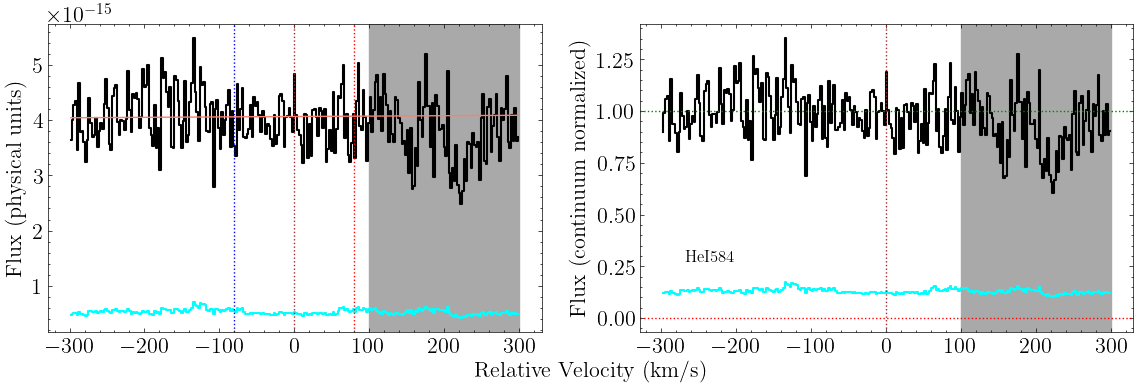

In [350]:
fig, ax = hei_584_fuv.plot_ion_transition_spec_cont()

In [351]:
hei_584_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [352]:
hei_584_fuv.get_upper_lim(20)

logN-1sig: 12.7
logN-2sig: 12.9
logN-3sig: 13.1


In [353]:
hei_584_fuv.get_upper_lim_data(20,0)

logN-1sig: 13.0
logN-2sig: 13.1
logN-3sig: 13.2


## HeI 537

In [354]:
hei_537_fuv = ion_transition('HeI', 537, 'He', z_sys, 'COS FUV')

In [355]:
hei_537_fuv.grab_ion_transition_info()

In [356]:
hei_537_fuv.grab_ion_transition_spec(spec_fits_list)

In [357]:
hei_537_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

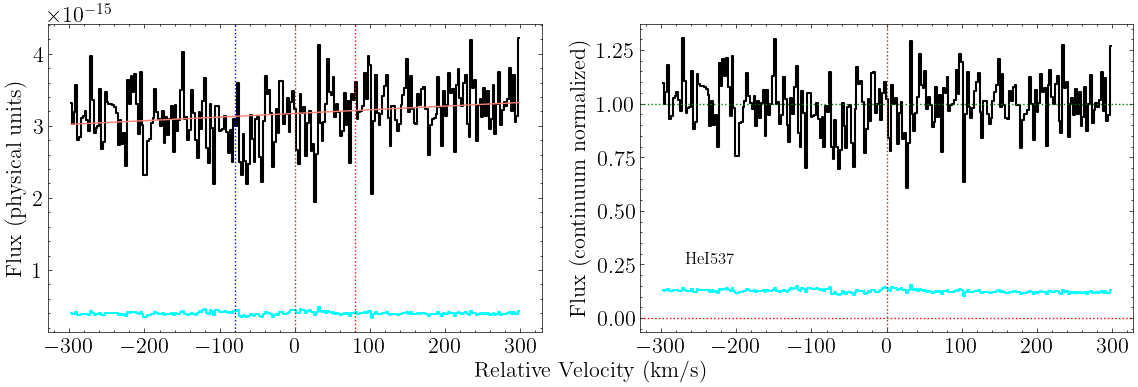

In [358]:
fig, ax = hei_537_fuv.plot_ion_transition_spec_cont()

In [359]:
hei_537_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [360]:
hei_537_fuv.get_upper_lim(20)

logN-1sig: 13.3
logN-2sig: 13.6
logN-3sig: 13.7


# CII

## CII 903.9 (NUV)

In [361]:
cii_904_nuv = ion_transition('CII', 903.9, 'C', z_sys, 'COS NUV')

In [362]:
cii_904_nuv.grab_ion_transition_info()

In [363]:
cii_904_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-110], [120,200]])

In [364]:
cii_904_nuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

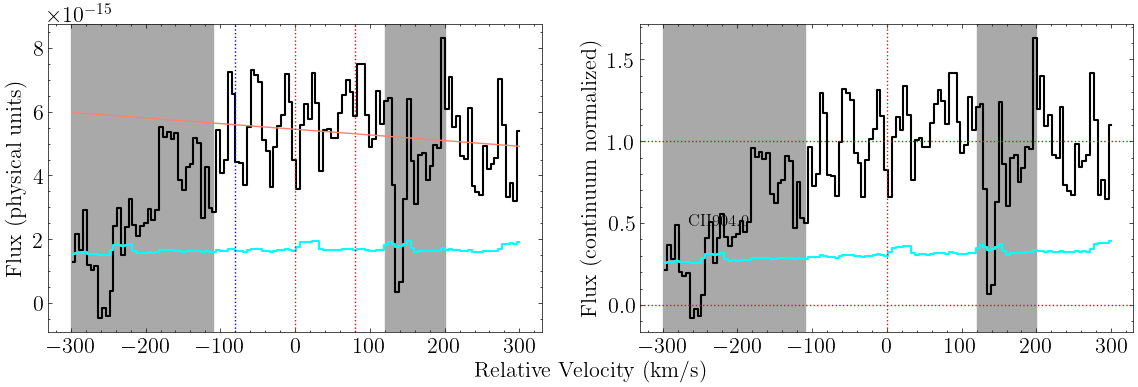

In [365]:
fig, ax = cii_904_nuv.plot_ion_transition_spec_cont()

In [366]:
cii_904_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [367]:
cii_904_nuv.get_upper_lim(10)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.6


## CII 903.6 (NUV)

In [368]:
cii_903_nuv = ion_transition('CII', 903.6, 'C', z_sys, 'COS NUV')

In [369]:
cii_903_nuv.grab_ion_transition_info()

In [370]:
cii_903_nuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-70], [220,300]])

In [371]:
cii_903_nuv.cont_norm_flux(v_abs_range=[-60,80], degree=1)

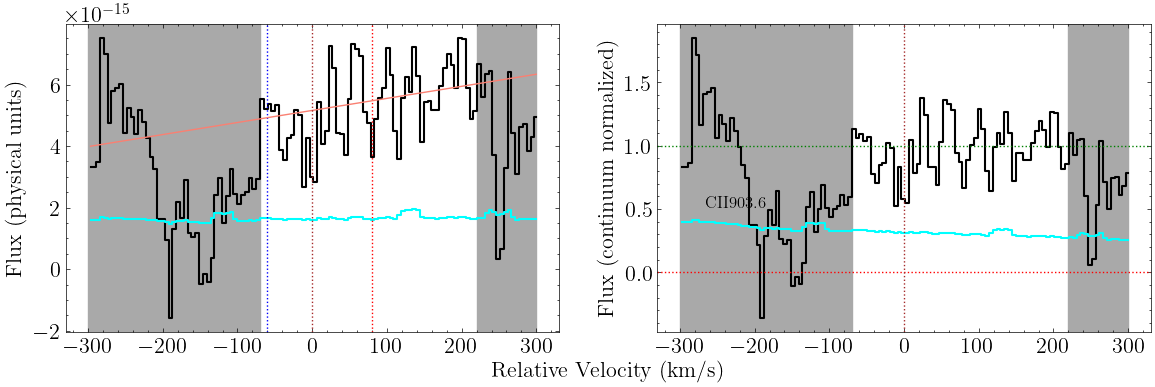

In [372]:
fig, ax = cii_903_nuv.plot_ion_transition_spec_cont()

In [373]:
cii_903_nuv.grab_ion_transition_lsf(lsf_fits_list)

In [374]:
cii_903_nuv.get_upper_lim(10)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.9


## CII 1036 (STIS)

In [375]:
cii_1036_stis = ion_transition('CII', 1036, 'C', z_sys, 'STIS')

In [376]:
cii_1036_stis.grab_ion_transition_info()

In [377]:
cii_1036_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-110]])

In [378]:
cii_1036_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

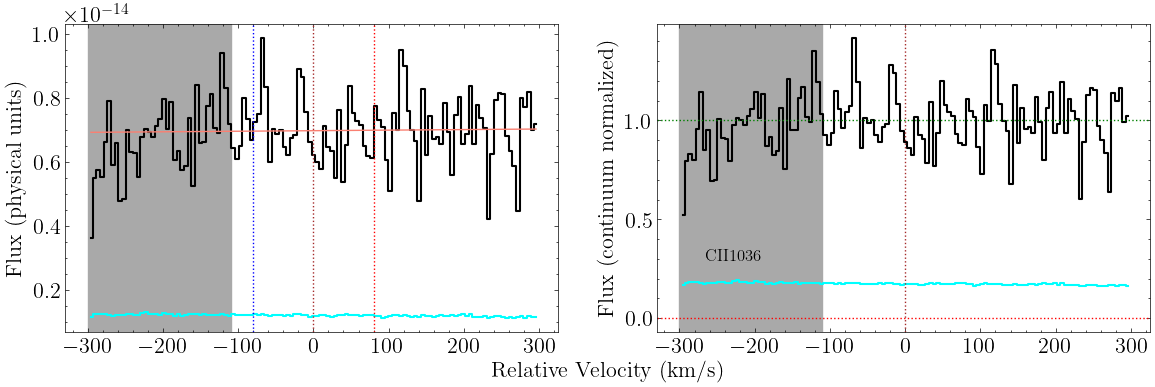

In [379]:
fig, ax = cii_1036_stis.plot_ion_transition_spec_cont()

In [380]:
cii_1036_stis.grab_ion_transition_lsf(lsf_fits_list)

In [381]:
cii_1036_stis.get_upper_lim(10)

logN-1sig: 12.9
logN-2sig: 13.2
logN-3sig: 13.4


In [382]:
cii_1036_stis.get_upper_lim_data(10,0)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


# CIII (re: c2-upper limit)

## CIII 977 (STIS)

In [383]:
ciii_977_stis = ion_transition('CIII', 977, 'C', z_sys, 'STIS')

In [384]:
ciii_977_stis.grab_ion_transition_info()

In [385]:
ciii_977_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-220,-170],[150,220]])

In [386]:
ciii_977_stis.cont_norm_flux(v_abs_range=[-35,100], degree=1)

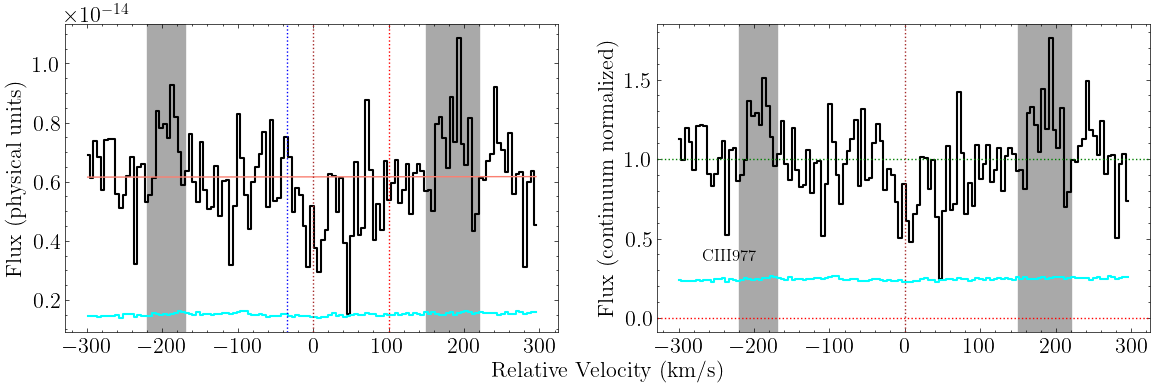

In [387]:
fig, ax = ciii_977_stis.plot_ion_transition_spec_cont()

In [388]:
ciii_977_stis.grab_ion_transition_lsf(lsf_fits_list)

In [389]:
ciii_977_stis.get_upper_lim(10)

logN-1sig: 12.3
logN-2sig: 12.6
logN-3sig: 12.7


# NII

## NII 1083 (STIS)

In [390]:
nii_1083_stis = ion_transition('NII', 1036, 'N', z_sys, 'STIS')

In [391]:
nii_1083_stis.grab_ion_transition_info()

In [392]:
nii_1083_stis.grab_ion_transition_spec(spec_fits_list)

In [393]:
nii_1083_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

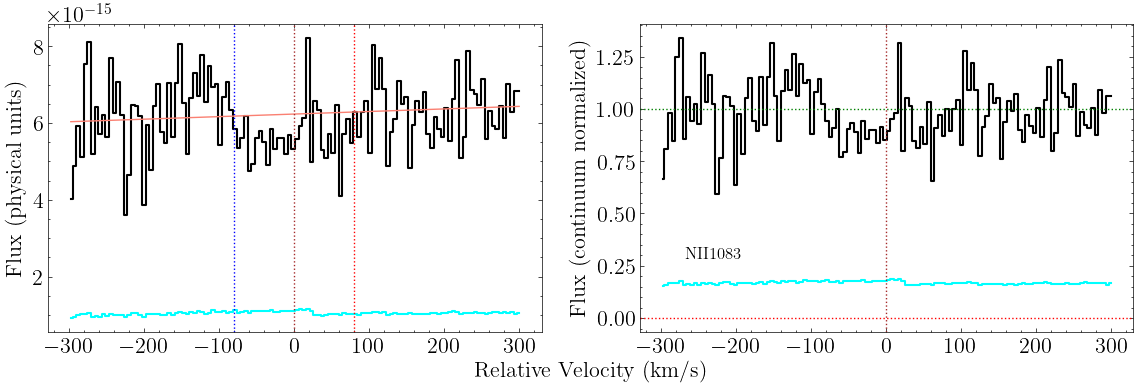

In [394]:
fig, ax = nii_1083_stis.plot_ion_transition_spec_cont()

In [395]:
nii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [396]:
nii_1083_stis.get_upper_lim(10)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


In [397]:
nii_1083_stis.get_upper_lim_data(10,40,0,80)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.5


## NII 915 (STIS)

In [398]:
nii_915_stis = ion_transition('NII', 915, 'N', z_sys, 'STIS')

In [399]:
nii_915_stis.grab_ion_transition_info()

In [400]:
nii_915_stis.grab_ion_transition_spec(spec_fits_list)

In [401]:
nii_915_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

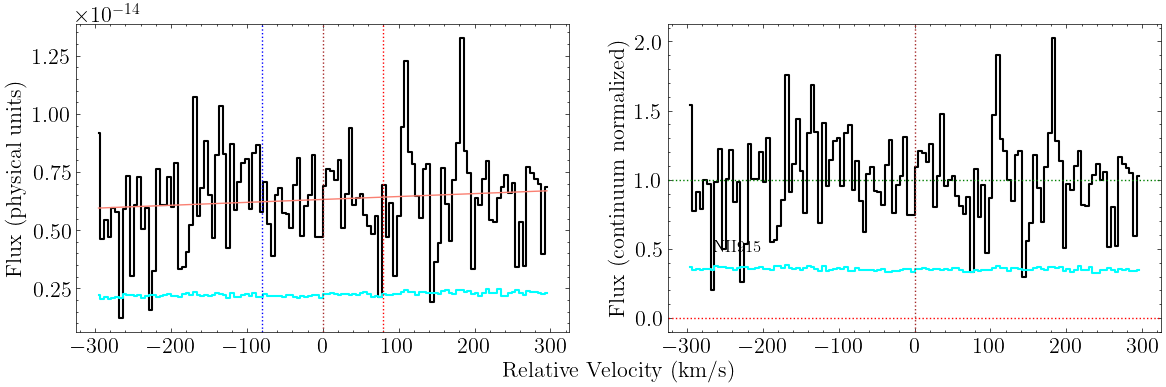

In [402]:
fig, ax = nii_915_stis.plot_ion_transition_spec_cont()

In [403]:
nii_915_stis.grab_ion_transition_lsf(lsf_fits_list)

In [404]:
nii_915_stis.get_upper_lim(10)

logN-1sig: 13.2
logN-2sig: 13.5
logN-3sig: 13.7


# NIII

## NIII 989 (STIS)

In [405]:
niii_989_stis = ion_transition('NIII', 989, 'N', z_sys, 'STIS')

In [406]:
niii_989_stis.grab_ion_transition_info()

In [407]:
niii_989_stis.grab_ion_transition_spec(spec_fits_list)

In [408]:
niii_989_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

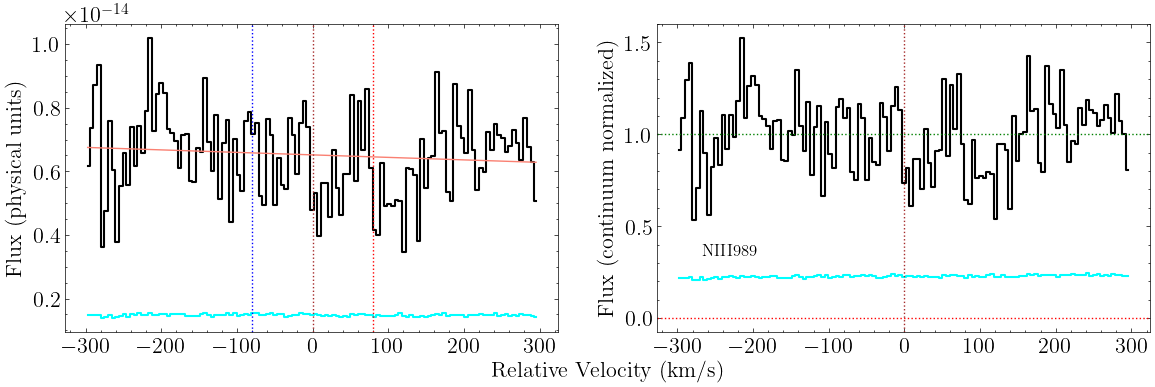

In [409]:
fig, ax = niii_989_stis.plot_ion_transition_spec_cont()

In [410]:
niii_989_stis.grab_ion_transition_lsf(lsf_fits_list)

In [411]:
niii_989_stis.get_upper_lim(10)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


In [412]:
niii_989_stis.get_upper_lim_data(10,0,logN_max=20)

logN-1sig: 13.3
logN-2sig: 13.5
logN-3sig: 13.7


## NIII 685 (FUV)

In [413]:
niii_685_fuv = ion_transition('NIII', 686, 'N', z_sys, 'COS FUV')

In [414]:
niii_685_fuv.grab_ion_transition_info()

In [415]:
niii_685_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[60,160]])

In [416]:
niii_685_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

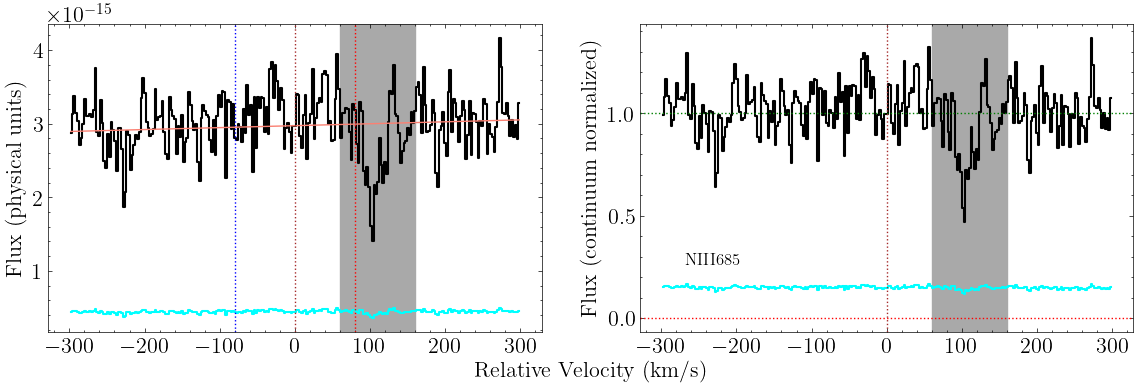

In [417]:
fig, ax = niii_685_fuv.plot_ion_transition_spec_cont()

In [418]:
niii_685_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [419]:
niii_685_fuv.get_upper_lim(10)

logN-1sig: 12.7
logN-2sig: 12.9
logN-3sig: 13.0


In [420]:
niii_685_fuv.get_upper_lim_data(10,0)

logN-1sig: 12.5
logN-2sig: 12.8
logN-3sig: 13.0


## NIII 684 (FUV)

In [421]:
niii_684_fuv = ion_transition('NIII', 684, 'N', z_sys, 'COS FUV')

In [422]:
niii_684_fuv.grab_ion_transition_info()

In [423]:
niii_684_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-280,-80]])

In [424]:
niii_684_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

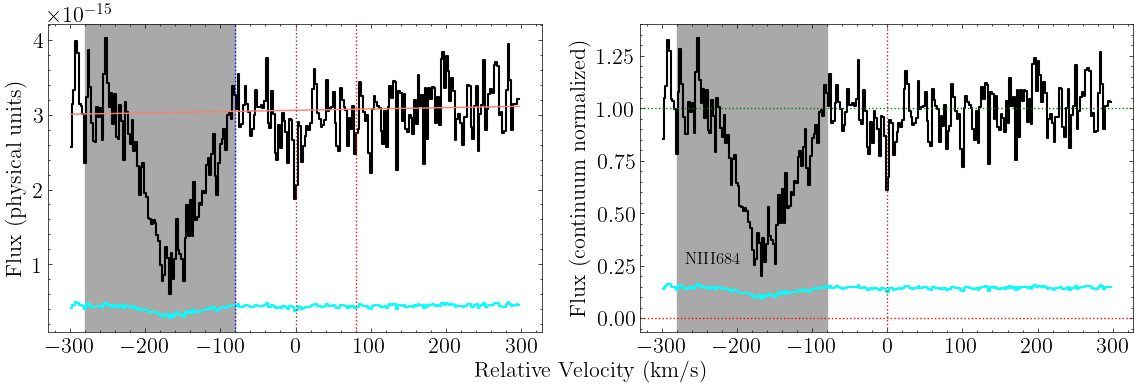

In [425]:
fig, ax = niii_684_fuv.plot_ion_transition_spec_cont()

In [426]:
niii_684_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [427]:
niii_684_fuv.get_upper_lim(10)

logN-1sig: 12.9
logN-2sig: 13.1
logN-3sig: 13.3


# NIV (re: c2-upper limit)

## NIV 765

In [428]:
niv_765_fuv = ion_transition('NIV', 765, 'N', z_sys, 'COS FUV')

In [429]:
niv_765_fuv.grab_ion_transition_info()

In [430]:
niv_765_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-270,-190],[250,300]])

In [431]:
niv_765_fuv.cont_norm_flux(v_abs_range=[-40,65], degree=1)

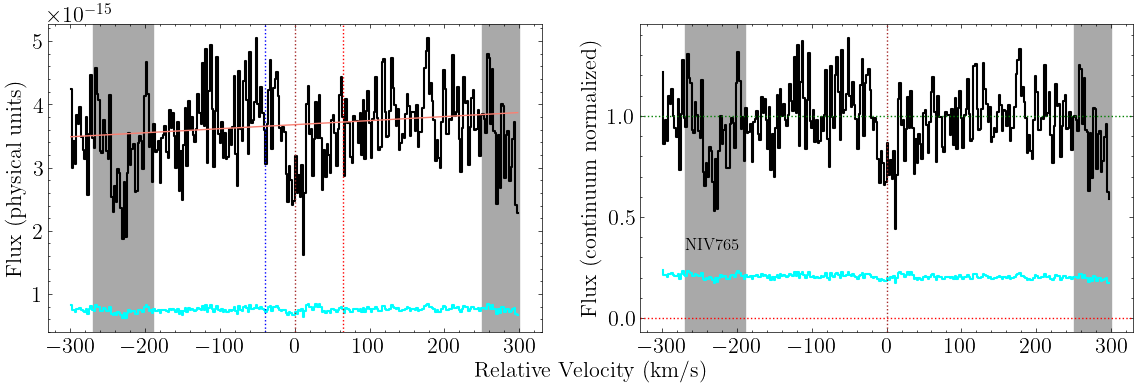

In [432]:
fig, ax = niv_765_fuv.plot_ion_transition_spec_cont()

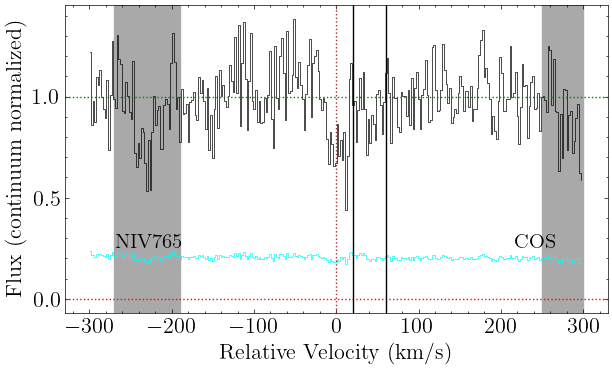

In [433]:
fig, ax = niv_765_fuv.plot_ion_transition_spec()
ax.axvline(20)
ax.axvline(60)

In [434]:
niv_765_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [435]:
niv_765_fuv.get_upper_lim(10)

logN-1sig: 12.3
logN-2sig: 12.6
logN-3sig: 12.7


In [436]:
niv_765_fuv.get_upper_lim_data(10, 40, 20,60)

logN-1sig: 12.7
logN-2sig: 12.9
logN-3sig: 13.0


# NV

## NV 1238 (STIS)

In [437]:
nv_1238_stis = ion_transition('NV', 1238, 'N', z_sys, 'HIRES')

In [438]:
nv_1238_stis.grab_ion_transition_info()

In [439]:
nv_1238_stis.grab_ion_transition_spec(spec_fits_list)

In [440]:
#nv_1238_stis.cont_norm_flux(v_abs_range=[-100,100], degree=1)

# OIII (re-c2: upper limit)

## OIII 702

In [441]:
oiii_702_fuv = ion_transition('OIII', 702, 'O', z_sys, 'COS FUV')

In [442]:
oiii_702_fuv.grab_ion_transition_info()

In [443]:
oiii_702_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[220,300]])

In [444]:
oiii_702_fuv.cont_norm_flux(v_abs_range=[-50,65], degree=1)

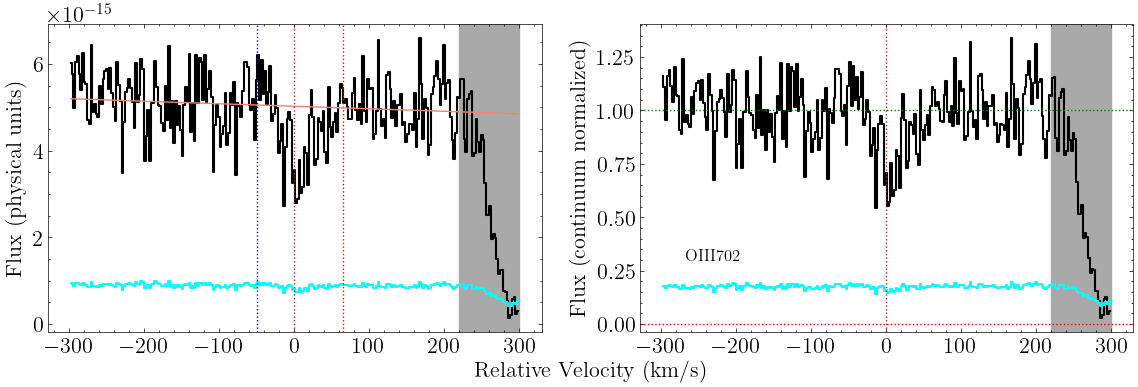

In [445]:
fig, ax = oiii_702_fuv.plot_ion_transition_spec_cont()

In [446]:
oiii_702_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [447]:
oiii_702_fuv.get_upper_lim(10)

logN-1sig: 13.0
logN-2sig: 13.2
logN-3sig: 13.4


In [448]:
oiii_702_fuv.get_upper_lim_data(10, 40, 20,60)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.7


# NeVIII

## NeVIII 770 (FUV)

In [449]:
neviii_770_fuv = ion_transition('NeVIII', 770, 'Ne', z_sys, 'COS FUV')

In [450]:
neviii_770_fuv.grab_ion_transition_info()

In [451]:
neviii_770_fuv.grab_ion_transition_spec(spec_fits_list)

In [452]:
neviii_770_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

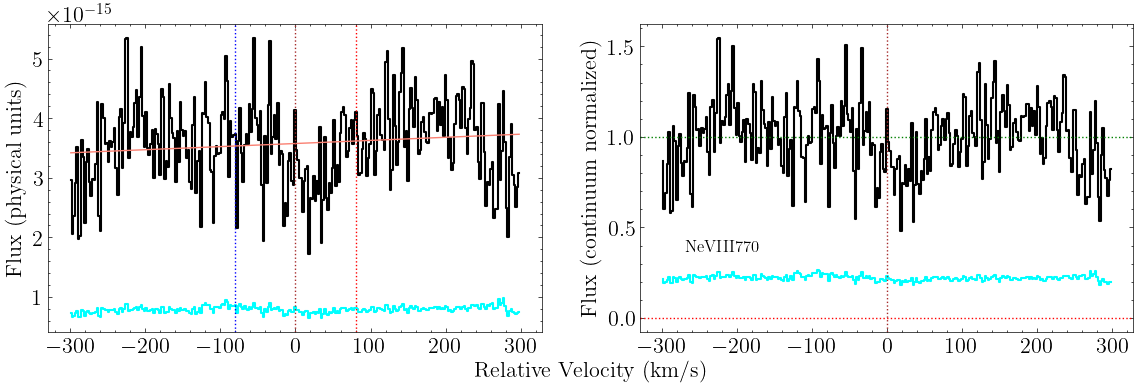

In [453]:
fig, ax = neviii_770_fuv.plot_ion_transition_spec_cont()

In [454]:
neviii_770_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [455]:
neviii_770_fuv.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.6


In [456]:
neviii_770_fuv.get_upper_lim_data(20,0,-50,50,logN_max=20)

logN-1sig: 13.8
logN-2sig: 13.9
logN-3sig: 14.0


## NeVIII 780 (FUV)

In [457]:
neviii_780_fuv = ion_transition('NeVIII', 780, 'Ne', z_sys, 'COS FUV')

In [458]:
neviii_780_fuv.grab_ion_transition_info()

In [459]:
neviii_780_fuv.grab_ion_transition_spec(spec_fits_list)

In [460]:
neviii_780_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

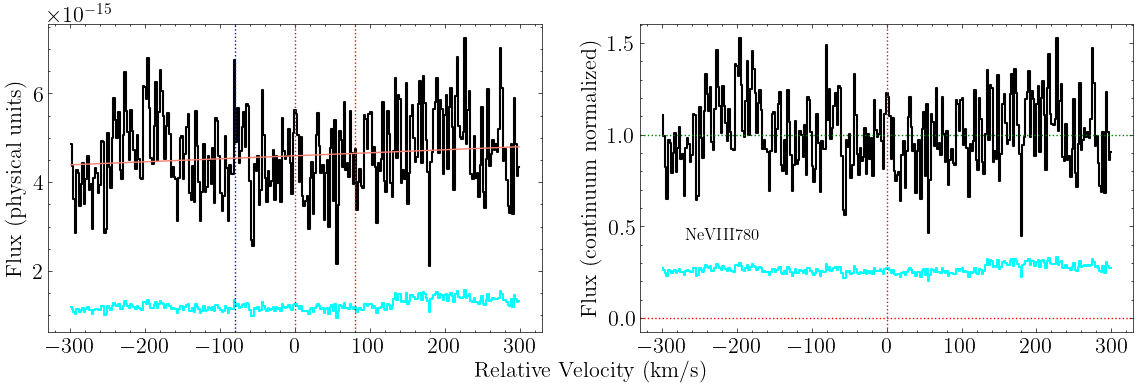

In [461]:
fig, ax = neviii_780_fuv.plot_ion_transition_spec_cont()

In [462]:
neviii_780_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [463]:
neviii_780_fuv.get_upper_lim(20)

logN-1sig: 13.6
logN-2sig: 13.8
logN-3sig: 14.0


# MgX

## MgX 609 (FUV)

In [464]:
mgx_609_fuv = ion_transition('MgX', 609, 'Mg', z_sys, 'COS FUV')

In [465]:
mgx_609_fuv.grab_ion_transition_info()

In [466]:
mgx_609_fuv.grab_ion_transition_spec(spec_fits_list)

In [467]:
mgx_609_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

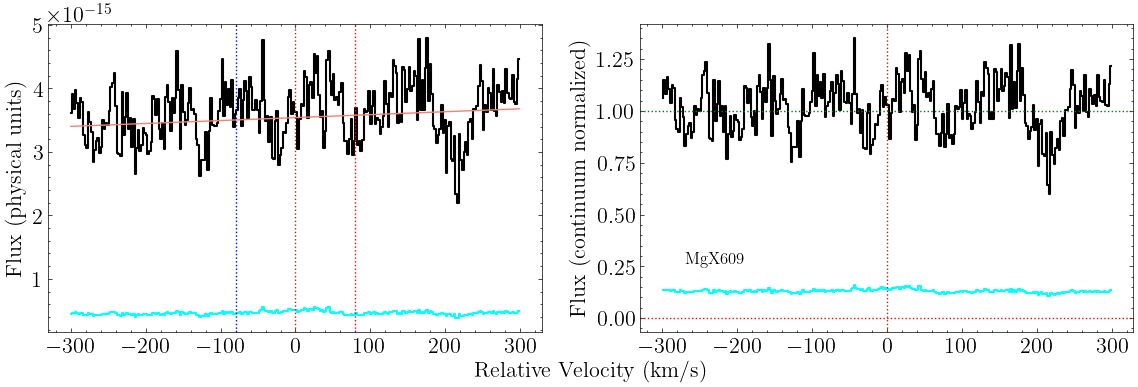

In [468]:
fig, ax = mgx_609_fuv.plot_ion_transition_spec_cont()

In [469]:
mgx_609_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [470]:
mgx_609_fuv.get_upper_lim(20)

logN-1sig: 13.2
logN-2sig: 13.4
logN-3sig: 13.6


In [471]:
mgx_609_fuv.get_upper_lim_data(20,0,-50,50)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


## MgX 624 (FUV)

In [472]:
mgx_624_fuv = ion_transition('MgX', 624, 'Mg', z_sys, 'COS FUV')

In [473]:
mgx_624_fuv.grab_ion_transition_info()

In [474]:
mgx_624_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[20,220]])

In [475]:
mgx_624_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

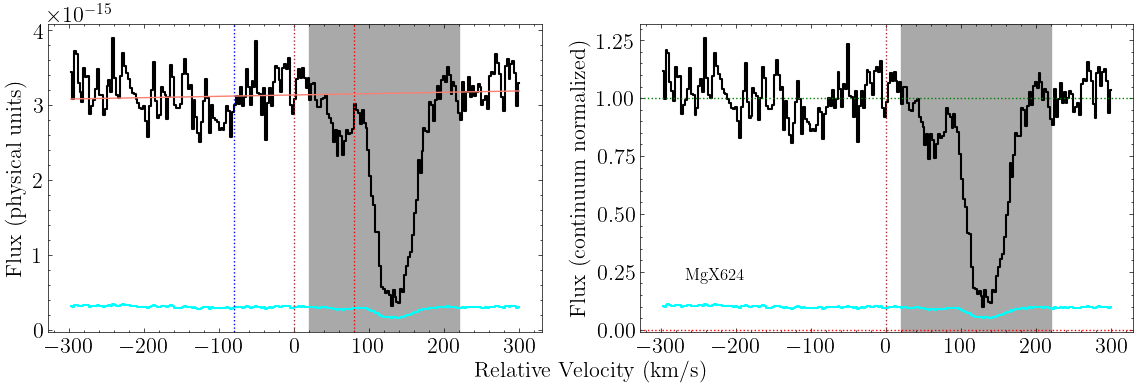

In [476]:
fig, ax = mgx_624_fuv.plot_ion_transition_spec_cont()

In [477]:
mgx_624_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [478]:
mgx_624_fuv.get_upper_lim(20)

logN-1sig: 13.4
logN-2sig: 13.6
logN-3sig: 13.8


# AlII

## AlII 1670 (HIRES)

In [479]:
alii_1670_hires = ion_transition('AlII', 1670, 'Al', z_sys, 'HIRES')

In [480]:
alii_1670_hires.grab_ion_transition_info()

In [481]:
alii_1670_hires.grab_ion_transition_spec(spec_fits_list)

In [482]:
alii_1670_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

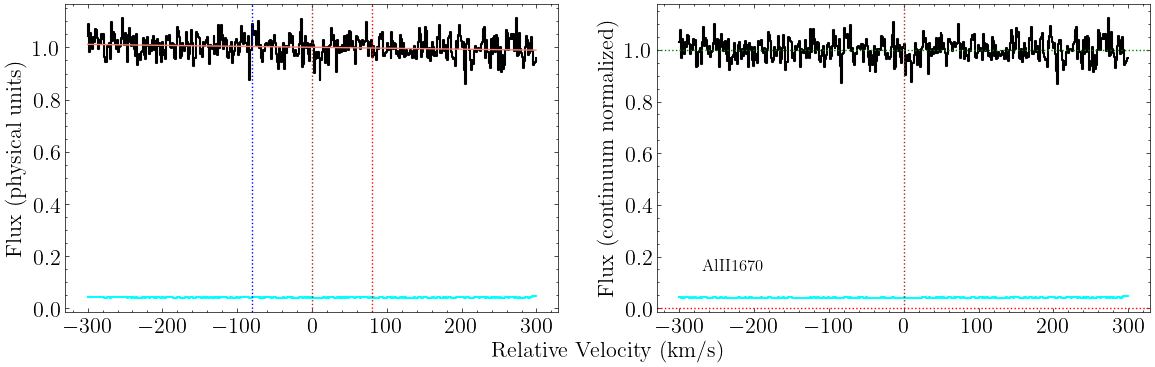

In [483]:
fig, ax = alii_1670_hires.plot_ion_transition_spec_cont()

In [484]:
alii_1670_hires.grab_ion_transition_lsf(lsf_fits_list)

In [485]:
alii_1670_hires.get_upper_lim(10)

logN-1sig: 10.6
logN-2sig: 10.8
logN-3sig: 11.0


# AlIII

## AlIII 1862 (HIRES)

In [486]:
aliii_1862_hires = ion_transition('AlIII', 1862, 'Al', z_sys, 'HIRES')

In [487]:
aliii_1862_hires.grab_ion_transition_info()

In [488]:
aliii_1862_hires.grab_ion_transition_spec(spec_fits_list, masks=[[220,270]])

In [489]:
aliii_1862_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

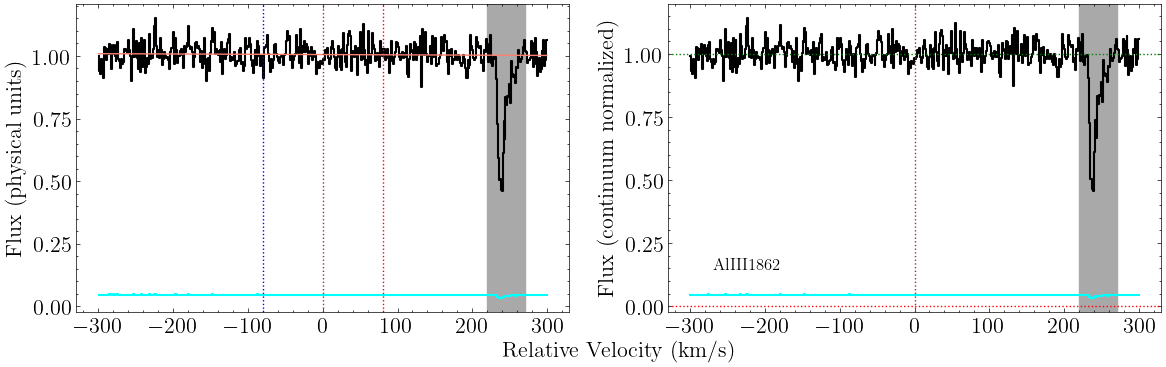

In [490]:
fig, ax = aliii_1862_hires.plot_ion_transition_spec_cont()

In [491]:
aliii_1862_hires.grab_ion_transition_lsf(lsf_fits_list)

In [492]:
aliii_1862_hires.get_upper_lim(10)

logN-1sig: 11.4
logN-2sig: 11.6
logN-3sig: 11.7


## AlIII 1854 (HIRES)

In [493]:
aliii_1854_hires = ion_transition('AlIII', 1854, 'Al', z_sys, 'HIRES')

In [494]:
aliii_1854_hires.grab_ion_transition_info()

In [495]:
aliii_1854_hires.grab_ion_transition_spec(spec_fits_list)

In [496]:
aliii_1854_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

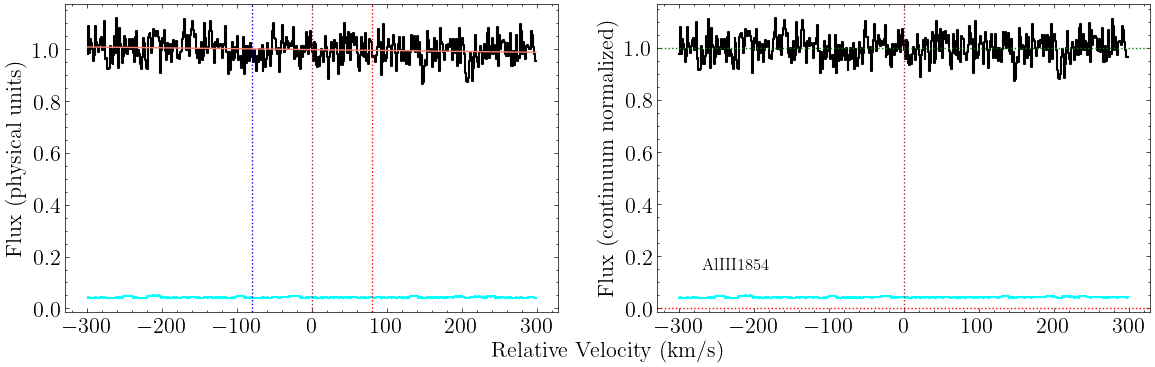

In [497]:
fig, ax = aliii_1854_hires.plot_ion_transition_spec_cont()

In [498]:
aliii_1854_hires.grab_ion_transition_lsf(lsf_fits_list)

In [499]:
aliii_1854_hires.get_upper_lim(10)

logN-1sig: 11.1
logN-2sig: 11.3
logN-3sig: 11.4


# SiII

## SiII 1020 (STIS)

In [500]:
siii_1083_stis = ion_transition('SiII', 1020, 'Si', z_sys, 'STIS')

In [501]:
siii_1083_stis.grab_ion_transition_info()

In [502]:
siii_1083_stis.grab_ion_transition_spec(spec_fits_list, masks=[[220,300]])

In [503]:
siii_1083_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

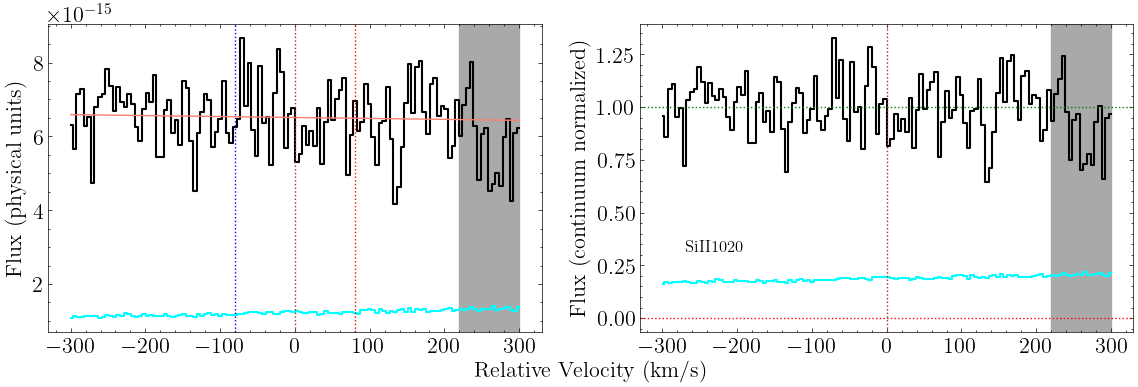

In [504]:
fig, ax = siii_1083_stis.plot_ion_transition_spec_cont()

In [505]:
siii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [506]:
siii_1083_stis.get_upper_lim(10)

logN-1sig: 13.8
logN-2sig: 14.0
logN-3sig: 14.0


In [507]:
siii_1083_stis.get_upper_lim_data(10,0)

logN-1sig: 13.9
logN-2sig: 14.0
logN-3sig: 14.0


## SiII 1240 (STIS)

In [508]:
siii_1240_stis = ion_transition('SiII', 1240, 'Si', z_sys, 'STIS')

In [509]:
siii_1240_stis.grab_ion_transition_info()

In [510]:
siii_1240_stis.grab_ion_transition_spec(spec_fits_list, masks=[[220,300]])

In [511]:
#siii_1240_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

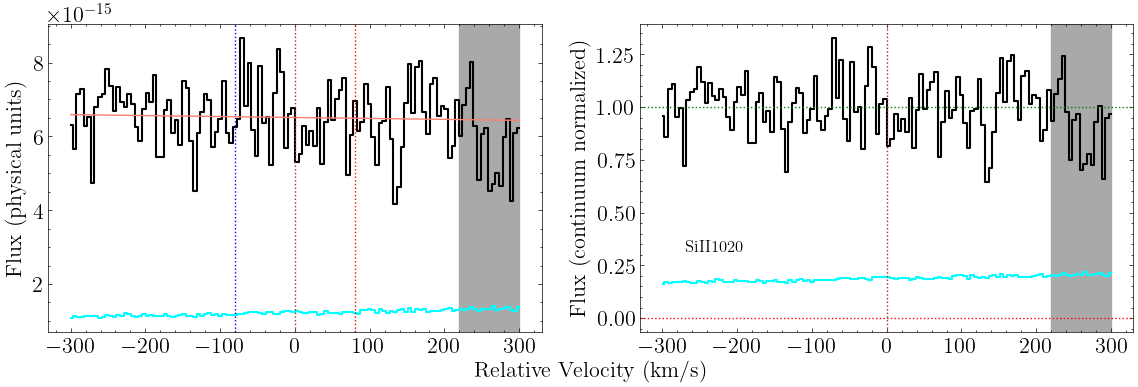

In [512]:
fig, ax = siii_1083_stis.plot_ion_transition_spec_cont()

In [513]:
siii_1083_stis.grab_ion_transition_lsf(lsf_fits_list)

In [514]:
siii_1083_stis.get_upper_lim(10)

logN-1sig: 13.8
logN-2sig: 14.0
logN-3sig: 14.0


# SiIII

## SiIII 1206 (STIS)

In [515]:
siiii_1206_stis = ion_transition('SiIII', 1206, 'Si', z_sys, 'STIS')

In [516]:
siiii_1206_stis.grab_ion_transition_info()

In [517]:
siiii_1206_stis.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-100]])

In [518]:
siiii_1206_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

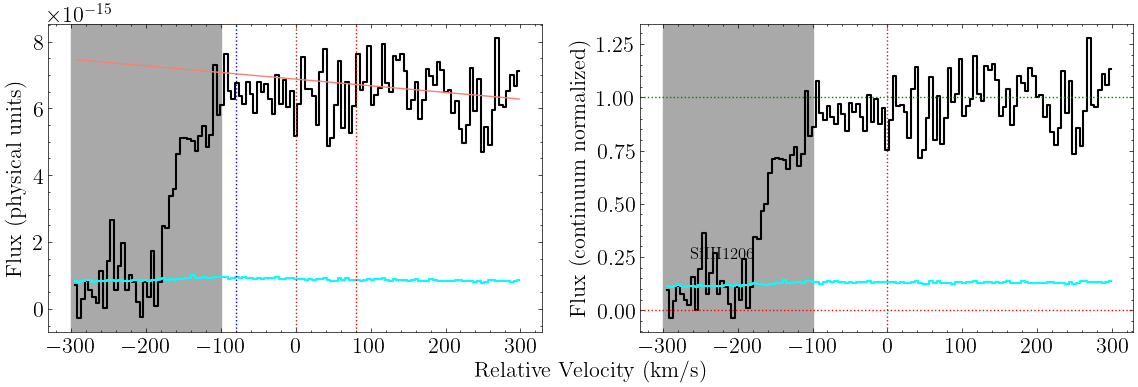

In [519]:
fig, ax = siiii_1206_stis.plot_ion_transition_spec_cont()

In [520]:
siiii_1206_stis.grab_ion_transition_lsf(lsf_fits_list)

In [521]:
siiii_1206_stis.get_upper_lim(10)

logN-1sig: 11.6
logN-2sig: 11.8
logN-3sig: 12.0


In [522]:
siiii_1206_stis.get_upper_lim_data(10,0,-40,40)

logN-1sig: 11.9
logN-2sig: 12.1
logN-3sig: 12.2


In [523]:
siiii_1206_stis.init_ion_transition(init_values = np.array([[12.2, 10, 0]]), 
                             lsf_convolve = True)

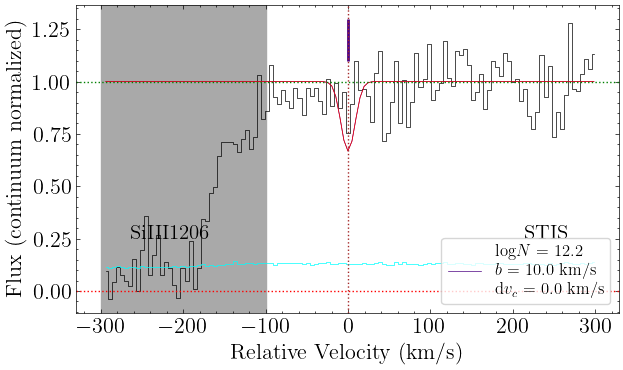

In [524]:
fig, ax = siiii_1206_stis.plot_ion_transition_init_fit()

# SiIV

## SiIV 1393 (HIRES)

In [525]:
siiv_1393_hires = ion_transition('SiIV', 1393, 'Si', z_sys, 'HIRES')

In [526]:
siiv_1393_hires.grab_ion_transition_info()

In [527]:
siiv_1393_hires.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-280]])

In [528]:
siiv_1393_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

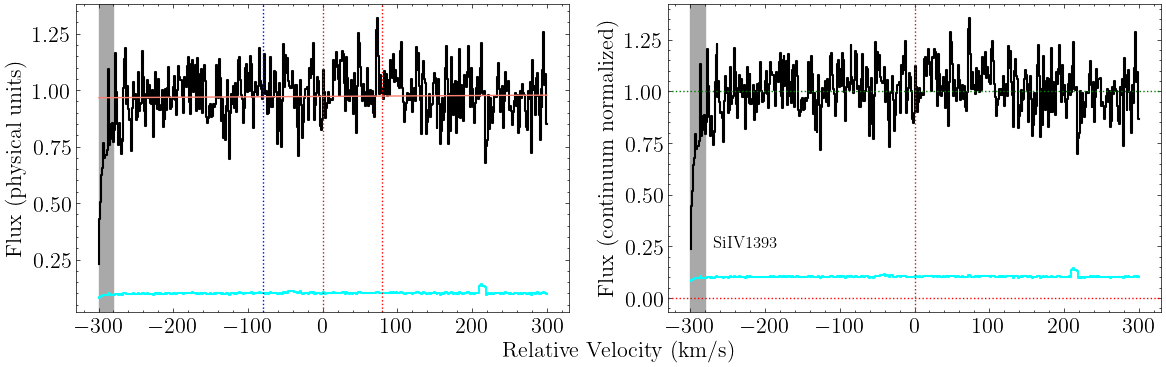

In [529]:
fig, ax = siiv_1393_hires.plot_ion_transition_spec_cont()

In [530]:
siiv_1393_hires.grab_ion_transition_lsf(lsf_fits_list)

In [531]:
siiv_1393_hires.get_upper_lim(10)

logN-1sig: 11.6
logN-2sig: 11.8
logN-3sig: 12.0


In [532]:
siiv_1393_hires.get_upper_lim_data(10,0)

logN-1sig: 11.7
logN-2sig: 11.9
logN-3sig: 12.1


In [533]:
siiv_1393_hires.init_ion_transition(init_values = np.array([[12.1, 10, 0]]), 
                             lsf_convolve = True)

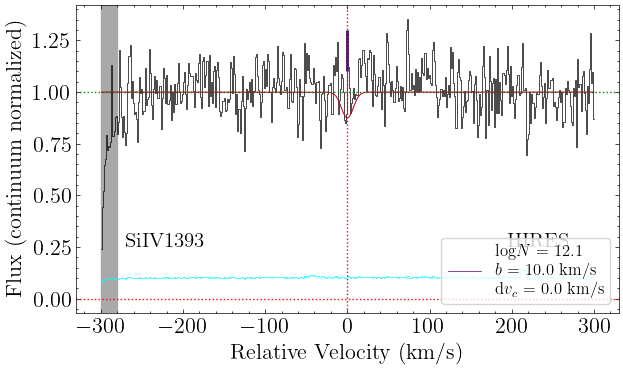

In [534]:
fig, ax = siiv_1393_hires.plot_ion_transition_init_fit()

## SiIV 1402 (HIRES)

In [535]:
siiv_1402_hires = ion_transition('SiIV', 1402, 'Si', z_sys, 'HIRES')

In [536]:
siiv_1402_hires.grab_ion_transition_info()

In [537]:
siiv_1402_hires.grab_ion_transition_spec(spec_fits_list)

In [538]:
siiv_1402_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

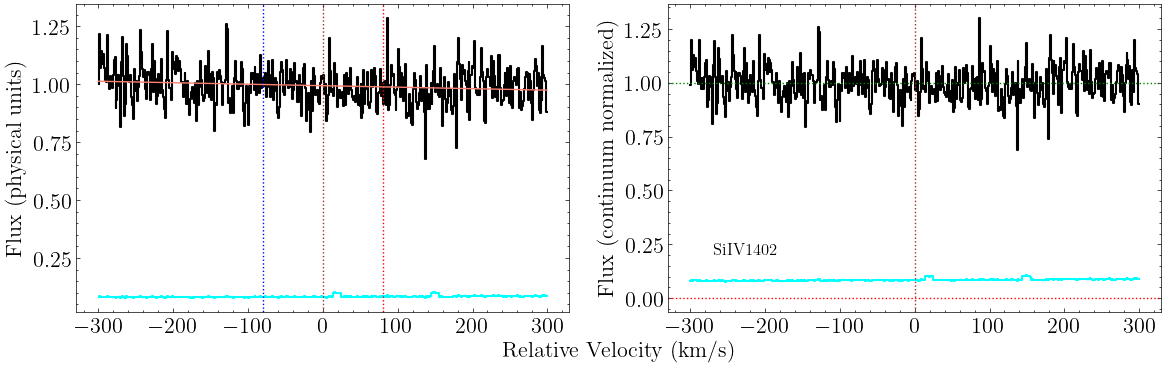

In [539]:
fig, ax = siiv_1402_hires.plot_ion_transition_spec_cont()

In [540]:
siiv_1402_hires.grab_ion_transition_lsf(lsf_fits_list)

In [541]:
siiv_1402_hires.get_upper_lim(10)

logN-1sig: 11.8
logN-2sig: 12.0
logN-3sig: 12.2


In [542]:
siiv_1402_hires.get_upper_lim_data(10,0)

logN-1sig: 12.0
logN-2sig: 12.2
logN-3sig: 12.3


# SIV

## SIV 1062 (STIS)

In [543]:
siv_1062_stis = ion_transition('SIV', 1062, 'S', z_sys, 'STIS')

In [544]:
siv_1062_stis.grab_ion_transition_info()

In [545]:
siv_1062_stis.grab_ion_transition_spec(spec_fits_list)

In [546]:
siv_1062_stis.cont_norm_flux(v_abs_range=[-80,80], degree=1)

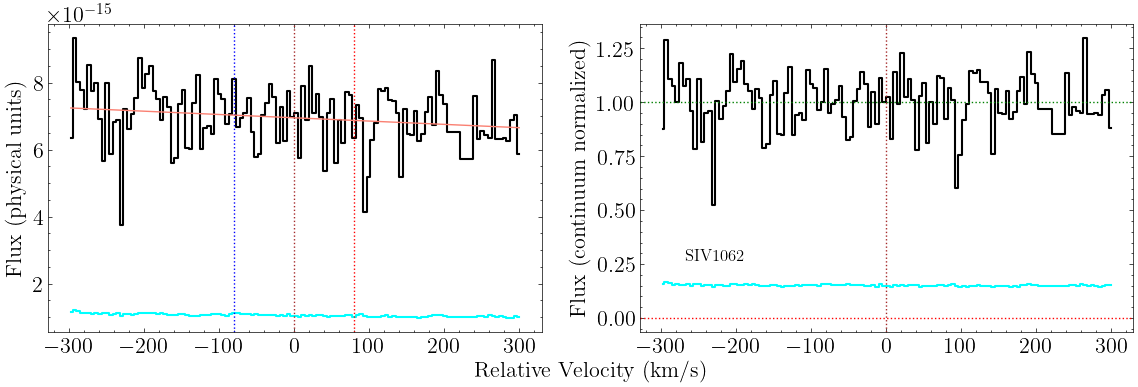

In [547]:
fig, ax = siv_1062_stis.plot_ion_transition_spec_cont()

In [548]:
siv_1062_stis.grab_ion_transition_lsf(lsf_fits_list)

In [549]:
siv_1062_stis.get_upper_lim(10)

logN-1sig: 13.2
logN-2sig: 13.5
logN-3sig: 13.6


In [550]:
siv_1062_stis.get_upper_lim_data(10,0)

logN-1sig: 13.3
logN-2sig: 13.5
logN-3sig: 13.7


## SIV 748

In [551]:
siv_748_fuv = ion_transition('SIV', 748, 'S', z_sys, 'COS FUV')

In [552]:
siv_748_fuv.grab_ion_transition_info()

In [553]:
siv_748_fuv.grab_ion_transition_spec(spec_fits_list, masks=[[-300,-120],[170,300]])

In [554]:
siv_748_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

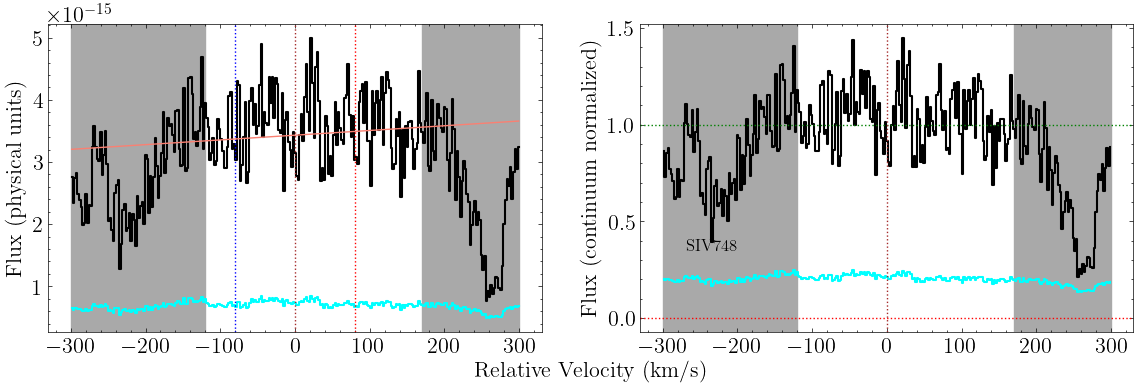

In [555]:
fig, ax = siv_748_fuv.plot_ion_transition_spec_cont()

In [556]:
siv_748_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [557]:
siv_748_fuv.get_upper_lim(10)

logN-1sig: 12.5
logN-2sig: 12.8
logN-3sig: 12.9


In [558]:
siv_748_fuv.get_upper_lim_data(10,0)

logN-1sig: 12.6
logN-2sig: 12.8
logN-3sig: 13.0


# SV

## SV 786

In [559]:
sv_786_fuv = ion_transition('SV', 786, 'S', z_sys, 'COS FUV')

In [560]:
sv_786_fuv.grab_ion_transition_info()

In [561]:
sv_786_fuv.grab_ion_transition_spec(spec_fits_list)

In [562]:
sv_786_fuv.cont_norm_flux(v_abs_range=[-80,80], degree=1)

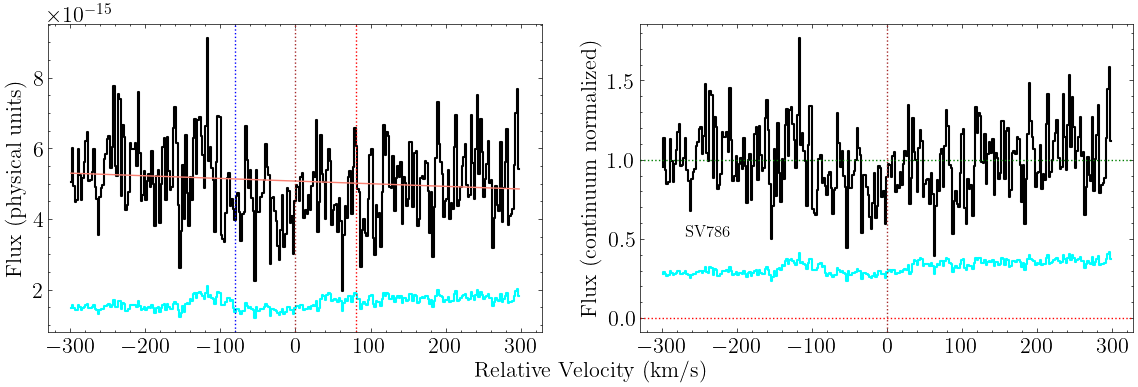

In [563]:
fig, ax = sv_786_fuv.plot_ion_transition_spec_cont()

In [564]:
sv_786_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [565]:
sv_786_fuv.get_upper_lim(10)

logN-1sig: 12.2
logN-2sig: 12.4
logN-3sig: 12.6


In [566]:
sv_786_fuv.get_upper_lim_data(10,0)

logN-1sig: 12.6
logN-2sig: 12.8
logN-3sig: 12.9


# SVI

## SVI 933 (STIS)
Get SVI 933 from COS STIS

In [567]:
svi_933_stis = ion_transition('SVI', 933, 'S', z_sys, 'STIS')

In [568]:
svi_933_stis.grab_ion_transition_info()

In [569]:
svi_933_stis.grab_ion_transition_spec(spec_fits_list)

In [570]:
svi_933_stis.cont_norm_flux(v_abs_range=[-60,110], degree=1)

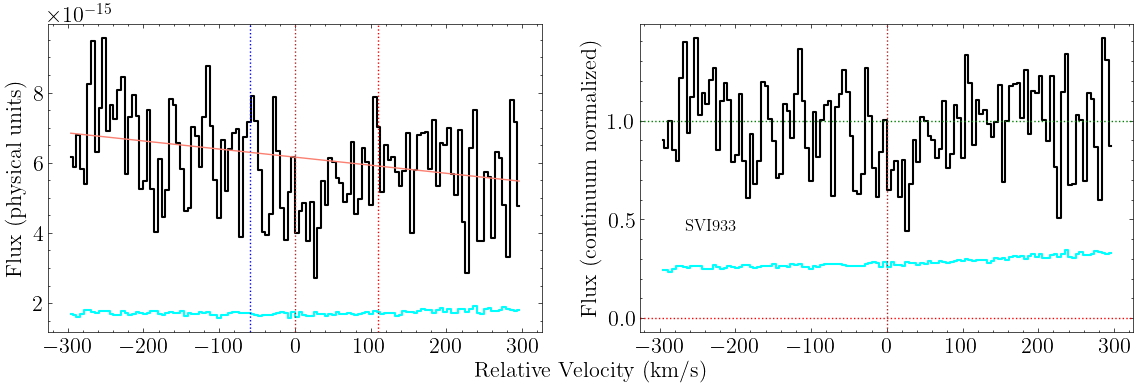

In [571]:
fig, ax = svi_933_stis.plot_ion_transition_spec_cont()

In [572]:
svi_933_stis.grab_ion_transition_lsf(lsf_fits_list)

In [573]:
svi_933_stis.get_upper_lim(20)

logN-1sig: 12.8
logN-2sig: 13.0
logN-3sig: 13.2


In [574]:
svi_933_stis.get_upper_lim_data(20,0)

logN-1sig: 13.3
logN-2sig: 13.4
logN-3sig: 13.5


## SVI 944 (STIS)
Get SVI 944 from COS STIS

In [575]:
svi_944_stis = ion_transition('SVI', 944, 'S', z_sys, 'STIS')

In [576]:
svi_944_stis.grab_ion_transition_info()

In [577]:
svi_944_stis.grab_ion_transition_spec(spec_fits_list)

In [578]:
svi_944_stis.cont_norm_flux(v_abs_range=[-30,60], degree=1)

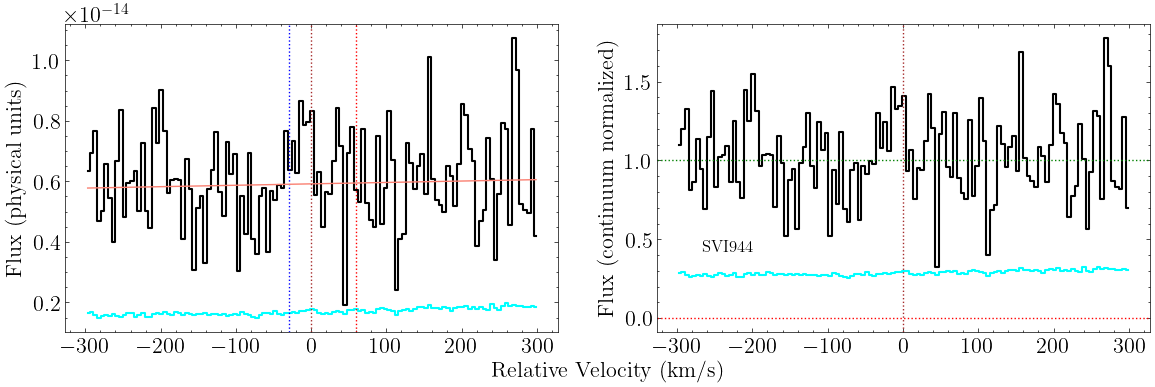

In [579]:
fig, ax = svi_944_stis.plot_ion_transition_spec_cont()

In [580]:
svi_944_stis.grab_ion_transition_lsf(lsf_fits_list)

In [581]:
svi_944_stis.get_upper_lim(20)

logN-1sig: 13.1
logN-2sig: 13.3
logN-3sig: 13.5


# FeII

## FeII 2382 (HIRES)

In [582]:
feii_2382_hires = ion_transition('FeII', 2382, 'Fe', z_sys, 'HIRES')

In [583]:
feii_2382_hires.grab_ion_transition_info()

In [584]:
feii_2382_hires.grab_ion_transition_spec(spec_fits_list)

In [585]:
feii_2382_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

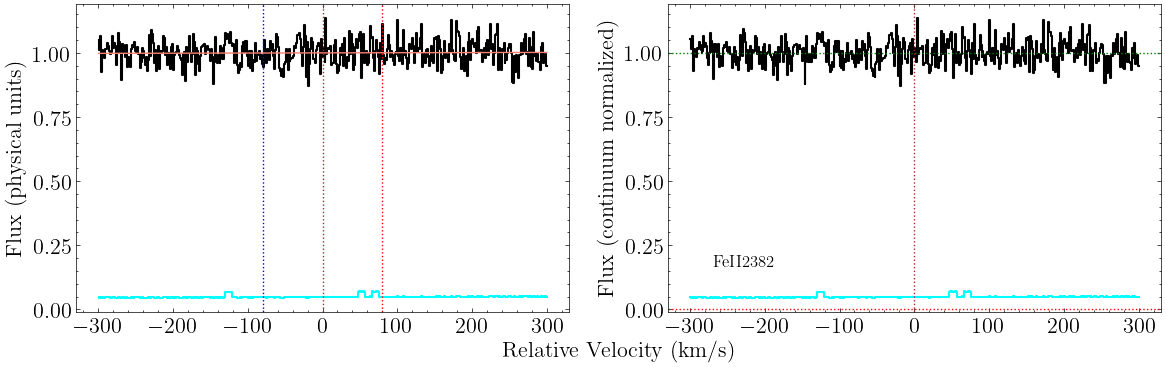

In [586]:
fig, ax = feii_2382_hires.plot_ion_transition_spec_cont()

In [587]:
feii_2382_hires.grab_ion_transition_lsf(lsf_fits_list)

In [588]:
feii_2382_hires.get_upper_lim(20)

logN-1sig: 11.4
logN-2sig: 11.6
logN-3sig: 11.8


## FeII 2344 (HIRES)

In [589]:
feii_2344_hires = ion_transition('FeII', 2344, 'Fe', z_sys, 'HIRES')

In [590]:
feii_2344_hires.grab_ion_transition_info()

In [591]:
feii_2344_hires.grab_ion_transition_spec(spec_fits_list)

In [592]:
feii_2344_hires.cont_norm_flux(v_abs_range=[-80,80], degree=1)

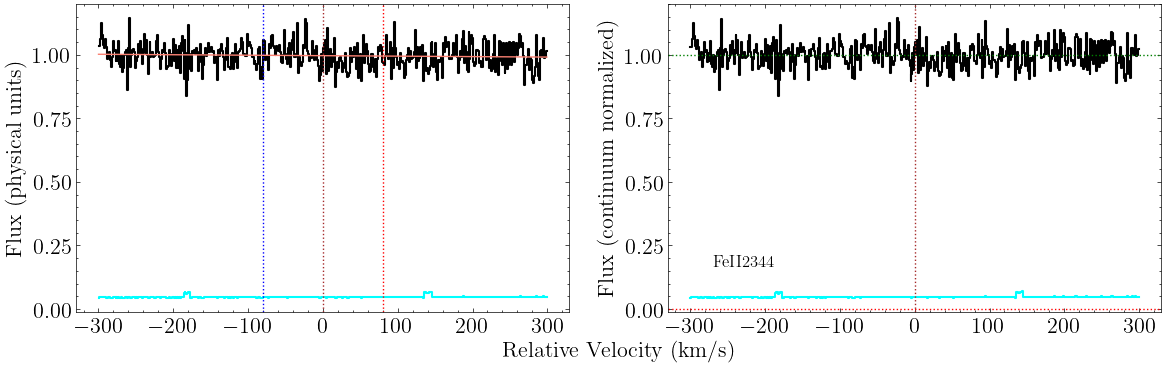

In [593]:
fig, ax = feii_2344_hires.plot_ion_transition_spec_cont()

In [594]:
feii_2344_hires.grab_ion_transition_lsf(lsf_fits_list)

In [595]:
feii_2344_hires.get_upper_lim(20)

logN-1sig: 11.8
logN-2sig: 12.0
logN-3sig: 12.2


# Presentation plot

Text(0.5, 0, 'v [km s${}^{-1}$]')

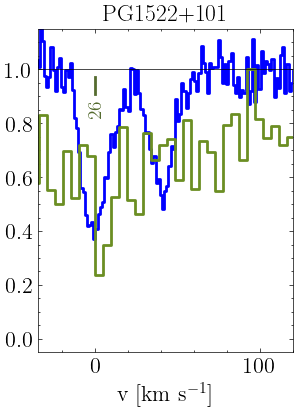

In [324]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

ax.step(civ_1550_hires.v, civ_1550_hires.flux_norm, where='mid', color='blue', lw=2)
ax.step(hi_1025_stis.v, hi_1025_stis.flux_norm, where='mid', color='olivedrab', lw=2)

#ax.text(30,0.12,'CIV 1550', color='blue', horizontalalignment='right', fontsize=17)
#ax.text(30,0.02,'SiIII 1206', color='olivedrab', horizontalalignment='right', fontsize=17)

ax.axhline(1, lw=.5)

ax.axvline(0, ymin=0.80, ymax=0.85, color='darkolivegreen', lw=2)
ax.text(0.7, 0.83, '26', rotation=90, fontsize=14, color='darkolivegreen', horizontalalignment='center')
ax.set_xlim(-35,120)
ax.set_ylim(-0.2/4, 1.15)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_title('PG1522+101', fontsize=17)
ax.set_xlabel(r'v [km s${}^{-1}$]')

#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Figures/logT.png', dpi=300)#